# Imports librairies et jeu de données

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import folium
import seaborn as sns
import numpy as np
import pickle

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

pd.set_option("display.max_rows", 101)
pd.options.display.max_columns = 999

In [54]:
data = pd.read_csv('data/data_cleaned.csv')

In [55]:
data.shape

(74705, 30)

In [56]:
data.dropna(inplace=True)

In [57]:
data.shape

(74705, 30)

In [58]:
data.set_index('customer_unique_id', inplace=True)

In [59]:
data.head()

,Cat_la_plus_achetee,customer_zip_code_prefix,customer_city,customer_state,Nb_pdts,Tot_moy_achats,Delai_Moy_Commande,order_purchase_timestamp,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Moy_Paiment,Facilités,geolocation_lat,geolocation_lng,"('price', 'home')","('price', 'appliances')","('price', 'construction')","('price', 'office')","('price', 'electronics')","('price', 'arts')","('price', 'fashion')","('price', 'health_beauty')","('price', 'sports_leisure')","('price', 'garden_pets')","('price', 'auto')","('price', 'food_drinks')","('price', 'other')"
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,home,7787,Other,SP,1.0,4.866765,7.0,2018-05-10 10:56:27,10.0,3.0,115.0,5.0,credit_card,8.0,-23.340262,-46.831085,129.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,health_beauty,6053,osasco,SP,1.0,2.939162,4.0,2018-05-07 11:11:27,11.0,0.0,118.0,4.0,credit_card,1.0,-23.559044,-46.788516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.9,0.0,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,office,88115,sao jose,SC,1.0,4.234107,26.0,2017-03-10 21:05:03,21.0,4.0,541.0,3.0,credit_card,8.0,-27.543010,-48.634938,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,electronics,18040,sorocaba,SP,1.0,5.192957,14.0,2017-11-14 19:45:42,19.0,1.0,292.0,5.0,credit_card,6.0,-23.505588,-47.469820,0.0,0.0,0.0,0.0,180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004bd2a26a76fe21f786e4fbd80607f,garden_pets,5036,sao paulo,SP,1.0,5.036953,2.0,2018-04-05 19:33:16,19.0,3.0,150.0,4.0,credit_card,8.0,-23.515693,-46.690031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,154.0,0.0,0.0,0.0


In [60]:
data['order_purchase_timestamp'] = data['order_purchase_timestamp'].astype(
    'datetime64')

In [61]:
data.select_dtypes(['object']).nunique()

Cat_la_plus_achetee    13
customer_city          98
customer_state         22
Moy_Paiment             4
dtype: int64

In [62]:
data.dtypes

Cat_la_plus_achetee                    object
customer_zip_code_prefix                int64
customer_city                          object
customer_state                         object
Nb_pdts                               float64
Tot_moy_achats                        float64
Delai_Moy_Commande                    float64
order_purchase_timestamp       datetime64[ns]
heure_achat                           float64
jour_achat                            float64
delai_dernier_achat                   float64
Note_Moy_Com                          float64
Moy_Paiment                            object
Facilités                             float64
geolocation_lat                       float64
geolocation_lng                       float64
('price', 'home')                     float64
('price', 'appliances')               float64
('price', 'construction')             float64
('price', 'office')                   float64
('price', 'electronics')              float64
('price', 'arts')                 

In [63]:
data.columns

Index(['Cat_la_plus_achetee', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'Nb_pdts', 'Tot_moy_achats', 'Delai_Moy_Commande',
       'order_purchase_timestamp', 'heure_achat', 'jour_achat',
       'delai_dernier_achat', 'Note_Moy_Com', 'Moy_Paiment', 'Facilités',
       'geolocation_lat', 'geolocation_lng', '('price', 'home')',
       '('price', 'appliances')', '('price', 'construction')',
       '('price', 'office')', '('price', 'electronics')', '('price', 'arts')',
       '('price', 'fashion')', '('price', 'health_beauty')',
       '('price', 'sports_leisure')', '('price', 'garden_pets')',
       '('price', 'auto')', '('price', 'food_drinks')', '('price', 'other')'],
      dtype='object')

In [64]:
data.drop(['customer_zip_code_prefix','Cat_la_plus_achetee'], 
          axis=1, 
          inplace=True)

In [65]:
data.drop(['customer_city', 'customer_state'], 
          axis=1, 
          inplace=True)

In [66]:
data.select_dtypes(['object']).nunique()

Moy_Paiment    4
dtype: int64

# Echantillon réduit

## Préparation

In [67]:
#X=data.copy()
data_reduce = data.sample(10000, random_state=1).copy()
X = data_reduce.copy()
categorical_columns = X.select_dtypes(['category','object']).columns
numerical_columns = X.select_dtypes(['int32','float64']).columns

ohe = OneHotEncoder(sparse=False)
ss = StandardScaler()
X[numerical_columns] = ss.fit_transform(X[numerical_columns])
ohe.fit(X[categorical_columns])

OneHotEncoder(sparse=False)

In [68]:
X = pd.merge(X[numerical_columns], 
          pd.DataFrame(columns = ohe.get_feature_names().tolist(),
              data = ohe.fit_transform(X[categorical_columns])).set_index(X.index),
        left_index = True, right_index = True)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [69]:
X.head()

,Nb_pdts,Tot_moy_achats,Delai_Moy_Commande,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Facilités,geolocation_lat,geolocation_lng,"('price', 'home')","('price', 'appliances')","('price', 'construction')","('price', 'office')","('price', 'electronics')","('price', 'arts')","('price', 'fashion')","('price', 'health_beauty')","('price', 'sports_leisure')","('price', 'garden_pets')","('price', 'auto')","('price', 'food_drinks')","('price', 'other')",x0_boleto,x0_credit_card,x0_debit_card,x0_voucher
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
d918450664046ceedf2b05206d8553dc,-0.24632,0.887239,1.827623,0.407418,0.106903,0.349561,-1.682750,-0.305208,-1.663843,-1.342998,-0.252348,-0.204286,-0.105327,-0.175198,-0.238526,-0.207191,2.544971,-0.286819,-0.246687,-0.178706,-0.161931,0.0,-0.171071,0.0,1.0,0.0,0.0
47536cd28cca4c60e0a137015f51eced,-0.24632,-1.711562,0.521050,-2.613708,1.623260,0.526376,0.653294,-0.707291,-0.346213,-1.421344,-0.252348,-0.204286,-0.105327,-0.175198,0.028529,-0.207191,-0.228151,-0.286819,-0.246687,-0.178706,-0.161931,0.0,-0.171071,0.0,1.0,0.0,0.0
1c3d71e403c34f60c6566d08b451c138,-0.24632,1.461695,-0.524208,-0.347864,0.612356,0.961614,0.653294,2.107290,0.374339,0.622682,-0.252348,-0.204286,-0.105327,-0.175198,-0.238526,-0.207191,-0.228151,2.810534,-0.246687,-0.178706,-0.161931,0.0,-0.171071,0.0,1.0,0.0,0.0
b4cfda9f06bbc32d7bef85da0e3bdfd1,-0.24632,0.845726,-0.524208,1.540340,-0.904002,0.743995,0.653294,0.498958,-1.616498,-1.317494,-0.252348,-0.204286,-0.105327,-0.175198,-0.238526,-0.207191,-0.228151,-0.286819,2.526312,-0.178706,-0.161931,0.0,-0.171071,0.0,1.0,0.0,0.0
2b623f6a231252cec7fbafd865725b5f,-0.24632,-0.495503,-0.262893,-0.725504,1.623260,-1.194174,-0.125387,-0.707291,-0.424988,-0.107581,-0.252348,0.901971,-0.105327,-0.175198,-0.238526,-0.207191,-0.228151,-0.286819,-0.246687,-0.178706,-0.161931,0.0,-0.171071,1.0,0.0,0.0,0.0


## PCA Transformation 

In [70]:
pca = PCA(random_state=1)

In [71]:
pca.fit(X)

PCA(random_state=1)

In [72]:
X.shape

(10000, 27)

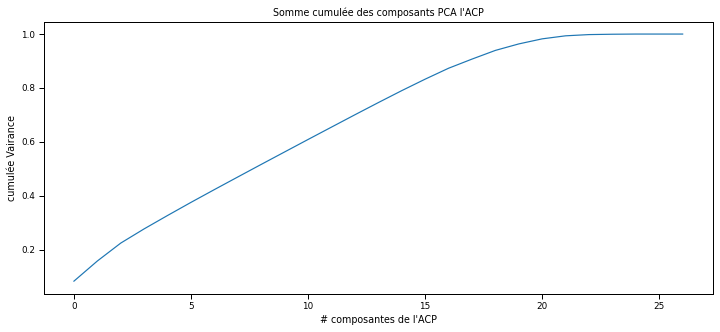

In [73]:
plt.figure(figsize=(12,5))
plt.title('Somme cumulée des composants PCA l\'ACP')
plt.xlabel('# composantes de l\'ACP')
plt.ylabel('cumulée Vairance')
plt.plot(list(range(X.shape[1])),
         np.cumsum(pca.explained_variance_ratio_))


In [74]:
np.cumsum(pca.explained_variance_ratio_)[18]

0.9393662755213925

avec 19 features on a 93 % de la variance totale

In [75]:
colonnes_pca = X.columns

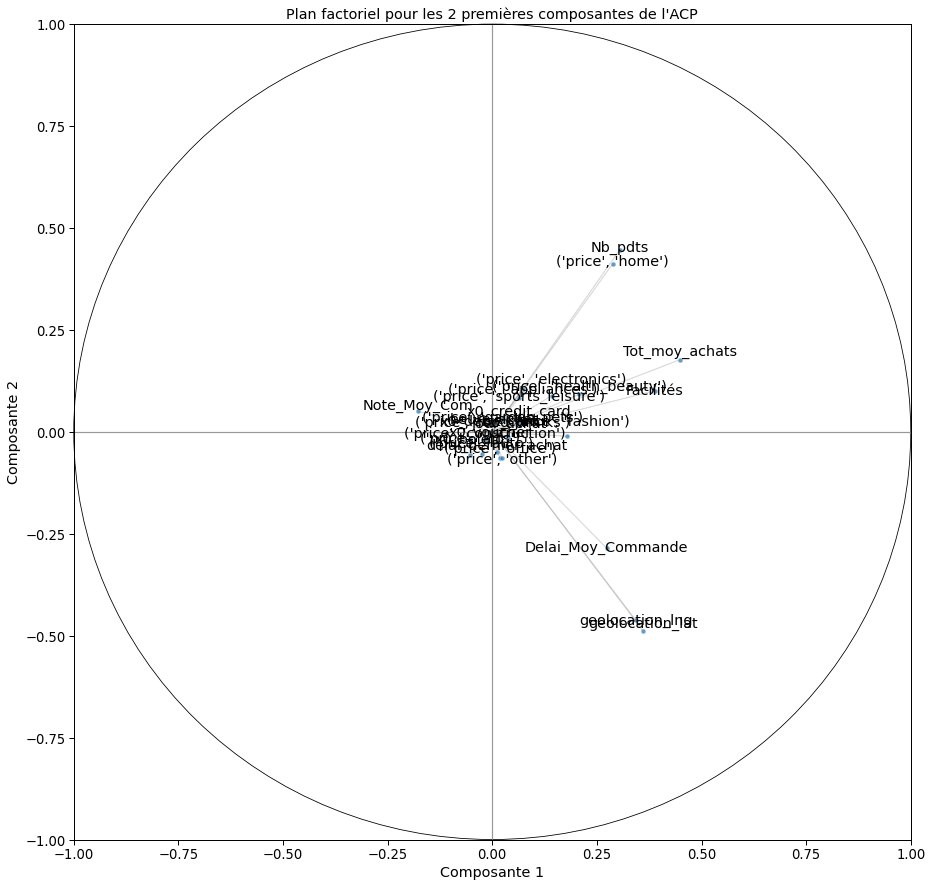

In [24]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(15,15))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()
ax.add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-', 
                    clip_on=False))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
x_pca = pca.components_[0,:]
y_pca = pca.components_[1,:]

sns.scatterplot(x = x_pca,
                y = y_pca,
               alpha = 0.7)
plt.plot([-1,1],[0,0], color='grey', alpha=0.8)
plt.plot([0,0],[-1,1], color='grey', alpha=0.8)

i = 0
for x,y,colonne in zip(x_pca,y_pca, colonnes_pca):

    plt.annotate(colonne, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,5+np.random.randint(-10,10)),
                 ha='center') 
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',
             alpha=0.2)


sns.set_context("paper", font_scale=1) 

In [25]:
x_show = pca.transform(X.select_dtypes(['float64','int32']))[:,0]

y_show = pca.transform(X.select_dtypes(['float64','int32']))[:,1]

z_show = pca.transform(X.select_dtypes(['float64','int32']))[:,2]

In [26]:
X_pca = pca.transform(X)[:,:19]

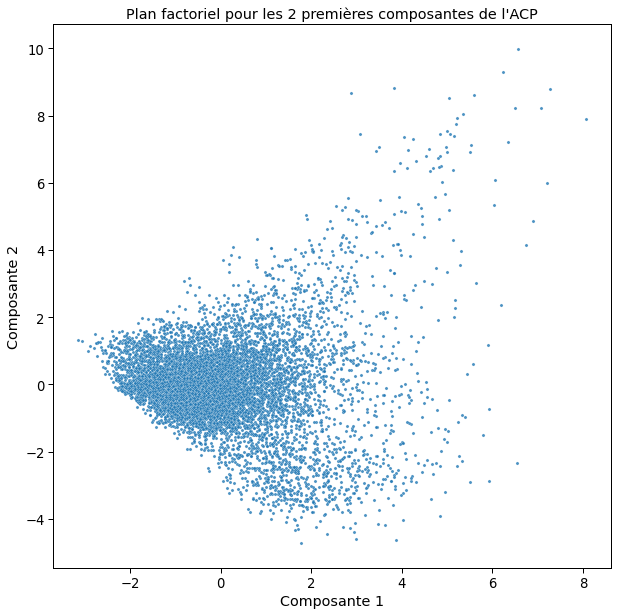

In [27]:
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()

sns.scatterplot(x = x_show,
                y = y_show,
                #hue = hue_show,
                alpha=0.8, s=10)

sns.set_context("paper", font_scale=1)
plt.savefig('1.png',dpi=500)


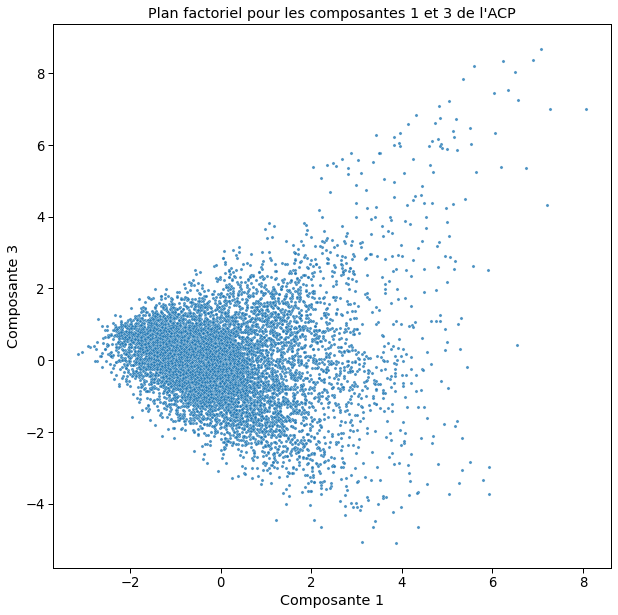

In [28]:
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les composantes 1 et 3 de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 3')
ax = plt.gca()

sns.scatterplot(x = x_show,
                y = z_show,
                #hue = hue_show,
                alpha=0.8, s=10)
sns.set_context("paper", font_scale=1) 
plt.savefig('2.png',dpi=500)

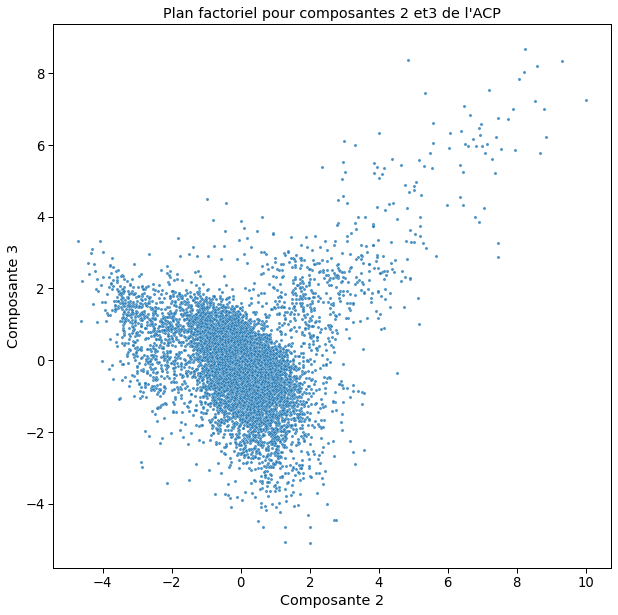

In [29]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour composantes 2 et3 de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 2')
plt.ylabel('Composante 3')
ax = plt.gca()

sns.scatterplot(x = y_show,
                y = z_show,
                #hue = hue_show,
                alpha=0.8, s=10)

sns.set_context("paper", font_scale=1) 
plt.savefig('3.png',dpi=500)

## T-SNE

utilisons l'algorithme T-SNE pour avoir une idée en première approche du nombre de groupes homogènes

In [30]:
tsne = TSNE(n_components=2)
T = tsne.fit_transform(X_pca.copy())

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


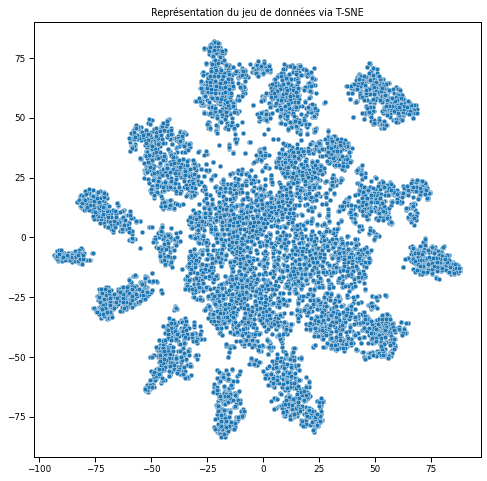

In [31]:
plt.figure(figsize=(8,8))
plt.title('Représentation du jeu de données via T-SNE')
sns.scatterplot(T[:,0], T[:,1])
plt.savefig('4.png',dpi=500)

## Kmeans

### Premier essai

In [33]:
kmeans = KMeans(n_clusters=5, 
                verbose=1, 
                random_state=0).fit(X_pca)

Initialization complete
Iteration 0, inertia 218872.4637414155
Iteration 1, inertia 183644.62183366253
Iteration 2, inertia 182281.73214932773
Iteration 3, inertia 181247.5766384191
Iteration 4, inertia 180507.80613060546
Iteration 5, inertia 180121.7502033673
Iteration 6, inertia 179824.07123890863
Iteration 7, inertia 179544.78352646736
Iteration 8, inertia 179350.3668943576
Iteration 9, inertia 179215.77280970235
Iteration 10, inertia 179109.9137117186
Iteration 11, inertia 179013.9561262151
Iteration 12, inertia 178894.85019843836
Iteration 13, inertia 178701.60316635104
Iteration 14, inertia 178451.0484682415
Iteration 15, inertia 178072.06736605326
Iteration 16, inertia 177267.43855776387
Iteration 17, inertia 175527.94514483993
Iteration 18, inertia 174972.01480733123
Iteration 19, inertia 174704.43379825598
Iteration 20, inertia 174340.80690092334
Iteration 21, inertia 173967.44181638936
Iteration 22, inertia 173592.84398523814
Iteration 23, inertia 173256.03443765448
Iteration

Converged at iteration 31: center shift 6.1027540783963424e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 219539.36527176644
Iteration 1, inertia 179875.55343793097
Iteration 2, inertia 177977.78020317605
Iteration 3, inertia 177366.05084899408
Iteration 4, inertia 177120.82848923415
Iteration 5, inertia 176831.41203349858
Iteration 6, inertia 176385.6818097495
Iteration 7, inertia 175856.37640756625
Iteration 8, inertia 175447.94121540725
Iteration 9, inertia 175261.21028257048
Iteration 10, inertia 175182.98065137194
Iteration 11, inertia 175148.61124750334
Iteration 12, inertia 175128.77591895065
Iteration 13, inertia 175118.41555638245
Iteration 14, inertia 175112.74159528007
Iteration 15, inertia 175109.97853435436
Iteration 16, inertia 175108.5285945583
Iteration 17, inertia 175107.56396225884
Iteration 18, inertia 175105.90113301197
Iteration 19, inertia 175104.66380695516
Iteration 20, inertia 175104.11853738572
Iteration 21, inertia 1

In [34]:
kmeans.labels_

array([0, 2, 0, ..., 2, 2, 2])

### Recherche d'un optimum du nombre de clusters

NB : intertia = Sum of squared distances of samples to their closest cluster center.


#### 1 sample

In [35]:
inertia = {}
dict_kmeans = {}
for k in range(1,25):
    print(k)
    kmeans = KMeans(n_clusters=k,
                   verbose=1,
                   random_state=0).fit(X_pca)
    inertia[k] = kmeans.inertia_
    dict_kmeans[k] = kmeans
    

1
Initialization complete
Iteration 0, inertia 342021.8487686201.
Iteration 1, inertia 210133.469212581.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 326081.7340865858.
Iteration 1, inertia 210133.469212581.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 289098.077830911.
Iteration 1, inertia 210133.469212581.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 267252.88637832523.
Iteration 1, inertia 210133.469212581.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1511319.0999748097.
Iteration 1, inertia 210133.469212581.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 441178.2417424404.
Iteration 1, inertia 210133.469212581.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 585880.6921340097.
Iteration 1, inertia 210133.469212581.


Iteration 37, inertia 198013.24850486312
Converged at iteration 37: center shift 2.5195657694921967e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 286133.11206314334
Iteration 1, inertia 199814.6330725429
Iteration 2, inertia 199238.2409073875
Iteration 3, inertia 199078.24120040142
Iteration 4, inertia 198989.58479597047
Iteration 5, inertia 198929.8059323949
Iteration 6, inertia 198871.89594314282
Iteration 7, inertia 198823.95315706675
Iteration 8, inertia 198780.1752372892
Iteration 9, inertia 198738.9961961009
Iteration 10, inertia 198715.24221775142
Iteration 11, inertia 198692.63023185296
Iteration 12, inertia 198664.04557082136
Iteration 13, inertia 198612.20580757697
Iteration 14, inertia 198496.9313314312
Iteration 15, inertia 198387.50329783474
Iteration 16, inertia 198295.33167994942
Iteration 17, inertia 198234.32247991618
Iteration 18, inertia 198199.30339050308
Iteration 19, inertia 198175.4225131476
Iteration 20, inertia 198157

Iteration 24, inertia 190801.18817200334
Iteration 25, inertia 190763.74165534863
Iteration 26, inertia 190699.0397826083
Iteration 27, inertia 190558.59657513569
Iteration 28, inertia 190275.0369791587
Iteration 29, inertia 189848.66839996658
Iteration 30, inertia 189454.12923676695
Iteration 31, inertia 189211.33031657894
Iteration 32, inertia 189083.70188801896
Iteration 33, inertia 188922.17138696875
Iteration 34, inertia 188795.69943430505
Iteration 35, inertia 188704.7093667335
Iteration 36, inertia 188626.00154366737
Iteration 37, inertia 188451.37678623927
Iteration 38, inertia 188181.39035273856
Iteration 39, inertia 187998.60746171992
Iteration 40, inertia 187964.29862615652
Iteration 41, inertia 187938.903940694
Iteration 42, inertia 187915.49521569698
Iteration 43, inertia 187899.7266986379
Iteration 44, inertia 187879.29939753236
Iteration 45, inertia 187868.19944451103
Iteration 46, inertia 187858.26537056096
Iteration 47, inertia 187849.43266854662
Iteration 48, inertia 

Iteration 10, inertia 181149.4190269304
Iteration 11, inertia 181108.04920693958
Iteration 12, inertia 181093.27798536976
Iteration 13, inertia 181087.51204834942
Iteration 14, inertia 181083.0546152064
Iteration 15, inertia 181079.3814712513
Iteration 16, inertia 181072.2287154424
Iteration 17, inertia 181060.48491611186
Iteration 18, inertia 181053.89440659207
Converged at iteration 18: center shift 0.00010927030177274742 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 218635.65544435199
Iteration 1, inertia 184884.61344782804
Iteration 2, inertia 183699.81667497495
Iteration 3, inertia 183239.16975592732
Iteration 4, inertia 183051.7727068369
Iteration 5, inertia 182990.22593993787
Iteration 6, inertia 182966.8585997856
Iteration 7, inertia 182957.0544483714
Iteration 8, inertia 182947.36067251058
Iteration 9, inertia 182934.6336037609
Iteration 10, inertia 182921.2968650094
Iteration 11, inertia 182903.92995130178
Iteration 12, inertia 182882.0

Iteration 27, inertia 175562.04924372304
Iteration 28, inertia 175561.16725677784
Iteration 29, inertia 175560.51568295108
Iteration 30, inertia 175560.011087367
Iteration 31, inertia 175559.62571280616
Converged at iteration 31: center shift 6.1027540783962936e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 219539.36527176644
Iteration 1, inertia 179875.55343793097
Iteration 2, inertia 177977.78020317605
Iteration 3, inertia 177366.05084899408
Iteration 4, inertia 177120.82848923415
Iteration 5, inertia 176831.41203349858
Iteration 6, inertia 176385.6818097495
Iteration 7, inertia 175856.37640756625
Iteration 8, inertia 175447.94121540725
Iteration 9, inertia 175261.21028257048
Iteration 10, inertia 175182.9806513719
Iteration 11, inertia 175148.61124750334
Iteration 12, inertia 175128.77591895065
Iteration 13, inertia 175118.41555638245
Iteration 14, inertia 175112.74159528007
Iteration 15, inertia 175109.97853435436
Iteration 16, inertia 175

Iteration 5, inertia 167124.07455628755
Iteration 6, inertia 166855.17293831817
Iteration 7, inertia 166636.8209708825
Iteration 8, inertia 166379.64812368315
Iteration 9, inertia 166142.47448125173
Iteration 10, inertia 165985.13458394865
Iteration 11, inertia 165882.2536269896
Iteration 12, inertia 165844.74416605188
Iteration 13, inertia 165820.8136560053
Iteration 14, inertia 165800.66179532604
Iteration 15, inertia 165793.5360192871
Iteration 16, inertia 165789.3044698543
Iteration 17, inertia 165787.1713087599
Iteration 18, inertia 165786.09904209521
Iteration 19, inertia 165785.55978578966
Iteration 20, inertia 165784.99498625932
Converged at iteration 20: center shift 6.868845494055858e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 211962.77914534553
Iteration 1, inertia 175645.28299239077
Iteration 2, inertia 172986.53174951533
Iteration 3, inertia 171910.16866747828
Iteration 4, inertia 171346.9292931304
Iteration 5, inertia 170924.3

Iteration 0, inertia 198576.69974318496
Iteration 1, inertia 171470.70435460762
Iteration 2, inertia 169958.92773235205
Iteration 3, inertia 168305.36344134933
Iteration 4, inertia 165593.4760237173
Iteration 5, inertia 162036.83072483412
Iteration 6, inertia 160984.5947788956
Iteration 7, inertia 160465.47530084988
Iteration 8, inertia 160199.47161892164
Iteration 9, inertia 160020.15106157935
Iteration 10, inertia 159702.38581541314
Iteration 11, inertia 159562.67380483603
Iteration 12, inertia 159461.33261174627
Iteration 13, inertia 159238.3268660592
Iteration 14, inertia 159015.65048051107
Iteration 15, inertia 158512.04033945728
Iteration 16, inertia 157539.50280305755
Iteration 17, inertia 157105.66800194702
Iteration 18, inertia 157049.5429459983
Iteration 19, inertia 157025.3398570799
Iteration 20, inertia 157008.89862378416
Iteration 21, inertia 156998.49412736215
Iteration 22, inertia 156992.26856196055
Iteration 23, inertia 156986.90028373088
Iteration 24, inertia 156982.63

Iteration 7, inertia 155756.10021804593
Iteration 8, inertia 155604.271662239
Iteration 9, inertia 155429.01204984603
Iteration 10, inertia 155256.3458418384
Iteration 11, inertia 155174.48207513324
Iteration 12, inertia 155136.82854847933
Iteration 13, inertia 155121.00710858108
Iteration 14, inertia 155112.89038537018
Iteration 15, inertia 155106.06837994396
Iteration 16, inertia 155105.3040162757
Converged at iteration 16: center shift 2.2659413936444204e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 194552.44500038237
Iteration 1, inertia 165090.14993466402
Iteration 2, inertia 163101.76827708617
Iteration 3, inertia 162182.22355026525
Iteration 4, inertia 161652.11435753742
Iteration 5, inertia 161276.62378764187
Iteration 6, inertia 160970.70823557986
Iteration 7, inertia 160691.2362312363
Iteration 8, inertia 160385.27108977298
Iteration 9, inertia 160069.47749332976
Iteration 10, inertia 159690.1480389809
Iteration 11, inertia 159360.1

Iteration 31, inertia 150429.3389885892
Iteration 32, inertia 150425.39837724276
Iteration 33, inertia 150422.27183349585
Iteration 34, inertia 150418.4173612079
Iteration 35, inertia 150415.12741748418
Iteration 36, inertia 150412.0129499798
Iteration 37, inertia 150409.1168969582
Iteration 38, inertia 150407.69039214068
Iteration 39, inertia 150406.00579617353
Iteration 40, inertia 150405.2409317749
Converged at iteration 40: center shift 6.16349987610604e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 197137.5067699048
Iteration 1, inertia 158534.14878772188
Iteration 2, inertia 156937.28577481737
Iteration 3, inertia 156270.1606696836
Iteration 4, inertia 155684.14059861598
Iteration 5, inertia 154989.3809945366
Iteration 6, inertia 154209.6217226262
Iteration 7, inertia 153506.6860445727
Iteration 8, inertia 153018.78083942138
Iteration 9, inertia 152714.2019860582
Iteration 10, inertia 152589.50836413776
Iteration 11, inertia 152517.33365

Iteration 62, inertia 150664.43408241504
Iteration 63, inertia 150586.73164529543
Iteration 64, inertia 150486.60818630495
Iteration 65, inertia 150364.18999883108
Iteration 66, inertia 150225.73982399018
Iteration 67, inertia 150153.1380121497
Iteration 68, inertia 150097.03176205134
Iteration 69, inertia 150057.99357720904
Iteration 70, inertia 150016.29286097694
Iteration 71, inertia 149893.33746915907
Iteration 72, inertia 149670.83516342394
Iteration 73, inertia 149607.55761162078
Iteration 74, inertia 149588.17418294656
Iteration 75, inertia 149574.4514508631
Iteration 76, inertia 149535.56896999548
Iteration 77, inertia 149512.28420078295
Iteration 78, inertia 149415.38294245207
Iteration 79, inertia 149145.96022910665
Iteration 80, inertia 149094.40960191065
Iteration 81, inertia 149093.74857812404
Converged at iteration 81: center shift 6.479413914517257e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 181055.1030203371
Iteration 1, ine

Iteration 0, inertia 176151.27976381456
Iteration 1, inertia 156563.05091810733
Iteration 2, inertia 154912.77026007228
Iteration 3, inertia 154100.58307531575
Iteration 4, inertia 153176.20469563204
Iteration 5, inertia 151738.19516594074
Iteration 6, inertia 149975.0508653086
Iteration 7, inertia 147844.30556711296
Iteration 8, inertia 146307.6733154821
Iteration 9, inertia 145880.81545707124
Iteration 10, inertia 145512.72940690635
Iteration 11, inertia 144986.3078168606
Iteration 12, inertia 144436.78086005407
Iteration 13, inertia 144075.47381636163
Iteration 14, inertia 143837.85597885188
Iteration 15, inertia 143608.8804574761
Iteration 16, inertia 143445.90024966135
Iteration 17, inertia 143338.7148134044
Iteration 18, inertia 143268.76081280317
Iteration 19, inertia 143216.01884260913
Iteration 20, inertia 143167.6853233192
Iteration 21, inertia 143116.96452707436
Iteration 22, inertia 143082.1520325034
Iteration 23, inertia 143059.7205789329
Iteration 24, inertia 143043.21934

Iteration 0, inertia 181611.40466988715
Iteration 1, inertia 146782.9007663299
Iteration 2, inertia 142209.3625125903
Iteration 3, inertia 140454.97200893372
Iteration 4, inertia 138121.5278902299
Iteration 5, inertia 137573.61382252446
Iteration 6, inertia 137400.1733766877
Iteration 7, inertia 137328.47436043026
Iteration 8, inertia 137295.83427413605
Iteration 9, inertia 137280.50263667278
Iteration 10, inertia 137264.73908051034
Iteration 11, inertia 137247.18687247648
Iteration 12, inertia 137235.57222659478
Iteration 13, inertia 137230.95445173106
Iteration 14, inertia 137227.5298244823
Iteration 15, inertia 137225.32763424475
Iteration 16, inertia 137222.71727632376
Iteration 17, inertia 137218.76514083415
Iteration 18, inertia 137214.67271799975
Iteration 19, inertia 137208.6565534289
Iteration 20, inertia 137199.57055389098
Iteration 21, inertia 137188.2437384182
Iteration 22, inertia 137172.91149019124
Iteration 23, inertia 137156.01705966453
Iteration 24, inertia 137143.0813

Iteration 0, inertia 170119.67105905854
Iteration 1, inertia 142202.41110777712
Iteration 2, inertia 138581.28829556162
Iteration 3, inertia 136713.00744779038
Iteration 4, inertia 135614.71631750744
Iteration 5, inertia 135114.86011115916
Iteration 6, inertia 134970.74785789088
Iteration 7, inertia 134933.50978056804
Iteration 8, inertia 134923.72126268846
Iteration 9, inertia 134916.22138727058
Iteration 10, inertia 134904.67173399127
Iteration 11, inertia 134883.99676449198
Iteration 12, inertia 134863.09286246193
Iteration 13, inertia 134859.0966344174
Iteration 14, inertia 134858.0830530912
Iteration 15, inertia 134857.69975865958
Converged at iteration 15: center shift 0.00010051170977284549 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 181616.51191677607
Iteration 1, inertia 153245.91948424178
Iteration 2, inertia 147771.91981066
Iteration 3, inertia 146043.53197628944
Iteration 4, inertia 145065.24866848293
Iteration 5, inertia 144478.889

Iteration 0, inertia 161701.92362834472
Iteration 1, inertia 136128.24545956645
Iteration 2, inertia 133478.21088612836
Iteration 3, inertia 131894.91830672236
Iteration 4, inertia 130799.77638590347
Iteration 5, inertia 130078.67097907948
Iteration 6, inertia 129669.61164833141
Iteration 7, inertia 129440.52051060332
Iteration 8, inertia 129271.55352156404
Iteration 9, inertia 129180.48703630353
Iteration 10, inertia 129107.75926198061
Iteration 11, inertia 129067.021575524
Iteration 12, inertia 129013.4711955709
Iteration 13, inertia 128966.3021374616
Iteration 14, inertia 128915.1229785385
Iteration 15, inertia 128814.0953260178
Iteration 16, inertia 128694.96563059921
Iteration 17, inertia 128524.80350986334
Iteration 18, inertia 128307.65443068891
Iteration 19, inertia 128095.57644195984
Iteration 20, inertia 127652.37330934443
Iteration 21, inertia 127252.29642099836
Iteration 22, inertia 127128.78843667507
Iteration 23, inertia 127001.32525798937
Iteration 24, inertia 126879.806

Iteration 15, inertia 122779.3549290376
Iteration 16, inertia 122778.31107031486
Iteration 17, inertia 122776.894259949
Iteration 18, inertia 122776.1699300459
Iteration 19, inertia 122775.53492851951
Iteration 20, inertia 122774.16961502862
Iteration 21, inertia 122772.23057725378
Iteration 22, inertia 122770.8131504362
Iteration 23, inertia 122768.99936304144
Iteration 24, inertia 122768.05421580878
Iteration 25, inertia 122767.55193090884
Iteration 26, inertia 122767.26955481038
Iteration 27, inertia 122766.89492938515
Iteration 28, inertia 122766.68883531514
Converged at iteration 28: center shift 3.365178123208844e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 165899.74819214875
Iteration 1, inertia 136113.96602853332
Iteration 2, inertia 131631.3309384353
Iteration 3, inertia 130123.38623849394
Iteration 4, inertia 129365.82929541988
Iteration 5, inertia 128761.57681906567
Iteration 6, inertia 127991.20519772745
Iteration 7, inertia 1265

Iteration 25, inertia 121855.23866025437
Iteration 26, inertia 121844.82742288093
Iteration 27, inertia 121842.68993971407
Iteration 28, inertia 121841.71906484527
Iteration 29, inertia 121840.69821877732
Iteration 30, inertia 121838.89142377615
Iteration 31, inertia 121837.46145452381
Iteration 32, inertia 121836.83136623539
Iteration 33, inertia 121836.69338035524
Converged at iteration 33: strict convergence.
Initialization complete
Iteration 0, inertia 167505.1332208992
Iteration 1, inertia 129535.90765038376
Iteration 2, inertia 125248.10901006882
Iteration 3, inertia 123229.99132278089
Iteration 4, inertia 122389.09359711438
Iteration 5, inertia 122027.21340222101
Iteration 6, inertia 121867.42593486492
Iteration 7, inertia 121771.50266511147
Iteration 8, inertia 121667.35010624162
Iteration 9, inertia 121563.88798711757
Iteration 10, inertia 121443.7463577184
Iteration 11, inertia 121274.45885724518
Iteration 12, inertia 121064.49052803416
Iteration 13, inertia 120841.9845627901

Iteration 37, inertia 112600.45091404121
Iteration 38, inertia 112589.48470802404
Iteration 39, inertia 112585.35536742542
Iteration 40, inertia 112584.00516060845
Iteration 41, inertia 112583.468797771
Iteration 42, inertia 112582.92180787551
Iteration 43, inertia 112581.93598368074
Iteration 44, inertia 112581.32882923589
Iteration 45, inertia 112580.58678351137
Iteration 46, inertia 112580.42486963721
Iteration 47, inertia 112580.30050003651
Iteration 48, inertia 112580.21755014136
Converged at iteration 48: strict convergence.
Initialization complete
Iteration 0, inertia 149421.98785111957
Iteration 1, inertia 117769.05535294175
Iteration 2, inertia 114478.51169854737
Iteration 3, inertia 113400.54612143466
Iteration 4, inertia 112710.4082629529
Iteration 5, inertia 112200.00646046175
Iteration 6, inertia 111963.24242128828
Iteration 7, inertia 111861.19955104477
Iteration 8, inertia 111805.11186194974
Iteration 9, inertia 111772.67270548391
Iteration 10, inertia 111752.61118866332

Iteration 0, inertia 153220.40060021752
Iteration 1, inertia 125119.05973083613
Iteration 2, inertia 119756.95085271717
Iteration 3, inertia 115966.49371121876
Iteration 4, inertia 113548.83906620984
Iteration 5, inertia 113004.2074249094
Iteration 6, inertia 112881.49517033077
Iteration 7, inertia 112843.03564910793
Iteration 8, inertia 112814.84864417596
Iteration 9, inertia 112788.09718638728
Iteration 10, inertia 112756.34285026323
Iteration 11, inertia 112708.08833734193
Iteration 12, inertia 112637.98053575761
Iteration 13, inertia 112541.67435942657
Iteration 14, inertia 112485.33416163054
Iteration 15, inertia 112464.3487945167
Iteration 16, inertia 112449.04886078424
Iteration 17, inertia 112440.4655585051
Iteration 18, inertia 112433.5519229418
Iteration 19, inertia 112428.10499623758
Iteration 20, inertia 112420.8511863866
Iteration 21, inertia 112414.13871602845
Iteration 22, inertia 112409.0317566959
Iteration 23, inertia 112405.54821893357
Iteration 24, inertia 112402.083

Iteration 8, inertia 106220.03659244449
Iteration 9, inertia 105393.2647672237
Iteration 10, inertia 104768.99178265754
Iteration 11, inertia 104542.37957201051
Iteration 12, inertia 104466.24556714464
Iteration 13, inertia 104431.43167945059
Iteration 14, inertia 104412.16318053189
Iteration 15, inertia 104403.58306470966
Iteration 16, inertia 104396.93570338355
Iteration 17, inertia 104389.73503908726
Iteration 18, inertia 104385.33181626769
Iteration 19, inertia 104384.30749540143
Iteration 20, inertia 104383.91155032639
Converged at iteration 20: center shift 4.179466128307855e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 152862.08564922147
Iteration 1, inertia 120334.1688086403
Iteration 2, inertia 117197.7049931328
Iteration 3, inertia 115838.55137789994
Iteration 4, inertia 115194.62810807118
Iteration 5, inertia 114820.26091180377
Iteration 6, inertia 114590.52666278489
Iteration 7, inertia 114446.10450430642
Iteration 8, inertia 1143

Initialization complete
Iteration 0, inertia 150461.71280547348
Iteration 1, inertia 115457.18074601964
Iteration 2, inertia 112832.03837030736
Iteration 3, inertia 111616.59819618809
Iteration 4, inertia 110878.11760960626
Iteration 5, inertia 110363.53211352254
Iteration 6, inertia 109924.80147378655
Iteration 7, inertia 109526.23658433216
Iteration 8, inertia 109329.8777178825
Iteration 9, inertia 108989.08117198072
Iteration 10, inertia 108058.1656190074
Iteration 11, inertia 105582.00469555032
Iteration 12, inertia 104308.28528986115
Iteration 13, inertia 103747.81137752798
Iteration 14, inertia 102924.21879844482
Iteration 15, inertia 100967.99927648419
Iteration 16, inertia 100426.15770694672
Iteration 17, inertia 100238.17930871986
Iteration 18, inertia 100100.61651385753
Iteration 19, inertia 100001.11583578915
Iteration 20, inertia 99935.556520687
Iteration 21, inertia 99896.06647007095
Iteration 22, inertia 99876.73888112138
Iteration 23, inertia 99872.33625545472
Iteration 

Iteration 16, inertia 93054.43839929636
Iteration 17, inertia 93044.84496054644
Iteration 18, inertia 93041.3475871123
Iteration 19, inertia 93034.1421237537
Iteration 20, inertia 93024.51184847878
Iteration 21, inertia 93021.53688591708
Iteration 22, inertia 93016.66302085712
Iteration 23, inertia 93011.5664455291
Iteration 24, inertia 93005.20071433365
Iteration 25, inertia 93001.26612858348
Iteration 26, inertia 93000.45611764875
Iteration 27, inertia 93000.07896503445
Iteration 28, inertia 92999.85652631824
Iteration 29, inertia 92999.73894912624
Converged at iteration 29: strict convergence.
Initialization complete
Iteration 0, inertia 144158.18377653125
Iteration 1, inertia 105393.44097363866
Iteration 2, inertia 101211.54777905313
Iteration 3, inertia 99438.48958038434
Iteration 4, inertia 98917.85606734184
Iteration 5, inertia 98722.43218866247
Iteration 6, inertia 98624.48668634698
Iteration 7, inertia 98580.94065325105
Iteration 8, inertia 98570.73112549928
Iteration 9, inert

Iteration 0, inertia 152206.6840372451
Iteration 1, inertia 112978.66457949094
Iteration 2, inertia 106539.31334406942
Iteration 3, inertia 103914.08038294579
Iteration 4, inertia 99236.24705052539
Iteration 5, inertia 98005.31191330479
Iteration 6, inertia 97551.01360902446
Iteration 7, inertia 97400.08905060185
Iteration 8, inertia 97315.60168904533
Iteration 9, inertia 97227.47112369962
Iteration 10, inertia 97144.3541024539
Iteration 11, inertia 97079.66087174261
Iteration 12, inertia 96981.93216555036
Iteration 13, inertia 96851.76745611514
Iteration 14, inertia 96411.61015667258
Iteration 15, inertia 95248.16713534322
Iteration 16, inertia 94666.56376254559
Iteration 17, inertia 94453.84789291526
Iteration 18, inertia 94395.06364389643
Iteration 19, inertia 94369.1963612647
Iteration 20, inertia 94362.06744998303
Iteration 21, inertia 94359.26463573767
Iteration 22, inertia 94357.38729276245
Iteration 23, inertia 94355.76727996486
Iteration 24, inertia 94354.09407457945
Iteration

Iteration 0, inertia 136444.34618839982
Iteration 1, inertia 105805.15579722759
Iteration 2, inertia 102037.26429998974
Iteration 3, inertia 100361.69396129609
Iteration 4, inertia 97370.9708176195
Iteration 5, inertia 95148.06787902741
Iteration 6, inertia 94967.98922948574
Iteration 7, inertia 94885.89177583836
Iteration 8, inertia 94792.68663476012
Iteration 9, inertia 94658.58202662435
Iteration 10, inertia 94418.39613615986
Iteration 11, inertia 93826.02322915675
Iteration 12, inertia 92510.50033067791
Iteration 13, inertia 91916.42096243416
Iteration 14, inertia 91670.5057427811
Iteration 15, inertia 91587.59973087542
Iteration 16, inertia 91555.70860665078
Iteration 17, inertia 91543.72062097501
Iteration 18, inertia 91536.46549433464
Iteration 19, inertia 91531.8035343862
Iteration 20, inertia 91527.93701333502
Iteration 21, inertia 91523.24774233266
Iteration 22, inertia 91519.05042923398
Iteration 23, inertia 91516.33838660124
Iteration 24, inertia 91513.27593528225
Iteration

Iteration 7, inertia 87372.94294313992
Iteration 8, inertia 87321.3189237934
Iteration 9, inertia 87292.19694359408
Iteration 10, inertia 87274.74107643035
Iteration 11, inertia 87265.20755619128
Iteration 12, inertia 87258.3324148118
Iteration 13, inertia 87253.48111516761
Iteration 14, inertia 87248.46414821477
Iteration 15, inertia 87244.55951133074
Iteration 16, inertia 87241.9815317291
Iteration 17, inertia 87240.7500055822
Iteration 18, inertia 87239.95333935607
Iteration 19, inertia 87239.35411401885
Iteration 20, inertia 87238.73481329619
Iteration 21, inertia 87237.82039756326
Iteration 22, inertia 87237.33387660547
Iteration 23, inertia 87237.02091660726
Iteration 24, inertia 87236.51727974036
Iteration 25, inertia 87235.97211756407
Iteration 26, inertia 87235.57224316898
Converged at iteration 26: center shift 9.598734482470467e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 132911.05927703233
Iteration 1, inertia 102829.85398204546


Iteration 7, inertia 88650.49649164447
Iteration 8, inertia 88455.00599082923
Iteration 9, inertia 88345.83302793148
Iteration 10, inertia 88298.96375431665
Iteration 11, inertia 88280.81693586345
Iteration 12, inertia 88270.83833911791
Iteration 13, inertia 88263.76859019262
Iteration 14, inertia 88258.70077838856
Iteration 15, inertia 88251.6551793328
Iteration 16, inertia 88245.68982269618
Iteration 17, inertia 88242.70914457386
Iteration 18, inertia 88240.22790648525
Iteration 19, inertia 88238.32331254183
Iteration 20, inertia 88235.63865408426
Iteration 21, inertia 88232.57641987978
Iteration 22, inertia 88230.11888167879
Iteration 23, inertia 88227.49316390706
Iteration 24, inertia 88224.46293229719
Iteration 25, inertia 88221.87410811466
Iteration 26, inertia 88220.8091849979
Iteration 27, inertia 88220.34399956785
Iteration 28, inertia 88219.72581985964
Iteration 29, inertia 88219.32854965917
Converged at iteration 29: center shift 7.056484456280281e-05 within tolerance 0.0001

Iteration 9, inertia 87009.6915095541
Iteration 10, inertia 86920.22889010914
Iteration 11, inertia 86867.27222788878
Iteration 12, inertia 86830.97870602936
Iteration 13, inertia 86791.48832678271
Iteration 14, inertia 86705.51924191316
Iteration 15, inertia 86528.45218383255
Iteration 16, inertia 86189.23180852059
Iteration 17, inertia 85750.97016281595
Iteration 18, inertia 85455.82714614499
Iteration 19, inertia 85369.9580978974
Iteration 20, inertia 85352.3856281656
Iteration 21, inertia 85347.63916143231
Iteration 22, inertia 85345.55778761151
Iteration 23, inertia 85344.21757871138
Iteration 24, inertia 85343.15284752911
Iteration 25, inertia 85342.64004717214
Iteration 26, inertia 85341.86378200883
Iteration 27, inertia 85341.19136724138
Converged at iteration 27: center shift 0.00010790534246462811 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 128347.3140850487
Iteration 1, inertia 94685.27080664788
Iteration 2, inertia 90886.33963920348

Initialization complete
Iteration 0, inertia 118333.72297850181
Iteration 1, inertia 87260.98564493714
Iteration 2, inertia 86122.77076754239
Iteration 3, inertia 85595.87554687812
Iteration 4, inertia 85229.87622170126
Iteration 5, inertia 84987.6521261205
Iteration 6, inertia 84833.19766687654
Iteration 7, inertia 84745.24072068113
Iteration 8, inertia 84694.5886406315
Iteration 9, inertia 84668.76017084792
Iteration 10, inertia 84652.72948961839
Iteration 11, inertia 84643.86877359057
Iteration 12, inertia 84637.31082533751
Iteration 13, inertia 84632.70956514297
Iteration 14, inertia 84628.66729389141
Iteration 15, inertia 84626.88495323969
Iteration 16, inertia 84625.70878182034
Iteration 17, inertia 84624.52972857334
Iteration 18, inertia 84623.35194352179
Iteration 19, inertia 84622.79860110774
Iteration 20, inertia 84622.43897923961
Iteration 21, inertia 84622.04370766168
Iteration 22, inertia 84621.6061376108
Iteration 23, inertia 84621.09152810703
Iteration 24, inertia 84620.

Iteration 17, inertia 83723.75808991525
Iteration 18, inertia 83718.34991709705
Iteration 19, inertia 83713.41218857473
Iteration 20, inertia 83709.29918100899
Iteration 21, inertia 83705.23562279201
Iteration 22, inertia 83701.98476201181
Iteration 23, inertia 83699.97368306192
Iteration 24, inertia 83699.04795990765
Iteration 25, inertia 83698.16963463355
Iteration 26, inertia 83697.34650683984
Iteration 27, inertia 83696.38898092782
Iteration 28, inertia 83695.5562018137
Iteration 29, inertia 83694.93929388266
Iteration 30, inertia 83694.35545496755
Iteration 31, inertia 83694.02746313949
Iteration 32, inertia 83693.76228789346
Iteration 33, inertia 83693.3612908897
Iteration 34, inertia 83693.01531951144
Iteration 35, inertia 83692.7850698154
Converged at iteration 35: center shift 0.00010769903187541753 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 122820.96819845184
Iteration 1, inertia 92459.53988667982
Iteration 2, inertia 88225.789834133

Iteration 24, inertia 82352.0055145479
Iteration 25, inertia 82351.67828267519
Iteration 26, inertia 82351.39507448378
Iteration 27, inertia 82351.02325302517
Iteration 28, inertia 82350.62510715376
Iteration 29, inertia 82350.3525662128
Iteration 30, inertia 82350.22316493084
Converged at iteration 30: center shift 7.301650927168997e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 122990.60790809272
Iteration 1, inertia 87737.48838127078
Iteration 2, inertia 83521.38292266373
Iteration 3, inertia 82648.70863123961
Iteration 4, inertia 82371.61401159209
Iteration 5, inertia 82241.30984134179
Iteration 6, inertia 82177.10158907827
Iteration 7, inertia 82148.38415827927
Iteration 8, inertia 82133.82533158553
Iteration 9, inertia 82127.3665427614
Iteration 10, inertia 82123.18428894706
Iteration 11, inertia 82120.68591302545
Iteration 12, inertia 82117.53230391242
Iteration 13, inertia 82113.36827559705
Iteration 14, inertia 82107.44061906612
Itera

Iteration 43, inertia 81390.0811293904
Iteration 44, inertia 81383.11841519752
Iteration 45, inertia 81372.32412140234
Iteration 46, inertia 81362.16079900105
Iteration 47, inertia 81348.40650775612
Iteration 48, inertia 81337.03685389584
Iteration 49, inertia 81325.86064251108
Iteration 50, inertia 81317.65512439291
Iteration 51, inertia 81308.29751237413
Iteration 52, inertia 81300.71549031945
Iteration 53, inertia 81292.45322513023
Iteration 54, inertia 81286.35975532894
Iteration 55, inertia 81282.75941208676
Iteration 56, inertia 81280.06329140783
Iteration 57, inertia 81276.25588276541
Iteration 58, inertia 81272.71035970154
Iteration 59, inertia 81269.49699307879
Iteration 60, inertia 81267.86560020769
Iteration 61, inertia 81267.0907628084
Iteration 62, inertia 81266.60665063818
Iteration 63, inertia 81266.20748566475
Iteration 64, inertia 81265.8569709479
Iteration 65, inertia 81265.61399518995
Iteration 66, inertia 81265.3103478549
Iteration 67, inertia 81265.06575588773
Conv

Iteration 0, inertia 122662.5207190302
Iteration 1, inertia 90293.18640302692
Iteration 2, inertia 84587.43712411093
Iteration 3, inertia 83354.13324644236
Iteration 4, inertia 82900.56234020085
Iteration 5, inertia 82769.16533390757
Iteration 6, inertia 82695.8493836223
Iteration 7, inertia 82632.53245050636
Iteration 8, inertia 82563.36713571505
Iteration 9, inertia 82483.6410999668
Iteration 10, inertia 82395.0663386982
Iteration 11, inertia 82306.73175781794
Iteration 12, inertia 82250.40337112469
Iteration 13, inertia 82206.44960609978
Iteration 14, inertia 82183.72500645867
Iteration 15, inertia 82174.25741211779
Iteration 16, inertia 82169.08654116016
Iteration 17, inertia 82164.99816170937
Iteration 18, inertia 82162.06944739276
Iteration 19, inertia 82159.74970237113
Iteration 20, inertia 82158.00989564203
Iteration 21, inertia 82156.84250795748
Iteration 22, inertia 82155.77857098074
Iteration 23, inertia 82155.33752155103
Converged at iteration 23: center shift 0.00010327285

Iteration 17, inertia 81190.18986422983
Iteration 18, inertia 81188.47984623785
Iteration 19, inertia 81188.12708304057
Iteration 20, inertia 81188.00254666827
Converged at iteration 20: center shift 6.646782260953348e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 115218.72564060995
Iteration 1, inertia 87662.42225761517
Iteration 2, inertia 83650.20440621457
Iteration 3, inertia 82348.92391906469
Iteration 4, inertia 81804.14267451072
Iteration 5, inertia 81582.4263301126
Iteration 6, inertia 81467.20493828774
Iteration 7, inertia 81422.36744781098
Iteration 8, inertia 81396.82121573536
Iteration 9, inertia 81377.50750005976
Iteration 10, inertia 81350.11374207507
Iteration 11, inertia 81317.31454959653
Iteration 12, inertia 81287.05161028523
Iteration 13, inertia 81264.41829779709
Iteration 14, inertia 81243.81025223684
Iteration 15, inertia 81231.46640367039
Iteration 16, inertia 81222.55191193297
Iteration 17, inertia 81217.21636452041
Ite

Iteration 4, inertia 81399.13903254255
Iteration 5, inertia 81033.4003485008
Iteration 6, inertia 80856.73398604877
Iteration 7, inertia 80766.03022005284
Iteration 8, inertia 80685.31357870498
Iteration 9, inertia 80618.83582792958
Iteration 10, inertia 80562.56075778366
Iteration 11, inertia 80508.24518708377
Iteration 12, inertia 80467.8893866782
Iteration 13, inertia 80430.15261769005
Iteration 14, inertia 80408.46697218338
Iteration 15, inertia 80397.9654252074
Iteration 16, inertia 80392.89202193235
Iteration 17, inertia 80389.86524383692
Iteration 18, inertia 80387.8074502843
Iteration 19, inertia 80386.47225966769
Iteration 20, inertia 80385.68777314053
Iteration 21, inertia 80385.16941445402
Iteration 22, inertia 80384.96587361724
Converged at iteration 22: center shift 0.00010889789670304279 within tolerance 0.00011059656274346355.
24
Initialization complete
Iteration 0, inertia 113428.30785206913
Iteration 1, inertia 85733.01971848264
Iteration 2, inertia 83499.66389832199
I

Iteration 3, inertia 80483.87643353344
Iteration 4, inertia 79544.95345800536
Iteration 5, inertia 78731.14779865155
Iteration 6, inertia 78390.99298266994
Iteration 7, inertia 78252.53410353855
Iteration 8, inertia 78193.03311502373
Iteration 9, inertia 78167.09774989219
Iteration 10, inertia 78152.36068807423
Iteration 11, inertia 78144.44318509499
Iteration 12, inertia 78139.88798003759
Iteration 13, inertia 78136.27863538571
Iteration 14, inertia 78132.45338151822
Iteration 15, inertia 78129.3042026661
Iteration 16, inertia 78125.90786472982
Iteration 17, inertia 78121.82813617647
Iteration 18, inertia 78117.97291709621
Iteration 19, inertia 78115.37712980143
Iteration 20, inertia 78113.74520666004
Iteration 21, inertia 78112.14189667866
Iteration 22, inertia 78111.12057415707
Iteration 23, inertia 78110.37258015646
Iteration 24, inertia 78109.93971655249
Iteration 25, inertia 78109.52566218495
Iteration 26, inertia 78109.03483319405
Iteration 27, inertia 78108.47947970017
Iteratio

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


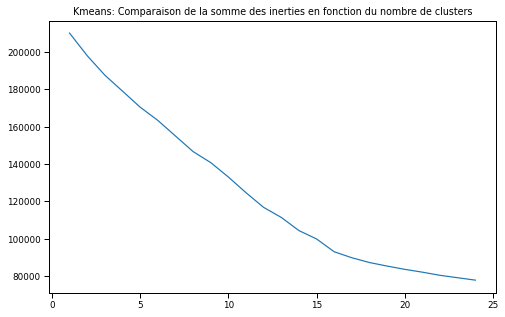

In [36]:
plt.figure(figsize=(8,5))
plt.title('Kmeans: Comparaison de la somme des inerties en fonction du nombre de clusters')
sns.lineplot(list(inertia.keys()),
             list(inertia.values())
            )

#### n samples

In [37]:
inertia = {}
dict_kmeans = {}

nb_boucles=3
max_clusters = 25

for k in range(1,nb_boucles+1):
    print('Boucle ',k)
    for i in range(1,max_clusters+1):
        kmeans = KMeans(n_clusters=i,
                       verbose=1).fit(X_pca)
        inertia[(k,i)] = kmeans.inertia_
        dict_kmeans[k,i] = kmeans

Boucle  1
Initialization complete
Iteration 0, inertia 255877.7957009896.
Iteration 1, inertia 210133.469212581.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 262054.57632425745.
Iteration 1, inertia 210133.469212581.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 820064.7576466978.
Iteration 1, inertia 210133.469212581.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 437428.7880083182.
Iteration 1, inertia 210133.469212581.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 325851.2339561426.
Iteration 1, inertia 210133.469212581.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 313947.0537018859.
Iteration 1, inertia 210133.469212581.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 363750.4629388667.
Iteration 1, inertia 210133.469

Iteration 21, inertia 198180.67145160615
Iteration 22, inertia 198160.76123684138
Iteration 23, inertia 198143.73043438722
Iteration 24, inertia 198130.10239578038
Iteration 25, inertia 198117.73005634086
Iteration 26, inertia 198104.7374920393
Iteration 27, inertia 198093.9897534868
Iteration 28, inertia 198084.07001929622
Iteration 29, inertia 198076.0394781324
Iteration 30, inertia 198068.86462687555
Iteration 31, inertia 198064.85762963688
Iteration 32, inertia 198060.9730536545
Iteration 33, inertia 198055.13761384977
Iteration 34, inertia 198050.59785347804
Iteration 35, inertia 198046.08070805852
Iteration 36, inertia 198041.24161406068
Iteration 37, inertia 198035.6587385817
Iteration 38, inertia 198030.84078575327
Iteration 39, inertia 198027.47188105615
Iteration 40, inertia 198022.37947710723
Iteration 41, inertia 198017.21412756958
Iteration 42, inertia 198013.93017297657
Iteration 43, inertia 198013.24850486312
Converged at iteration 43: center shift 2.5195657694923166e-05

Iteration 10, inertia 190654.26635160076
Iteration 11, inertia 190645.32327869732
Iteration 12, inertia 190638.98292567558
Iteration 13, inertia 190635.17135249608
Iteration 14, inertia 190631.3572624176
Iteration 15, inertia 190628.44511327887
Iteration 16, inertia 190624.94765109126
Iteration 17, inertia 190622.3034761546
Iteration 18, inertia 190619.2525863546
Iteration 19, inertia 190615.1704106888
Iteration 20, inertia 190612.30665925497
Iteration 21, inertia 190609.9143813143
Iteration 22, inertia 190606.83278347345
Iteration 23, inertia 190602.97145584773
Iteration 24, inertia 190600.61589165457
Iteration 25, inertia 190599.3482171829
Iteration 26, inertia 190598.02695513706
Iteration 27, inertia 190597.1388631231
Converged at iteration 27: center shift 3.4182248264845475e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 253438.7191162759
Iteration 1, inertia 196067.075386125
Iteration 2, inertia 195208.0406170511
Iteration 3, inertia 1947

Iteration 5, inertia 184964.77151434027
Iteration 6, inertia 183926.19452062206
Iteration 7, inertia 183175.61226233462
Iteration 8, inertia 182693.08653733967
Iteration 9, inertia 182427.39624741505
Iteration 10, inertia 182278.3928093103
Iteration 11, inertia 182206.05041171183
Iteration 12, inertia 182160.02459178405
Iteration 13, inertia 182119.23955231236
Iteration 14, inertia 182092.26797616528
Iteration 15, inertia 182058.56828986612
Iteration 16, inertia 182037.00667107684
Iteration 17, inertia 182031.56318870088
Iteration 18, inertia 182030.2402100582
Iteration 19, inertia 182029.40612366277
Iteration 20, inertia 182028.4583164371
Iteration 21, inertia 182027.52100829373
Iteration 22, inertia 182026.91596943547
Iteration 23, inertia 182026.61371031095
Converged at iteration 23: center shift 6.637642154958098e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 238645.2122749117
Iteration 1, inertia 191166.78569604532
Iteration 2, inertia 18

Iteration 63, inertia 182721.79459436
Iteration 64, inertia 182720.3579410175
Iteration 65, inertia 182717.57796576558
Iteration 66, inertia 182712.79718684067
Iteration 67, inertia 182703.95865391265
Iteration 68, inertia 182687.83918827857
Iteration 69, inertia 182652.78583876273
Iteration 70, inertia 182625.39104245335
Iteration 71, inertia 182613.4948551344
Iteration 72, inertia 182611.59714071237
Converged at iteration 72: center shift 7.139654035865996e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 199629.9595983798
Iteration 1, inertia 174788.3534807191
Iteration 2, inertia 172277.87960767304
Iteration 3, inertia 171555.36556616236
Iteration 4, inertia 171299.36601010017
Iteration 5, inertia 171175.4779955321
Iteration 6, inertia 171095.70206081454
Iteration 7, inertia 171040.9187028224
Iteration 8, inertia 171004.4992650675
Iteration 9, inertia 170974.6747224041
Iteration 10, inertia 170937.70001940697
Iteration 11, inertia 170885.5647

Iteration 5, inertia 176562.39500200187
Iteration 6, inertia 176263.56878483164
Iteration 7, inertia 175889.2495622
Iteration 8, inertia 175388.60817654917
Iteration 9, inertia 174850.68287320202
Iteration 10, inertia 174435.14703520073
Iteration 11, inertia 174212.03722475586
Iteration 12, inertia 174102.4482377016
Iteration 13, inertia 174024.46571411003
Iteration 14, inertia 173967.36521273924
Iteration 15, inertia 173938.0067345297
Iteration 16, inertia 173925.5246673617
Iteration 17, inertia 173919.91471641808
Iteration 18, inertia 173916.59258949524
Iteration 19, inertia 173914.53054112374
Iteration 20, inertia 173912.5396254291
Iteration 21, inertia 173911.79545207706
Iteration 22, inertia 173911.58474833923
Converged at iteration 22: center shift 4.3095072556916584e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 229202.6393072008
Iteration 1, inertia 180844.37716241536
Iteration 2, inertia 177374.6727662846
Iteration 3, inertia 175409.6

Iteration 21, inertia 165303.86574504996
Iteration 22, inertia 165267.3998326535
Iteration 23, inertia 165246.0784714409
Iteration 24, inertia 165242.70695028635
Iteration 25, inertia 165242.3326708898
Converged at iteration 25: center shift 7.894433427988467e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 209510.99619646664
Iteration 1, inertia 172096.01110364325
Iteration 2, inertia 170470.4571872924
Iteration 3, inertia 169955.14722451917
Iteration 4, inertia 169771.69292216224
Iteration 5, inertia 169702.77293673204
Iteration 6, inertia 169664.6964594113
Iteration 7, inertia 169640.87898473762
Iteration 8, inertia 169622.9596302983
Iteration 9, inertia 169607.55532927846
Iteration 10, inertia 169585.27267243806
Iteration 11, inertia 169559.7078483767
Iteration 12, inertia 169525.87461741126
Iteration 13, inertia 169495.4639928836
Iteration 14, inertia 169471.4341176871
Iteration 15, inertia 169449.08106480204
Iteration 16, inertia 169430.16

Iteration 21, inertia 159439.09790367365
Iteration 22, inertia 159415.39398071854
Iteration 23, inertia 159392.19203170622
Iteration 24, inertia 159347.25655632353
Iteration 25, inertia 159166.58652457362
Iteration 26, inertia 159065.61479855567
Iteration 27, inertia 159025.5533332414
Iteration 28, inertia 159001.81653878247
Iteration 29, inertia 158960.36714845075
Iteration 30, inertia 158928.59585988606
Iteration 31, inertia 158909.9397981966
Iteration 32, inertia 158896.92715050624
Iteration 33, inertia 158877.78815565343
Iteration 34, inertia 158858.6313885827
Iteration 35, inertia 158831.41384498635
Iteration 36, inertia 158797.46769008314
Iteration 37, inertia 158760.97396267677
Iteration 38, inertia 158713.27896524343
Iteration 39, inertia 158658.7219707867
Iteration 40, inertia 158584.29857130616
Iteration 41, inertia 158419.06854156178
Iteration 42, inertia 158131.3541472431
Iteration 43, inertia 157788.5111044307
Iteration 44, inertia 157496.50154138
Iteration 45, inertia 157

Iteration 0, inertia 193284.78969533407
Iteration 1, inertia 168416.82076687444
Iteration 2, inertia 165000.89373273944
Iteration 3, inertia 163158.43957013264
Iteration 4, inertia 162293.23287104952
Iteration 5, inertia 161751.74300176834
Iteration 6, inertia 161096.80651843233
Iteration 7, inertia 160041.97245533072
Iteration 8, inertia 158680.58875863644
Iteration 9, inertia 157867.55483757536
Iteration 10, inertia 157454.99193223251
Iteration 11, inertia 157329.19279811802
Iteration 12, inertia 157283.97109274444
Iteration 13, inertia 157256.35435313967
Iteration 14, inertia 157238.4683263541
Iteration 15, inertia 157223.70983399855
Iteration 16, inertia 157213.40917196166
Iteration 17, inertia 157208.75670379263
Iteration 18, inertia 157206.44523955247
Iteration 19, inertia 157203.93749984936
Iteration 20, inertia 157202.53473442455
Iteration 21, inertia 157201.98122604052
Converged at iteration 21: center shift 8.429504389443895e-05 within tolerance 0.00011059656274346355.
Initia

Iteration 7, inertia 149941.5691371117
Iteration 8, inertia 149723.64421281233
Iteration 9, inertia 149634.97831323353
Iteration 10, inertia 149577.09133600595
Iteration 11, inertia 149552.57774003627
Iteration 12, inertia 149544.23879093712
Iteration 13, inertia 149541.24730891734
Iteration 14, inertia 149540.3820284073
Iteration 15, inertia 149539.70814859288
Iteration 16, inertia 149539.15193097916
Iteration 17, inertia 149538.8375548265
Converged at iteration 17: center shift 1.6960081277576216e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 186352.3510750496
Iteration 1, inertia 154930.59804285003
Iteration 2, inertia 151374.88418515178
Iteration 3, inertia 149946.5238011612
Iteration 4, inertia 149006.72061517043
Iteration 5, inertia 148646.25119222212
Iteration 6, inertia 148471.6748291552
Iteration 7, inertia 148375.5649953341
Iteration 8, inertia 148329.78913836728
Iteration 9, inertia 148304.95345529425
Iteration 10, inertia 148287.94

Iteration 7, inertia 140854.97729793494
Iteration 8, inertia 140553.55503468425
Iteration 9, inertia 140399.85175165127
Iteration 10, inertia 140339.5998201068
Iteration 11, inertia 140302.7873615871
Iteration 12, inertia 140282.2460432499
Iteration 13, inertia 140275.19147732927
Iteration 14, inertia 140272.6229090796
Iteration 15, inertia 140271.56751705264
Converged at iteration 15: center shift 0.00010517835499963546 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 183153.53269323803
Iteration 1, inertia 146438.12648115994
Iteration 2, inertia 143637.83549778108
Iteration 3, inertia 142650.84074283313
Iteration 4, inertia 142332.76933142915
Iteration 5, inertia 142221.83834399589
Iteration 6, inertia 142148.88120550843
Iteration 7, inertia 142065.6668602602
Iteration 8, inertia 141933.83341053192
Iteration 9, inertia 141710.21618356212
Iteration 10, inertia 141596.4497796924
Iteration 11, inertia 141564.29541774842
Iteration 12, inertia 141556.6

Iteration 19, inertia 143075.44349842786
Iteration 20, inertia 143071.79992323337
Iteration 21, inertia 143068.04399404136
Iteration 22, inertia 143064.00655339094
Iteration 23, inertia 143058.6238857472
Iteration 24, inertia 143052.65511398442
Iteration 25, inertia 143040.7072923831
Iteration 26, inertia 143025.46006493652
Iteration 27, inertia 143010.2872390956
Iteration 28, inertia 142987.4874064139
Iteration 29, inertia 142961.057017341
Iteration 30, inertia 142917.71461520204
Iteration 31, inertia 142866.79263605183
Iteration 32, inertia 142803.47530387834
Iteration 33, inertia 142739.45572897934
Iteration 34, inertia 142667.62321903193
Iteration 35, inertia 142602.78465128658
Iteration 36, inertia 142563.25353597256
Iteration 37, inertia 142539.79829288667
Iteration 38, inertia 142522.2650636098
Iteration 39, inertia 142509.5885004321
Iteration 40, inertia 142498.74484516273
Iteration 41, inertia 142482.42614510332
Iteration 42, inertia 142467.8235155461
Iteration 43, inertia 142

Iteration 1, inertia 146945.79249118755
Iteration 2, inertia 142214.81630453753
Iteration 3, inertia 138894.5667833888
Iteration 4, inertia 137716.86588749042
Iteration 5, inertia 136860.51703695089
Iteration 6, inertia 136256.20757080533
Iteration 7, inertia 135799.4428083109
Iteration 8, inertia 135343.01877300112
Iteration 9, inertia 135005.92774815962
Iteration 10, inertia 134904.22897848487
Iteration 11, inertia 134879.68368997032
Iteration 12, inertia 134871.032342581
Iteration 13, inertia 134867.06418572256
Iteration 14, inertia 134864.76800611455
Iteration 15, inertia 134861.44469896125
Iteration 16, inertia 134859.79712161908
Iteration 17, inertia 134858.8385519261
Iteration 18, inertia 134858.5153782692
Converged at iteration 18: center shift 3.0464015435897405e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 186313.71838775455
Iteration 1, inertia 156872.92627755873
Iteration 2, inertia 149660.04212742802
Iteration 3, inertia 144994.3

Iteration 23, inertia 135804.35748799556
Iteration 24, inertia 135802.35438558133
Iteration 25, inertia 135800.0267368993
Iteration 26, inertia 135798.051151321
Iteration 27, inertia 135795.18771248392
Iteration 28, inertia 135792.497573303
Iteration 29, inertia 135790.1008761002
Iteration 30, inertia 135789.20401731157
Iteration 31, inertia 135788.56009639485
Iteration 32, inertia 135787.94644278064
Iteration 33, inertia 135787.06096200555
Iteration 34, inertia 135786.0195418796
Iteration 35, inertia 135785.19363831764
Iteration 36, inertia 135784.44441473595
Iteration 37, inertia 135783.0036751835
Iteration 38, inertia 135782.39272749753
Converged at iteration 38: center shift 9.981793425583843e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 169349.65787408492
Iteration 1, inertia 134287.5225402856
Iteration 2, inertia 130404.61079432443
Iteration 3, inertia 127587.87933703036
Iteration 4, inertia 125728.39562167725
Iteration 5, inertia 12483

Iteration 7, inertia 130071.58250100905
Iteration 8, inertia 129916.21733347638
Iteration 9, inertia 129782.7029446138
Iteration 10, inertia 129613.56811276518
Iteration 11, inertia 129335.8320894562
Iteration 12, inertia 129042.32492362119
Iteration 13, inertia 128787.26028814669
Iteration 14, inertia 128589.44929412774
Iteration 15, inertia 128440.62660788295
Iteration 16, inertia 128345.81896071411
Iteration 17, inertia 128292.35996834753
Iteration 18, inertia 128244.22494968105
Iteration 19, inertia 128202.53025911478
Iteration 20, inertia 128109.46946757472
Iteration 21, inertia 127940.22360578013
Iteration 22, inertia 127749.458244255
Iteration 23, inertia 127693.84741466137
Iteration 24, inertia 127679.35619845652
Iteration 25, inertia 127671.77105187035
Iteration 26, inertia 127668.10000803636
Iteration 27, inertia 127665.4460658967
Iteration 28, inertia 127663.18038134847
Iteration 29, inertia 127659.90804121194
Iteration 30, inertia 127657.49878385599
Iteration 31, inertia 12

Initialization complete
Iteration 0, inertia 164580.01963502832
Iteration 1, inertia 129551.57884993163
Iteration 2, inertia 126730.22668928519
Iteration 3, inertia 125946.02131511629
Iteration 4, inertia 125476.25876287834
Iteration 5, inertia 125140.2316082805
Iteration 6, inertia 124847.96640782995
Iteration 7, inertia 124577.27087608298
Iteration 8, inertia 124342.73107476736
Iteration 9, inertia 124064.74990891939
Iteration 10, inertia 123686.61243741518
Iteration 11, inertia 123215.31692136568
Iteration 12, inertia 122569.44667388078
Iteration 13, inertia 122013.01882339783
Iteration 14, inertia 121695.23221233295
Iteration 15, inertia 121466.45155387423
Iteration 16, inertia 121304.4309801718
Iteration 17, inertia 121196.37283183305
Iteration 18, inertia 121132.56161095337
Iteration 19, inertia 121098.04033104834
Iteration 20, inertia 121085.36594097817
Iteration 21, inertia 121081.12383173595
Iteration 22, inertia 121076.94032442075
Iteration 23, inertia 121072.92254452861
Iter

Iteration 5, inertia 126871.80653051323
Iteration 6, inertia 126526.82732003293
Iteration 7, inertia 126186.08661572018
Iteration 8, inertia 125873.9826474754
Iteration 9, inertia 125606.58480035567
Iteration 10, inertia 125377.34355889603
Iteration 11, inertia 125263.16319956385
Iteration 12, inertia 125201.20986374251
Iteration 13, inertia 125163.28949368867
Iteration 14, inertia 125141.13470256038
Iteration 15, inertia 125126.61956291739
Iteration 16, inertia 125112.51577124976
Iteration 17, inertia 125099.48001619689
Iteration 18, inertia 125089.44820343205
Iteration 19, inertia 125078.60504586346
Iteration 20, inertia 125066.332064393
Iteration 21, inertia 125042.20808685996
Iteration 22, inertia 124999.87390822159
Iteration 23, inertia 124911.01415940082
Iteration 24, inertia 124554.34815336228
Iteration 25, inertia 122967.0138646056
Iteration 26, inertia 121480.2734755774
Iteration 27, inertia 121358.19113255512
Iteration 28, inertia 121329.16666194826
Iteration 29, inertia 1213

Iteration 25, inertia 112296.9870625438
Iteration 26, inertia 112292.99705735159
Iteration 27, inertia 112287.3562779278
Iteration 28, inertia 112278.1923580122
Iteration 29, inertia 112262.45916894465
Iteration 30, inertia 112248.11781587792
Iteration 31, inertia 112225.56195300419
Iteration 32, inertia 112215.46641345444
Iteration 33, inertia 112211.04489841821
Iteration 34, inertia 112205.548435803
Iteration 35, inertia 112202.28846719267
Iteration 36, inertia 112193.59175548096
Iteration 37, inertia 112143.68759835968
Iteration 38, inertia 111882.48703348284
Iteration 39, inertia 111497.2324004757
Iteration 40, inertia 111470.43248037243
Iteration 41, inertia 111454.00101317375
Iteration 42, inertia 111436.77907340374
Iteration 43, inertia 111423.57602910225
Iteration 44, inertia 111415.3531924799
Iteration 45, inertia 111410.58876707379
Iteration 46, inertia 111408.26224513508
Iteration 47, inertia 111405.97059948687
Iteration 48, inertia 111404.15763282438
Iteration 49, inertia 1

Iteration 41, inertia 115914.35863438957
Iteration 42, inertia 115883.4673085819
Iteration 43, inertia 115871.1471538263
Iteration 44, inertia 115860.31401110352
Iteration 45, inertia 115849.13352705793
Iteration 46, inertia 115841.81797490004
Iteration 47, inertia 115830.34006317577
Iteration 48, inertia 115820.29398477095
Iteration 49, inertia 115802.94184515403
Iteration 50, inertia 115774.3645910111
Iteration 51, inertia 115702.46997050966
Iteration 52, inertia 115484.51133952079
Iteration 53, inertia 115429.31249024831
Iteration 54, inertia 115421.56128539785
Iteration 55, inertia 115417.35662344855
Iteration 56, inertia 115412.81412248472
Iteration 57, inertia 115408.66477002899
Iteration 58, inertia 115403.43498292289
Iteration 59, inertia 115398.05021045383
Iteration 60, inertia 115391.52249243658
Iteration 61, inertia 115375.57871221215
Iteration 62, inertia 115362.87041818358
Iteration 63, inertia 115359.1255699877
Iteration 64, inertia 115357.96072236254
Iteration 65, inerti

Iteration 4, inertia 113954.22790020624
Iteration 5, inertia 110888.63290196293
Iteration 6, inertia 109326.01954850658
Iteration 7, inertia 108011.95397762518
Iteration 8, inertia 107435.24031830239
Iteration 9, inertia 107072.30515427508
Iteration 10, inertia 106893.91881169238
Iteration 11, inertia 106768.33375885324
Iteration 12, inertia 106662.84563801554
Iteration 13, inertia 106590.1479270464
Iteration 14, inertia 106493.2049458122
Iteration 15, inertia 106376.17116778115
Iteration 16, inertia 106203.21897974896
Iteration 17, inertia 105920.28172692553
Iteration 18, inertia 105539.03018529339
Iteration 19, inertia 105454.58906859803
Iteration 20, inertia 105444.36226884392
Iteration 21, inertia 105442.77657678633
Iteration 22, inertia 105442.23106278878
Iteration 23, inertia 105441.7055093013
Iteration 24, inertia 105441.61100711417
Converged at iteration 24: strict convergence.
Initialization complete
Iteration 0, inertia 152752.38558373033
Iteration 1, inertia 119356.287261003

Iteration 45, inertia 109312.76918758824
Iteration 46, inertia 109145.02288135982
Iteration 47, inertia 108954.15638646361
Iteration 48, inertia 108779.83808388594
Iteration 49, inertia 108649.6370964137
Iteration 50, inertia 108596.26044422192
Iteration 51, inertia 108583.71143389482
Iteration 52, inertia 108579.4077000329
Iteration 53, inertia 108577.1030175259
Iteration 54, inertia 108575.36610222301
Iteration 55, inertia 108572.17097484344
Iteration 56, inertia 108556.14220919838
Iteration 57, inertia 108544.06382676135
Iteration 58, inertia 108539.83608990168
Iteration 59, inertia 108539.50979111527
Iteration 60, inertia 108539.20132158083
Converged at iteration 60: center shift 9.168959841304549e-06 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 151019.42472108707
Iteration 1, inertia 121109.55341159925
Iteration 2, inertia 116818.8216959608
Iteration 3, inertia 114731.42398475447
Iteration 4, inertia 113996.59642279235
Iteration 5, inertia 

Iteration 25, inertia 100307.80030617591
Iteration 26, inertia 100182.04630550425
Iteration 27, inertia 99917.8276861829
Iteration 28, inertia 99062.77121482504
Iteration 29, inertia 98048.13374307741
Iteration 30, inertia 97626.84484059295
Iteration 31, inertia 97467.4354824372
Iteration 32, inertia 97413.31317728249
Iteration 33, inertia 97397.4567130901
Iteration 34, inertia 97391.01486854209
Iteration 35, inertia 97388.78038742815
Iteration 36, inertia 97387.19481958801
Iteration 37, inertia 97383.9576810183
Iteration 38, inertia 97377.5257920607
Iteration 39, inertia 97368.46445139512
Iteration 40, inertia 97359.05197053825
Iteration 41, inertia 97356.68912479188
Iteration 42, inertia 97355.84393081334
Converged at iteration 42: center shift 3.7409580456081286e-07 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 141555.17453809694
Iteration 1, inertia 107178.40162436715
Iteration 2, inertia 103414.42569605382
Iteration 3, inertia 102163.7788608

Iteration 5, inertia 99798.99564056043
Iteration 6, inertia 99449.99859338156
Iteration 7, inertia 99270.64558564375
Iteration 8, inertia 99037.89196916338
Iteration 9, inertia 98773.13771004674
Iteration 10, inertia 98644.69953072951
Iteration 11, inertia 98585.0990523098
Iteration 12, inertia 98558.19074831123
Iteration 13, inertia 98540.18133955328
Iteration 14, inertia 98495.95381908424
Iteration 15, inertia 98373.91251296391
Iteration 16, inertia 98042.13870335466
Iteration 17, inertia 97656.7464779295
Iteration 18, inertia 97299.5486371674
Iteration 19, inertia 96804.18936990945
Iteration 20, inertia 95660.81443866067
Iteration 21, inertia 93790.2768939218
Iteration 22, inertia 93232.54060964666
Iteration 23, inertia 93071.80847060285
Iteration 24, inertia 93025.48923020193
Iteration 25, inertia 93009.33595841695
Iteration 26, inertia 93003.807829183
Iteration 27, inertia 93000.72193332558
Iteration 28, inertia 93000.26509352197
Iteration 29, inertia 92999.91966335084
Iteration 3

Iteration 8, inertia 97444.32752870908
Iteration 9, inertia 97431.35957119247
Iteration 10, inertia 97421.49073323427
Iteration 11, inertia 97414.91092021143
Iteration 12, inertia 97409.74689546794
Iteration 13, inertia 97403.12461568414
Iteration 14, inertia 97395.03172872256
Iteration 15, inertia 97388.49150251565
Iteration 16, inertia 97381.7594278091
Iteration 17, inertia 97374.01394651423
Iteration 18, inertia 97365.25070227298
Iteration 19, inertia 97352.00022758564
Iteration 20, inertia 97333.26757833398
Iteration 21, inertia 97311.06129357901
Iteration 22, inertia 97287.02992769974
Iteration 23, inertia 97260.33258041582
Iteration 24, inertia 97233.23858314274
Iteration 25, inertia 97194.65732868524
Iteration 26, inertia 97154.12905692807
Iteration 27, inertia 97123.72828965171
Iteration 28, inertia 97102.78857374417
Iteration 29, inertia 97088.21969032982
Iteration 30, inertia 97074.02700116724
Iteration 31, inertia 97067.81279860417
Iteration 32, inertia 97063.59500480333
Ite

Iteration 3, inertia 97863.00219533077
Iteration 4, inertia 95362.67977987711
Iteration 5, inertia 93899.14959846623
Iteration 6, inertia 93091.39252336233
Iteration 7, inertia 92693.20494643223
Iteration 8, inertia 92413.6861001376
Iteration 9, inertia 92033.67467619003
Iteration 10, inertia 91631.56352220231
Iteration 11, inertia 91491.35237412581
Iteration 12, inertia 91441.20150220142
Iteration 13, inertia 91422.35795368817
Iteration 14, inertia 91414.6092970806
Iteration 15, inertia 91412.29827437054
Iteration 16, inertia 91412.03830353706
Converged at iteration 16: center shift 3.1809543036957435e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 141664.72528595087
Iteration 1, inertia 108863.96643895289
Iteration 2, inertia 104933.03882202186
Iteration 3, inertia 103213.11294587379
Iteration 4, inertia 100665.72255170904
Iteration 5, inertia 98915.53199025254
Iteration 6, inertia 97828.33468021214
Iteration 7, inertia 97112.33883030555
Iter

Iteration 5, inertia 100909.12939365007
Iteration 6, inertia 99544.86624068978
Iteration 7, inertia 98264.2585051125
Iteration 8, inertia 97151.97490356921
Iteration 9, inertia 96563.5025623659
Iteration 10, inertia 96475.43193979777
Iteration 11, inertia 96450.08014010693
Iteration 12, inertia 96438.70032519789
Iteration 13, inertia 96431.92562613983
Iteration 14, inertia 96427.34826444069
Iteration 15, inertia 96422.09963338502
Iteration 16, inertia 96416.72502030755
Iteration 17, inertia 96412.03708714248
Iteration 18, inertia 96408.65990132965
Iteration 19, inertia 96406.36867806401
Iteration 20, inertia 96404.80053189653
Iteration 21, inertia 96403.59686413933
Iteration 22, inertia 96402.74447813848
Iteration 23, inertia 96400.97663253632
Iteration 24, inertia 96399.27642079501
Iteration 25, inertia 96396.9152044692
Iteration 26, inertia 96394.25180766659
Iteration 27, inertia 96391.83706793809
Iteration 28, inertia 96389.39115972212
Iteration 29, inertia 96388.14694072297
Iterati

Iteration 25, inertia 88632.2607462578
Iteration 26, inertia 88631.73893876188
Iteration 27, inertia 88631.48349389371
Iteration 28, inertia 88631.28932639663
Converged at iteration 28: center shift 5.683926092615367e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 130843.17110184274
Iteration 1, inertia 95795.93152849033
Iteration 2, inertia 93715.2011265754
Iteration 3, inertia 93258.52936477639
Iteration 4, inertia 93086.95692742289
Iteration 5, inertia 92901.71632309325
Iteration 6, inertia 92657.96859849882
Iteration 7, inertia 92318.37570990628
Iteration 8, inertia 91769.98699724919
Iteration 9, inertia 90883.23039948192
Iteration 10, inertia 89737.08378106097
Iteration 11, inertia 88898.544694945
Iteration 12, inertia 88585.38404072155
Iteration 13, inertia 88509.80843372334
Iteration 14, inertia 88491.13879349412
Iteration 15, inertia 88483.94848500018
Iteration 16, inertia 88478.94884208788
Iteration 17, inertia 88473.75657471603
Iterat

Iteration 0, inertia 133140.13473053795
Iteration 1, inertia 98531.39080430537
Iteration 2, inertia 93271.11234870026
Iteration 3, inertia 91206.45057298634
Iteration 4, inertia 89995.39968983138
Iteration 5, inertia 88966.82322703628
Iteration 6, inertia 87814.94749049947
Iteration 7, inertia 85981.89577429029
Iteration 8, inertia 85629.13107969236
Iteration 9, inertia 85515.02528126421
Iteration 10, inertia 85451.80670768574
Iteration 11, inertia 85417.34372823287
Iteration 12, inertia 85392.34142787475
Iteration 13, inertia 85379.15756624808
Iteration 14, inertia 85372.56221323289
Iteration 15, inertia 85369.07962818153
Iteration 16, inertia 85367.25160802995
Iteration 17, inertia 85365.26965790364
Iteration 18, inertia 85364.28576652588
Iteration 19, inertia 85363.57091119187
Iteration 20, inertia 85362.8522691387
Iteration 21, inertia 85362.39623090139
Iteration 22, inertia 85362.01303798665
Converged at iteration 22: center shift 0.00010848129284646079 within tolerance 0.00011059

Iteration 1, inertia 95922.31657549915
Iteration 2, inertia 93391.91003590988
Iteration 3, inertia 92455.44769788286
Iteration 4, inertia 91834.65860798678
Iteration 5, inertia 91057.53929071777
Iteration 6, inertia 90004.46678513309
Iteration 7, inertia 88414.43177326221
Iteration 8, inertia 86807.6485830978
Iteration 9, inertia 86507.48602228603
Iteration 10, inertia 86373.35041203188
Iteration 11, inertia 86281.57164908233
Iteration 12, inertia 86232.35920645879
Iteration 13, inertia 86211.86273637849
Iteration 14, inertia 86204.2892294975
Iteration 15, inertia 86200.95818349399
Iteration 16, inertia 86198.73353481152
Iteration 17, inertia 86197.00484621797
Iteration 18, inertia 86194.4282754937
Iteration 19, inertia 86192.22790310293
Iteration 20, inertia 86190.48025562573
Iteration 21, inertia 86189.7189689294
Iteration 22, inertia 86189.33184117009
Iteration 23, inertia 86189.12882586649
Converged at iteration 23: center shift 3.901536905832421e-05 within tolerance 0.000110596562

Iteration 1, inertia 95878.23595709851
Iteration 2, inertia 91174.40621919077
Iteration 3, inertia 88553.64228936969
Iteration 4, inertia 87445.13977836692
Iteration 5, inertia 86716.24496723774
Iteration 6, inertia 85970.36949117131
Iteration 7, inertia 85173.28519238895
Iteration 8, inertia 84574.23981805396
Iteration 9, inertia 84169.04637574624
Iteration 10, inertia 83967.26670524015
Iteration 11, inertia 83882.5027790698
Iteration 12, inertia 83844.96192547143
Iteration 13, inertia 83824.2891197637
Iteration 14, inertia 83812.66821357908
Iteration 15, inertia 83804.70221277844
Iteration 16, inertia 83799.7088134987
Iteration 17, inertia 83795.13840715706
Iteration 18, inertia 83792.40252912261
Iteration 19, inertia 83791.31599594449
Iteration 20, inertia 83790.75266757555
Iteration 21, inertia 83790.35600860877
Iteration 22, inertia 83790.19862829996
Converged at iteration 22: center shift 6.571828771386563e-05 within tolerance 0.00011059656274346355.
Initialization complete
Itera

Iteration 0, inertia 121684.21235246117
Iteration 1, inertia 91947.7461956743
Iteration 2, inertia 88548.45786030186
Iteration 3, inertia 86474.63675849064
Iteration 4, inertia 85328.19615215267
Iteration 5, inertia 84518.9027192053
Iteration 6, inertia 84037.9490075638
Iteration 7, inertia 83784.82773797518
Iteration 8, inertia 83678.84277479195
Iteration 9, inertia 83634.56005542599
Iteration 10, inertia 83610.90273215869
Iteration 11, inertia 83602.77496456276
Iteration 12, inertia 83600.77815821224
Iteration 13, inertia 83599.48119869488
Iteration 14, inertia 83596.73605659112
Iteration 15, inertia 83590.87208647537
Iteration 16, inertia 83590.32008720326
Iteration 17, inertia 83590.00054815167
Converged at iteration 17: center shift 8.585168562975457e-06 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 125409.22345402604
Iteration 1, inertia 92259.84402413022
Iteration 2, inertia 87378.25998006374
Iteration 3, inertia 86314.69137995971
Iteratio

Iteration 20, inertia 83184.68264602323
Iteration 21, inertia 83183.1112519018
Iteration 22, inertia 83181.96237129992
Iteration 23, inertia 83181.27101889768
Iteration 24, inertia 83180.62619186987
Iteration 25, inertia 83179.8546921652
Iteration 26, inertia 83179.36287689328
Iteration 27, inertia 83179.0077308765
Iteration 28, inertia 83178.80741268708
Converged at iteration 28: center shift 3.1211249413923755e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 123547.6049019641
Iteration 1, inertia 89840.14734262144
Iteration 2, inertia 86528.39508663652
Iteration 3, inertia 85303.30622236925
Iteration 4, inertia 84435.319087893
Iteration 5, inertia 83692.26350624049
Iteration 6, inertia 83207.37866361294
Iteration 7, inertia 83016.40565484484
Iteration 8, inertia 82936.34924162063
Iteration 9, inertia 82908.06424730802
Iteration 10, inertia 82894.84250944761
Iteration 11, inertia 82886.58783995682
Iteration 12, inertia 82880.00539832929
Iterati

Iteration 30, inertia 80704.51341420559
Iteration 31, inertia 80701.92297635984
Iteration 32, inertia 80699.83331811416
Iteration 33, inertia 80698.17275652851
Iteration 34, inertia 80696.60428480522
Iteration 35, inertia 80695.56646927292
Iteration 36, inertia 80694.98057602314
Iteration 37, inertia 80694.35173466282
Iteration 38, inertia 80693.8292644113
Iteration 39, inertia 80693.01928839469
Iteration 40, inertia 80692.14046656116
Iteration 41, inertia 80691.13354821182
Iteration 42, inertia 80690.48284764776
Iteration 43, inertia 80689.77830938241
Iteration 44, inertia 80689.27764450379
Iteration 45, inertia 80689.09959681603
Converged at iteration 45: center shift 6.020957392120218e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 124826.30958740383
Iteration 1, inertia 86788.71845047749
Iteration 2, inertia 83973.04569730358
Iteration 3, inertia 83328.979736916
Iteration 4, inertia 82909.70520468481
Iteration 5, inertia 82314.8667815001
It

Iteration 1, inertia 92228.45008213691
Iteration 2, inertia 88496.78374425785
Iteration 3, inertia 84486.23749228542
Iteration 4, inertia 82701.77426875875
Iteration 5, inertia 81877.11081186388
Iteration 6, inertia 81471.58368304229
Iteration 7, inertia 81340.7145732506
Iteration 8, inertia 81269.16066202163
Iteration 9, inertia 81201.22907909883
Iteration 10, inertia 81129.0692067557
Iteration 11, inertia 81084.31801922261
Iteration 12, inertia 81054.67139993113
Iteration 13, inertia 81037.91047272082
Iteration 14, inertia 81020.40464937245
Iteration 15, inertia 80998.18301884404
Iteration 16, inertia 80973.63173400656
Iteration 17, inertia 80949.83684332034
Iteration 18, inertia 80931.91424949782
Iteration 19, inertia 80922.0365972511
Iteration 20, inertia 80915.32865586445
Iteration 21, inertia 80911.50203131151
Iteration 22, inertia 80909.54659423332
Iteration 23, inertia 80908.28890357015
Iteration 24, inertia 80907.75017130081
Iteration 25, inertia 80907.48230851538
Iteration 26

Iteration 5, inertia 82000.46456196762
Iteration 6, inertia 81783.41276795302
Iteration 7, inertia 81611.3267682805
Iteration 8, inertia 81440.05207621354
Iteration 9, inertia 81292.17774887654
Iteration 10, inertia 81176.10544963088
Iteration 11, inertia 81110.94983247668
Iteration 12, inertia 81069.86220280326
Iteration 13, inertia 81033.40966887963
Iteration 14, inertia 81005.32857499726
Iteration 15, inertia 80983.4945994851
Iteration 16, inertia 80951.71232603263
Iteration 17, inertia 80913.37817088743
Iteration 18, inertia 80879.2280536289
Iteration 19, inertia 80851.6474386282
Iteration 20, inertia 80826.24100272365
Iteration 21, inertia 80798.32170981303
Iteration 22, inertia 80774.81014079705
Iteration 23, inertia 80755.46497806115
Iteration 24, inertia 80742.94336337916
Iteration 25, inertia 80734.15750167804
Iteration 26, inertia 80727.62413475952
Iteration 27, inertia 80723.75372706185
Iteration 28, inertia 80720.57227793733
Iteration 29, inertia 80716.41947692377
Iteration

Iteration 28, inertia 79907.27749197485
Iteration 29, inertia 79906.4247400423
Iteration 30, inertia 79905.64303338692
Iteration 31, inertia 79905.02923632327
Iteration 32, inertia 79904.39459800522
Iteration 33, inertia 79903.66704643
Iteration 34, inertia 79903.00277871794
Iteration 35, inertia 79902.6388188973
Iteration 36, inertia 79902.47435147157
Iteration 37, inertia 79902.31064856754
Iteration 38, inertia 79902.0372788946
Converged at iteration 38: center shift 2.0023129549949196e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 111018.94849435397
Iteration 1, inertia 86697.10845404273
Iteration 2, inertia 83015.42949301029
Iteration 3, inertia 81412.45995411447
Iteration 4, inertia 80794.14413477053
Iteration 5, inertia 80524.16206249094
Iteration 6, inertia 80359.5489596305
Iteration 7, inertia 80258.00400774839
Iteration 8, inertia 80185.65854395219
Iteration 9, inertia 80112.10813126001
Iteration 10, inertia 80041.50662275504
Iteratio

Iteration 12, inertia 78454.89250447955
Iteration 13, inertia 78422.03863978724
Iteration 14, inertia 78407.96916914539
Iteration 15, inertia 78397.24149368184
Iteration 16, inertia 78387.53840018541
Iteration 17, inertia 78379.10616478103
Iteration 18, inertia 78372.30229302368
Iteration 19, inertia 78367.93016338002
Iteration 20, inertia 78363.21766455252
Iteration 21, inertia 78359.43943861984
Iteration 22, inertia 78356.26989636788
Iteration 23, inertia 78353.87960110446
Iteration 24, inertia 78351.22300889586
Iteration 25, inertia 78348.57913994406
Iteration 26, inertia 78346.19043801096
Iteration 27, inertia 78344.4552734451
Iteration 28, inertia 78343.45980832414
Iteration 29, inertia 78342.256994619
Iteration 30, inertia 78341.0834066096
Iteration 31, inertia 78340.42804169998
Iteration 32, inertia 78339.94142755444
Iteration 33, inertia 78339.15045186268
Iteration 34, inertia 78338.11254365923
Iteration 35, inertia 78337.03446049301
Iteration 36, inertia 78335.98539889092
Iter

Iteration 2, inertia 81390.66631617259
Iteration 3, inertia 80470.23486526731
Iteration 4, inertia 80048.95219550979
Iteration 5, inertia 79807.2449852037
Iteration 6, inertia 79649.32201580232
Iteration 7, inertia 79516.09163538856
Iteration 8, inertia 79395.68979693827
Iteration 9, inertia 79306.02291607785
Iteration 10, inertia 79226.29513233656
Iteration 11, inertia 79165.68216249521
Iteration 12, inertia 79122.77452286659
Iteration 13, inertia 79096.27082203995
Iteration 14, inertia 79079.48620214086
Iteration 15, inertia 79064.30427523721
Iteration 16, inertia 79053.77706525341
Iteration 17, inertia 79044.88388218483
Iteration 18, inertia 79039.54720437706
Iteration 19, inertia 79032.17546860098
Iteration 20, inertia 79026.08336794519
Iteration 21, inertia 79019.47524681542
Iteration 22, inertia 79010.49743709347
Iteration 23, inertia 79000.26797461696
Iteration 24, inertia 78988.76452180328
Iteration 25, inertia 78978.6748928623
Iteration 26, inertia 78966.63758871233
Iteration 

Iteration 26, inertia 78078.63877193682
Iteration 27, inertia 78076.37406289246
Iteration 28, inertia 78073.09169656938
Iteration 29, inertia 78069.17547606924
Iteration 30, inertia 78066.20806148413
Iteration 31, inertia 78063.63346437289
Iteration 32, inertia 78061.04593929634
Iteration 33, inertia 78059.26655604564
Iteration 34, inertia 78056.6230973308
Iteration 35, inertia 78054.39136956751
Iteration 36, inertia 78052.89119064182
Iteration 37, inertia 78051.44200229511
Iteration 38, inertia 78050.20926533079
Iteration 39, inertia 78049.23057266344
Iteration 40, inertia 78047.76845898047
Iteration 41, inertia 78045.67910343513
Iteration 42, inertia 78043.99219703762
Iteration 43, inertia 78041.5414843077
Iteration 44, inertia 78038.72785360257
Iteration 45, inertia 78035.51257071758
Iteration 46, inertia 78033.4833176475
Iteration 47, inertia 78032.29206488632
Iteration 48, inertia 78031.09724225038
Iteration 49, inertia 78029.83951776243
Iteration 50, inertia 78028.63795107935
Ite

Iteration 6, inertia 200989.64315202716
Iteration 7, inertia 200125.9957251408
Iteration 8, inertia 199283.02568122844
Iteration 9, inertia 198662.9249152221
Iteration 10, inertia 198357.36224426932
Iteration 11, inertia 198202.06881848775
Iteration 12, inertia 198125.18880864908
Iteration 13, inertia 198091.09710596816
Iteration 14, inertia 198073.21131234267
Iteration 15, inertia 198060.36049327307
Iteration 16, inertia 198048.24915717455
Iteration 17, inertia 198036.81014724646
Iteration 18, inertia 198027.5587543286
Iteration 19, inertia 198021.5576982929
Iteration 20, inertia 198018.80621411366
Iteration 21, inertia 198016.10499764085
Iteration 22, inertia 198014.38100498953
Iteration 23, inertia 198013.48798990526
Converged at iteration 23: center shift 3.7191378122381195e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 247453.31643461078
Iteration 1, inertia 204604.40550380875
Iteration 2, inertia 203344.82540982167
Iteration 3, inertia 2

Iteration 19, inertia 189066.6835317676
Iteration 20, inertia 189063.5980946221
Iteration 21, inertia 189056.91707040448
Iteration 22, inertia 189049.33242135594
Iteration 23, inertia 189033.5777610738
Iteration 24, inertia 189005.57304546452
Iteration 25, inertia 188993.2627512709
Iteration 26, inertia 188988.97785133944
Iteration 27, inertia 188986.81434278868
Iteration 28, inertia 188985.70487472488
Iteration 29, inertia 188984.93663188815
Iteration 30, inertia 188984.2110853155
Iteration 31, inertia 188983.65108350624
Iteration 32, inertia 188983.06098145913
Converged at iteration 32: center shift 7.057152451314796e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 244328.43311961205
Iteration 1, inertia 195447.733624081
Iteration 2, inertia 193874.6591583917
Iteration 3, inertia 192775.077448919
Iteration 4, inertia 191966.50914965456
Iteration 5, inertia 191069.13359298382
Iteration 6, inertia 190303.54036977876
Iteration 7, inertia 189880.9

Iteration 26, inertia 180981.3254488994
Iteration 27, inertia 180953.99368709454
Iteration 28, inertia 180941.68510011828
Iteration 29, inertia 180939.23109224567
Iteration 30, inertia 180938.85821956853
Converged at iteration 30: center shift 4.392502284998116e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 248916.93545786059
Iteration 1, inertia 185185.82577397462
Iteration 2, inertia 183660.11950410253
Iteration 3, inertia 183498.75037558153
Iteration 4, inertia 183439.82993397233
Iteration 5, inertia 183385.35484127403
Iteration 6, inertia 183319.39687167638
Iteration 7, inertia 183282.43841824646
Iteration 8, inertia 183250.3353603382
Iteration 9, inertia 183226.28788261802
Iteration 10, inertia 183175.01478118886
Iteration 11, inertia 183040.41227630037
Iteration 12, inertia 182901.17954721957
Iteration 13, inertia 182807.6975376097
Iteration 14, inertia 182753.44225218822
Iteration 15, inertia 182729.42437880964
Iteration 16, inertia 182

Iteration 18, inertia 183285.51296840978
Iteration 19, inertia 183276.62464986712
Iteration 20, inertia 183271.05452980517
Iteration 21, inertia 183268.33818832148
Iteration 22, inertia 183266.73151341383
Iteration 23, inertia 183265.04063536786
Iteration 24, inertia 183264.14020872948
Iteration 25, inertia 183263.64403274748
Converged at iteration 25: center shift 6.196574014648138e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 228897.96301555837
Iteration 1, inertia 190508.86772343732
Iteration 2, inertia 188606.5049642987
Iteration 3, inertia 187146.79114168606
Iteration 4, inertia 185874.9943128464
Iteration 5, inertia 185064.80345942118
Iteration 6, inertia 184691.22270745353
Iteration 7, inertia 184344.52232663773
Iteration 8, inertia 183693.37614486588
Iteration 9, inertia 183037.96843290568
Iteration 10, inertia 182913.07482011008
Iteration 11, inertia 182880.48177774562
Iteration 12, inertia 182869.90279928173
Iteration 13, inertia 18

Iteration 10, inertia 171436.00859039335
Iteration 11, inertia 171346.5759048405
Iteration 12, inertia 171238.4667759694
Iteration 13, inertia 171192.77708069343
Iteration 14, inertia 171177.70214246598
Iteration 15, inertia 171171.30346912701
Iteration 16, inertia 171168.67316994787
Iteration 17, inertia 171165.87634230938
Iteration 18, inertia 171163.50598252425
Iteration 19, inertia 171162.58613951568
Iteration 20, inertia 171154.29588164127
Iteration 21, inertia 171103.62998747142
Iteration 22, inertia 171084.31185043816
Iteration 23, inertia 171083.94123623986
Iteration 24, inertia 171083.78370639228
Converged at iteration 24: center shift 2.46008749477964e-06 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 223678.308324278
Iteration 1, inertia 179847.44409107853
Iteration 2, inertia 177387.70079673413
Iteration 3, inertia 176696.0128167456
Iteration 4, inertia 176270.78888349942
Iteration 5, inertia 175873.54965177123
Iteration 6, inertia 175

Iteration 6, inertia 167302.3342015177
Iteration 7, inertia 166882.84722582158
Iteration 8, inertia 166506.65667026502
Iteration 9, inertia 166332.7162784459
Iteration 10, inertia 166279.97761866797
Iteration 11, inertia 166259.90428810898
Iteration 12, inertia 166251.50069238016
Iteration 13, inertia 166249.33995776452
Iteration 14, inertia 166248.67834455817
Converged at iteration 14: center shift 7.004746836429662e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 218213.12583230177
Iteration 1, inertia 175882.48309617356
Iteration 2, inertia 172590.86322905234
Iteration 3, inertia 170295.38753585907
Iteration 4, inertia 168944.41251641736
Iteration 5, inertia 168169.54092662732
Iteration 6, inertia 167758.11260914945
Iteration 7, inertia 167483.31898523404
Iteration 8, inertia 167309.8046613397
Iteration 9, inertia 167192.52023027337
Iteration 10, inertia 167099.6593673643
Iteration 11, inertia 167038.233036973
Iteration 12, inertia 166997.394

Iteration 30, inertia 166143.58206526178
Iteration 31, inertia 166112.9416563302
Iteration 32, inertia 166074.34656738877
Iteration 33, inertia 166015.2602252416
Iteration 34, inertia 165921.32174118212
Iteration 35, inertia 165745.7853354524
Iteration 36, inertia 165499.98932008774
Iteration 37, inertia 165201.0437860068
Iteration 38, inertia 164879.42685791675
Iteration 39, inertia 164481.29783681492
Iteration 40, inertia 164014.2030698475
Iteration 41, inertia 163827.19100712618
Iteration 42, inertia 163740.94465800794
Iteration 43, inertia 163692.27489490592
Iteration 44, inertia 163668.6012006782
Iteration 45, inertia 163657.54376610444
Iteration 46, inertia 163652.57297256205
Iteration 47, inertia 163650.9741238704
Iteration 48, inertia 163650.37359700416
Iteration 49, inertia 163650.01032503872
Iteration 50, inertia 163649.5762312073
Iteration 51, inertia 163648.9939646572
Iteration 52, inertia 163648.2515585021
Iteration 53, inertia 163647.6476974843
Converged at iteration 53: 

Iteration 79, inertia 157385.73062211246
Iteration 80, inertia 157375.34309163922
Iteration 81, inertia 157369.41086811275
Iteration 82, inertia 157364.81149547128
Iteration 83, inertia 157361.93993791204
Iteration 84, inertia 157359.53192184682
Iteration 85, inertia 157358.0890877758
Iteration 86, inertia 157357.24075439444
Iteration 87, inertia 157356.33612523047
Iteration 88, inertia 157354.9830554484
Iteration 89, inertia 157353.39077007113
Iteration 90, inertia 157352.10395634512
Iteration 91, inertia 157349.07254554817
Iteration 92, inertia 157346.24038855502
Iteration 93, inertia 157345.20473481255
Converged at iteration 93: center shift 1.5182032714650617e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 192831.90529223141
Iteration 1, inertia 167554.3290704573
Iteration 2, inertia 164755.58118693373
Iteration 3, inertia 163376.45988984912
Iteration 4, inertia 162394.1629277836
Iteration 5, inertia 161844.08457598422
Iteration 6, inertia 

Iteration 0, inertia 188285.08430364888
Iteration 1, inertia 164715.49066634424
Iteration 2, inertia 162123.90002842434
Iteration 3, inertia 160461.22474654182
Iteration 4, inertia 158686.16866014188
Iteration 5, inertia 157092.9144310888
Iteration 6, inertia 156133.6515386532
Iteration 7, inertia 155816.68545167043
Iteration 8, inertia 155537.07960218098
Iteration 9, inertia 154837.27174763393
Iteration 10, inertia 154103.0221248949
Iteration 11, inertia 153798.47152671264
Iteration 12, inertia 153571.2944489697
Iteration 13, inertia 153362.74549048848
Iteration 14, inertia 153210.72546602483
Iteration 15, inertia 153125.5959258594
Iteration 16, inertia 153082.7024355349
Iteration 17, inertia 153021.99744538538
Iteration 18, inertia 152943.557926155
Iteration 19, inertia 152898.3517232879
Iteration 20, inertia 152826.3810706783
Iteration 21, inertia 152637.96314893808
Iteration 22, inertia 152313.44581133517
Iteration 23, inertia 152045.08952511096
Iteration 24, inertia 151933.4390492

Iteration 18, inertia 150516.5307976864
Iteration 19, inertia 150511.68753727764
Iteration 20, inertia 150508.2838468975
Iteration 21, inertia 150504.58745867453
Iteration 22, inertia 150502.28854044262
Iteration 23, inertia 150499.2646643394
Iteration 24, inertia 150496.58307512285
Iteration 25, inertia 150493.6418695092
Iteration 26, inertia 150492.17833915434
Iteration 27, inertia 150491.86697729968
Converged at iteration 27: center shift 4.0577184873350964e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 195515.71868684137
Iteration 1, inertia 155641.3307008217
Iteration 2, inertia 153894.37531428697
Iteration 3, inertia 152503.03365814983
Iteration 4, inertia 151337.17395951098
Iteration 5, inertia 150390.64503791224
Iteration 6, inertia 149663.0024324008
Iteration 7, inertia 149185.78421790473
Iteration 8, inertia 148823.5631039198
Iteration 9, inertia 148588.96235462168
Iteration 10, inertia 148499.82618827798
Iteration 11, inertia 148459

Iteration 5, inertia 151618.07619632507
Iteration 6, inertia 151017.40980359647
Iteration 7, inertia 150474.98440179438
Iteration 8, inertia 150031.95929709
Iteration 9, inertia 149668.2228043503
Iteration 10, inertia 149240.63151358714
Iteration 11, inertia 148548.83881718322
Iteration 12, inertia 148120.14715797838
Iteration 13, inertia 147998.95887138808
Iteration 14, inertia 147888.61088284402
Iteration 15, inertia 147683.19385761456
Iteration 16, inertia 147093.79264589073
Iteration 17, inertia 145762.0976403272
Iteration 18, inertia 145008.50098129746
Iteration 19, inertia 144879.9198123564
Iteration 20, inertia 144793.77238546073
Iteration 21, inertia 144709.64269286473
Iteration 22, inertia 144643.28095330973
Iteration 23, inertia 144590.95652454995
Iteration 24, inertia 144559.22966471565
Iteration 25, inertia 144543.2625535249
Iteration 26, inertia 144534.2912867253
Iteration 27, inertia 144528.6866772337
Iteration 28, inertia 144525.49545579974
Iteration 29, inertia 144523.1

Iteration 6, inertia 146683.16276360877
Iteration 7, inertia 146301.9598126239
Iteration 8, inertia 146138.06491705356
Iteration 9, inertia 146023.68263844255
Iteration 10, inertia 145877.17061288955
Iteration 11, inertia 145725.43924107347
Iteration 12, inertia 145551.4675492451
Iteration 13, inertia 145376.9070150347
Iteration 14, inertia 145095.23335336475
Iteration 15, inertia 144562.36962948722
Iteration 16, inertia 143838.2690772116
Iteration 17, inertia 143214.7230703971
Iteration 18, inertia 142848.67974870623
Iteration 19, inertia 142589.83179206104
Iteration 20, inertia 142304.83110199939
Iteration 21, inertia 141928.53679243452
Iteration 22, inertia 141442.64268544456
Iteration 23, inertia 141055.12567701336
Iteration 24, inertia 140622.03212871248
Iteration 25, inertia 140133.89903762238
Iteration 26, inertia 139543.14140657138
Iteration 27, inertia 138966.5577151724
Iteration 28, inertia 138681.22865720448
Iteration 29, inertia 138511.73947445845
Iteration 30, inertia 1384

Iteration 29, inertia 133875.74418462242
Iteration 30, inertia 133858.17335569477
Iteration 31, inertia 133839.7265928261
Iteration 32, inertia 133825.7570066598
Iteration 33, inertia 133814.89815309807
Iteration 34, inertia 133810.0440537947
Iteration 35, inertia 133806.6177342103
Iteration 36, inertia 133803.88621829008
Iteration 37, inertia 133801.18732780096
Iteration 38, inertia 133799.39608346357
Iteration 39, inertia 133797.619044428
Iteration 40, inertia 133794.66839884367
Iteration 41, inertia 133791.42989752113
Iteration 42, inertia 133786.57963616657
Iteration 43, inertia 133781.74203540513
Iteration 44, inertia 133778.3697363644
Iteration 45, inertia 133773.04820647268
Iteration 46, inertia 133768.54538478845
Iteration 47, inertia 133765.0732463306
Iteration 48, inertia 133760.73612742187
Iteration 49, inertia 133755.4117673204
Iteration 50, inertia 133747.31911940113
Iteration 51, inertia 133735.7784027251
Iteration 52, inertia 133724.99386540888
Iteration 53, inertia 1337

Iteration 22, inertia 137411.85193619804
Iteration 23, inertia 137324.91774805269
Iteration 24, inertia 137300.85533084674
Iteration 25, inertia 137271.14369430408
Iteration 26, inertia 137240.64721000995
Iteration 27, inertia 137212.83941606083
Iteration 28, inertia 137169.97445634764
Iteration 29, inertia 137043.79650276765
Iteration 30, inertia 136710.1840319665
Iteration 31, inertia 136611.62701528548
Iteration 32, inertia 136509.16540423172
Iteration 33, inertia 136385.86668104728
Iteration 34, inertia 136286.27555772944
Iteration 35, inertia 136195.3245609801
Iteration 36, inertia 135986.8785232277
Iteration 37, inertia 135275.7680115082
Iteration 38, inertia 135034.6427950015
Iteration 39, inertia 134936.63408105643
Iteration 40, inertia 134835.7062688721
Iteration 41, inertia 134751.9759179981
Iteration 42, inertia 134675.3530840048
Iteration 43, inertia 134589.9035658124
Iteration 44, inertia 134502.8175834756
Iteration 45, inertia 134434.29277665616
Iteration 46, inertia 1343

Iteration 35, inertia 129260.12786101547
Iteration 36, inertia 129259.30711768598
Iteration 37, inertia 129258.9549811437
Iteration 38, inertia 129258.57131712265
Iteration 39, inertia 129258.21525096425
Converged at iteration 39: center shift 9.200095982074894e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 173068.20355156716
Iteration 1, inertia 140107.52177877093
Iteration 2, inertia 137068.739970221
Iteration 3, inertia 135725.98739388754
Iteration 4, inertia 134741.4606954205
Iteration 5, inertia 133708.72959420955
Iteration 6, inertia 132674.8985478454
Iteration 7, inertia 132161.71144441675
Iteration 8, inertia 131957.79999204542
Iteration 9, inertia 131873.3700870212
Iteration 10, inertia 131819.50407028612
Iteration 11, inertia 131775.76455240176
Iteration 12, inertia 131706.93318855585
Iteration 13, inertia 131636.56161411185
Iteration 14, inertia 131570.38716849615
Iteration 15, inertia 131484.16512454077
Iteration 16, inertia 131404

Iteration 0, inertia 167207.8223165181
Iteration 1, inertia 133792.06993655747
Iteration 2, inertia 129397.38421201812
Iteration 3, inertia 127417.00172887565
Iteration 4, inertia 126248.80731034843
Iteration 5, inertia 125579.5146359523
Iteration 6, inertia 125267.25993688524
Iteration 7, inertia 125100.72054053571
Iteration 8, inertia 124985.4830822004
Iteration 9, inertia 124904.08674115338
Iteration 10, inertia 124856.65502933833
Iteration 11, inertia 124821.46068468856
Iteration 12, inertia 124800.98535129998
Iteration 13, inertia 124790.97641084444
Iteration 14, inertia 124785.33464234113
Iteration 15, inertia 124782.71412162497
Iteration 16, inertia 124781.29376084107
Iteration 17, inertia 124780.17730412062
Iteration 18, inertia 124779.19194895559
Iteration 19, inertia 124778.00589002714
Iteration 20, inertia 124776.85990016072
Iteration 21, inertia 124776.2532347858
Iteration 22, inertia 124774.65259675006
Iteration 23, inertia 124773.6826338078
Iteration 24, inertia 124772.71

Iteration 8, inertia 127249.5927353466
Iteration 9, inertia 127216.55927677701
Iteration 10, inertia 127194.49982918483
Iteration 11, inertia 127176.22125581528
Iteration 12, inertia 127163.90059155169
Iteration 13, inertia 127153.00182766753
Iteration 14, inertia 127142.11921677066
Iteration 15, inertia 127132.14500725656
Iteration 16, inertia 127123.10826257367
Iteration 17, inertia 127112.99209327169
Iteration 18, inertia 127103.94126676326
Iteration 19, inertia 127094.79278225671
Iteration 20, inertia 127087.13353567173
Iteration 21, inertia 127081.53726420582
Iteration 22, inertia 127077.95460177519
Iteration 23, inertia 127074.66495245259
Iteration 24, inertia 127072.17473686686
Iteration 25, inertia 127069.83536709257
Iteration 26, inertia 127067.61298382327
Iteration 27, inertia 127065.89569979673
Iteration 28, inertia 127064.59903144327
Iteration 29, inertia 127063.35287411038
Iteration 30, inertia 127062.1934460075
Iteration 31, inertia 127061.4443895804
Iteration 32, inertia

Iteration 1, inertia 128769.76496709508
Iteration 2, inertia 124683.15220378547
Iteration 3, inertia 123250.82493256831
Iteration 4, inertia 122759.17697057451
Iteration 5, inertia 122460.77865133015
Iteration 6, inertia 122265.22965460256
Iteration 7, inertia 122060.97534054087
Iteration 8, inertia 121830.67336867805
Iteration 9, inertia 121550.96866348856
Iteration 10, inertia 120991.34077618059
Iteration 11, inertia 120665.46552722719
Iteration 12, inertia 120542.07423679889
Iteration 13, inertia 120469.00319686718
Iteration 14, inertia 120434.37229775623
Iteration 15, inertia 120412.71813168419
Iteration 16, inertia 120392.31193098858
Iteration 17, inertia 120377.28163342037
Iteration 18, inertia 120367.0333784995
Iteration 19, inertia 120360.30545665573
Iteration 20, inertia 120356.33586366591
Iteration 21, inertia 120353.8517587512
Iteration 22, inertia 120352.54174383645
Iteration 23, inertia 120352.1721058739
Iteration 24, inertia 120351.83781211975
Iteration 25, inertia 120351

Iteration 41, inertia 117601.14064777765
Iteration 42, inertia 117575.64901681468
Iteration 43, inertia 117572.52060882715
Iteration 44, inertia 117570.00782437733
Iteration 45, inertia 117566.6145192236
Iteration 46, inertia 117563.3615295114
Iteration 47, inertia 117556.82636327049
Iteration 48, inertia 117549.8611548876
Iteration 49, inertia 117542.05147953982
Iteration 50, inertia 117521.75417547976
Iteration 51, inertia 117480.46294168505
Iteration 52, inertia 117427.36707263405
Iteration 53, inertia 117362.12778560065
Iteration 54, inertia 117283.8740306138
Iteration 55, inertia 117158.22706572436
Iteration 56, inertia 116944.00658910297
Iteration 57, inertia 116663.01300013188
Iteration 58, inertia 116410.9437858292
Iteration 59, inertia 116155.32777253226
Iteration 60, inertia 115786.29181974969
Iteration 61, inertia 114904.67470224143
Iteration 62, inertia 114285.3154720296
Iteration 63, inertia 114178.0547783172
Iteration 64, inertia 114123.75321455565
Iteration 65, inertia 1

Iteration 15, inertia 118099.60264633491
Iteration 16, inertia 118045.77252516247
Iteration 17, inertia 118011.317884288
Iteration 18, inertia 117957.39276696376
Iteration 19, inertia 117912.36380518468
Iteration 20, inertia 117893.55353022627
Iteration 21, inertia 117874.6511571793
Iteration 22, inertia 117859.99065986408
Iteration 23, inertia 117776.89914614169
Iteration 24, inertia 117440.80904281027
Iteration 25, inertia 117087.13074022526
Iteration 26, inertia 117086.31075030443
Iteration 27, inertia 117086.23594455814
Iteration 28, inertia 117086.1503499072
Converged at iteration 28: center shift 1.4401562983455554e-06 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 159155.8459319133
Iteration 1, inertia 118846.3439884565
Iteration 2, inertia 112675.69251735359
Iteration 3, inertia 110466.75453028467
Iteration 4, inertia 109064.83455712629
Iteration 5, inertia 105792.80680570108
Iteration 6, inertia 105414.27686509908
Iteration 7, inertia 105

Iteration 15, inertia 104535.27622845552
Iteration 16, inertia 104517.33597786055
Iteration 17, inertia 104505.42661657804
Iteration 18, inertia 104491.23711578576
Iteration 19, inertia 104475.47948814931
Iteration 20, inertia 104464.62987480148
Iteration 21, inertia 104459.08152452523
Iteration 22, inertia 104456.43430162649
Iteration 23, inertia 104455.69995634168
Iteration 24, inertia 104455.13588131257
Iteration 25, inertia 104454.72543596754
Converged at iteration 25: center shift 9.683246415831274e-06 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 140293.8951466117
Iteration 1, inertia 117033.1655086258
Iteration 2, inertia 114222.01420815015
Iteration 3, inertia 111339.59121406089
Iteration 4, inertia 110264.10740933096
Iteration 5, inertia 109605.3133064041
Iteration 6, inertia 108484.23036550735
Iteration 7, inertia 107099.99896510164
Iteration 8, inertia 106266.9694777704
Iteration 9, inertia 106119.19342030592
Iteration 10, inertia 1060

Iteration 10, inertia 99956.28520301092
Iteration 11, inertia 99926.38591695641
Iteration 12, inertia 99902.17436570438
Iteration 13, inertia 99885.39103719403
Iteration 14, inertia 99872.9872016269
Iteration 15, inertia 99861.84135162985
Iteration 16, inertia 99852.91688160876
Iteration 17, inertia 99848.18214168977
Iteration 18, inertia 99846.14564674642
Iteration 19, inertia 99843.71453999789
Iteration 20, inertia 99841.88505103783
Iteration 21, inertia 99840.02392839972
Iteration 22, inertia 99837.752258122
Iteration 23, inertia 99830.6559014554
Iteration 24, inertia 99815.27671403035
Iteration 25, inertia 99792.45070718478
Iteration 26, inertia 99777.91524068602
Iteration 27, inertia 99772.06433182176
Iteration 28, inertia 99769.81999123811
Iteration 29, inertia 99769.18879171535
Iteration 30, inertia 99768.98161899306
Converged at iteration 30: center shift 1.1545224431124606e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 145292.34695831

Iteration 0, inertia 143307.88234449696
Iteration 1, inertia 112522.30032132502
Iteration 2, inertia 108943.95658552468
Iteration 3, inertia 107219.41003681102
Iteration 4, inertia 104938.22742798035
Iteration 5, inertia 101232.23976206416
Iteration 6, inertia 99877.41359373333
Iteration 7, inertia 99043.5522356389
Iteration 8, inertia 98378.6377225954
Iteration 9, inertia 97859.00278360918
Iteration 10, inertia 97624.667154368
Iteration 11, inertia 97531.12514206857
Iteration 12, inertia 97490.00734686485
Iteration 13, inertia 97472.75337154868
Iteration 14, inertia 97461.37411024413
Iteration 15, inertia 97453.88776137898
Iteration 16, inertia 97446.18664497937
Iteration 17, inertia 97435.9267480828
Iteration 18, inertia 97429.93821391059
Iteration 19, inertia 97425.57448591614
Iteration 20, inertia 97422.01568434866
Iteration 21, inertia 97419.44520753548
Iteration 22, inertia 97417.50494747356
Iteration 23, inertia 97416.86260402096
Iteration 24, inertia 97416.41666845148
Iteration

Iteration 0, inertia 139258.6630393676
Iteration 1, inertia 115521.17492655542
Iteration 2, inertia 111339.88662156656
Iteration 3, inertia 109244.8359952521
Iteration 4, inertia 108026.64831792255
Iteration 5, inertia 107038.27210742803
Iteration 6, inertia 105874.93545275275
Iteration 7, inertia 105287.73664449061
Iteration 8, inertia 105086.54386153878
Iteration 9, inertia 104950.40784557266
Iteration 10, inertia 104781.92271739326
Iteration 11, inertia 104486.4265048805
Iteration 12, inertia 103587.08173652207
Iteration 13, inertia 100847.39893502869
Iteration 14, inertia 100083.57838308525
Iteration 15, inertia 100065.76616556854
Iteration 16, inertia 100060.03500707643
Iteration 17, inertia 100055.99069614928
Iteration 18, inertia 100052.55915588053
Iteration 19, inertia 100051.19635577858
Iteration 20, inertia 100050.02850619682
Iteration 21, inertia 100049.3027254076
Converged at iteration 21: center shift 0.00010384157875689501 within tolerance 0.00011059656274346355.
Initiali

Iteration 25, inertia 102250.41207177992
Iteration 26, inertia 102228.44860035226
Iteration 27, inertia 102204.77619962553
Iteration 28, inertia 102164.28828462426
Iteration 29, inertia 102102.56321455693
Iteration 30, inertia 102024.12485166636
Iteration 31, inertia 101943.09465230894
Iteration 32, inertia 101842.72940311294
Iteration 33, inertia 101684.66932108387
Iteration 34, inertia 101440.80038682671
Iteration 35, inertia 101012.39032090837
Iteration 36, inertia 100389.23214104792
Iteration 37, inertia 99807.92455005774
Iteration 38, inertia 99212.39061442735
Iteration 39, inertia 98346.57174250417
Iteration 40, inertia 98062.862784928
Iteration 41, inertia 97899.78932189045
Iteration 42, inertia 97689.3130832024
Iteration 43, inertia 97476.38908680042
Iteration 44, inertia 97317.27253086097
Iteration 45, inertia 97218.88551324036
Iteration 46, inertia 97175.72839724662
Iteration 47, inertia 97156.82822787666
Iteration 48, inertia 97146.07626158957
Iteration 49, inertia 97137.922

Initialization complete
Iteration 0, inertia 130382.51840028324
Iteration 1, inertia 98902.64188282614
Iteration 2, inertia 95625.88844182945
Iteration 3, inertia 94560.66205368764
Iteration 4, inertia 94141.86206396695
Iteration 5, inertia 93786.65017674577
Iteration 6, inertia 93266.66406439262
Iteration 7, inertia 91499.26059143568
Iteration 8, inertia 90578.16466471375
Iteration 9, inertia 90083.3975271242
Iteration 10, inertia 89878.2534367626
Iteration 11, inertia 89813.98406700898
Iteration 12, inertia 89798.14254194709
Iteration 13, inertia 89793.5366134342
Iteration 14, inertia 89792.35862535
Iteration 15, inertia 89791.78277758008
Iteration 16, inertia 89790.973230692
Iteration 17, inertia 89790.58594769205
Iteration 18, inertia 89790.29422102947
Iteration 19, inertia 89790.05755891354
Converged at iteration 19: center shift 5.325643705186439e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 141197.37249873186
Iteration 1, inertia 10713

Converged at iteration 26: center shift 0.0001020079628588588 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 136810.22238509275
Iteration 1, inertia 102535.0744048406
Iteration 2, inertia 98043.22388902718
Iteration 3, inertia 96353.77862111438
Iteration 4, inertia 94525.57369472888
Iteration 5, inertia 93560.22618642135
Iteration 6, inertia 93086.18602039982
Iteration 7, inertia 92457.89002998028
Iteration 8, inertia 92231.98587789349
Iteration 9, inertia 91983.78830306596
Iteration 10, inertia 91742.55616869843
Iteration 11, inertia 91486.6070505192
Iteration 12, inertia 91218.42520209585
Iteration 13, inertia 90807.73482083117
Iteration 14, inertia 89574.73777826587
Iteration 15, inertia 88591.26738304959
Iteration 16, inertia 88548.05900795084
Iteration 17, inertia 88520.6940148564
Iteration 18, inertia 88487.34317047044
Iteration 19, inertia 88446.39854375858
Iteration 20, inertia 88401.61492899948
Iteration 21, inertia 88384.09003771462
Iter

Converged at iteration 36: center shift 3.543507350459586e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 127145.94861900643
Iteration 1, inertia 96737.08952783505
Iteration 2, inertia 93801.58273795735
Iteration 3, inertia 92567.58518400021
Iteration 4, inertia 91994.86944316582
Iteration 5, inertia 91769.02501715376
Iteration 6, inertia 91671.91220246357
Iteration 7, inertia 91543.98672444643
Iteration 8, inertia 91198.56168515586
Iteration 9, inertia 91072.22214825505
Iteration 10, inertia 90941.33733264264
Iteration 11, inertia 90723.00712952123
Iteration 12, inertia 90330.4538577206
Iteration 13, inertia 89524.09439217838
Iteration 14, inertia 88048.4242711098
Iteration 15, inertia 87507.83211648703
Iteration 16, inertia 87332.30810580657
Iteration 17, inertia 87283.3543405206
Iteration 18, inertia 87258.46523901966
Iteration 19, inertia 87248.93088777093
Iteration 20, inertia 87239.88185342828
Iteration 21, inertia 87232.79334178519
Itera

Iteration 0, inertia 133596.75117317168
Iteration 1, inertia 105079.98515411872
Iteration 2, inertia 102057.12310449209
Iteration 3, inertia 99712.86024248532
Iteration 4, inertia 98066.50268675428
Iteration 5, inertia 97104.73345456185
Iteration 6, inertia 96030.95312324644
Iteration 7, inertia 95281.05904739992
Iteration 8, inertia 94860.95284421652
Iteration 9, inertia 94442.00319051516
Iteration 10, inertia 94155.85796366709
Iteration 11, inertia 93938.24533360353
Iteration 12, inertia 93775.62069859871
Iteration 13, inertia 93686.02626056358
Iteration 14, inertia 93654.25255977227
Iteration 15, inertia 93642.98040585338
Iteration 16, inertia 93636.1332163557
Iteration 17, inertia 93631.223165458
Iteration 18, inertia 93627.36509851283
Iteration 19, inertia 93625.4857530744
Iteration 20, inertia 93624.34488493088
Iteration 21, inertia 93623.61343304077
Iteration 22, inertia 93623.12825412788
Iteration 23, inertia 93622.56912750888
Iteration 24, inertia 93621.79143345603
Iteration 2

Iteration 0, inertia 132736.15711505208
Iteration 1, inertia 95873.37681038008
Iteration 2, inertia 90658.32676270323
Iteration 3, inertia 88311.00942709301
Iteration 4, inertia 86168.75804667483
Iteration 5, inertia 85244.82823863394
Iteration 6, inertia 84763.35633878947
Iteration 7, inertia 84505.3759663383
Iteration 8, inertia 84387.93794586085
Iteration 9, inertia 84341.7689012645
Iteration 10, inertia 84310.21967916806
Iteration 11, inertia 84286.06841082242
Iteration 12, inertia 84270.85495334388
Iteration 13, inertia 84260.81802951577
Iteration 14, inertia 84248.89645638262
Iteration 15, inertia 84237.72259031814
Iteration 16, inertia 84226.58428526694
Iteration 17, inertia 84219.47256731473
Iteration 18, inertia 84213.87303976399
Iteration 19, inertia 84210.34520189045
Iteration 20, inertia 84208.66516505563
Iteration 21, inertia 84206.048012793
Iteration 22, inertia 84202.46196941458
Iteration 23, inertia 84199.38668664545
Iteration 24, inertia 84195.98296697137
Iteration 25,

Iteration 16, inertia 84864.22154584853
Iteration 17, inertia 84854.01118765277
Iteration 18, inertia 84846.6398860451
Iteration 19, inertia 84842.36063514889
Iteration 20, inertia 84838.54496351624
Iteration 21, inertia 84833.70116275066
Iteration 22, inertia 84832.30303852643
Iteration 23, inertia 84831.64637343591
Iteration 24, inertia 84831.2228145976
Iteration 25, inertia 84830.97873747387
Iteration 26, inertia 84830.55803150678
Iteration 27, inertia 84829.74719669373
Iteration 28, inertia 84829.37069643887
Converged at iteration 28: center shift 8.282738471760009e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 130546.593745633
Iteration 1, inertia 99484.07002837234
Iteration 2, inertia 91895.52389206519
Iteration 3, inertia 88024.21108078498
Iteration 4, inertia 86341.339519573
Iteration 5, inertia 85573.70234884413
Iteration 6, inertia 85220.39209367025
Iteration 7, inertia 85015.87450991482
Iteration 8, inertia 84900.4145943145
Iteratio

Iteration 5, inertia 83889.42974013103
Iteration 6, inertia 83730.18074929809
Iteration 7, inertia 83594.2516229404
Iteration 8, inertia 83503.0712021124
Iteration 9, inertia 83441.1702220496
Iteration 10, inertia 83395.94137638688
Iteration 11, inertia 83361.01550555356
Iteration 12, inertia 83338.3551570318
Iteration 13, inertia 83319.27497518036
Iteration 14, inertia 83293.62779159537
Iteration 15, inertia 83268.1736514392
Iteration 16, inertia 83247.86454931877
Iteration 17, inertia 83221.6968979567
Iteration 18, inertia 83185.78150726095
Iteration 19, inertia 83148.77107357225
Iteration 20, inertia 83114.56212965031
Iteration 21, inertia 83077.18676993754
Iteration 22, inertia 83043.6400473435
Iteration 23, inertia 83011.17396171777
Iteration 24, inertia 82982.61351753907
Iteration 25, inertia 82950.65181419076
Iteration 26, inertia 82913.39081044622
Iteration 27, inertia 82879.7123311693
Iteration 28, inertia 82853.04938104255
Iteration 29, inertia 82823.82296477258
Iteration 30,

Iteration 1, inertia 87615.63743210823
Iteration 2, inertia 84890.12024770732
Iteration 3, inertia 83708.33927734221
Iteration 4, inertia 83094.68791468123
Iteration 5, inertia 82842.71030720716
Iteration 6, inertia 82725.31668551994
Iteration 7, inertia 82672.4291012516
Iteration 8, inertia 82639.43702569584
Iteration 9, inertia 82613.0544735588
Iteration 10, inertia 82595.04053413802
Iteration 11, inertia 82582.41871910902
Iteration 12, inertia 82571.50628619335
Iteration 13, inertia 82562.83533778969
Iteration 14, inertia 82554.58927439923
Iteration 15, inertia 82548.52198454272
Iteration 16, inertia 82546.79670789656
Iteration 17, inertia 82545.3051291152
Iteration 18, inertia 82544.38456861136
Iteration 19, inertia 82543.4616944281
Iteration 20, inertia 82542.77359627472
Iteration 21, inertia 82542.53521216218
Converged at iteration 21: center shift 6.806591812521154e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 125610.58627672738
Iterat

Iteration 29, inertia 80754.41169016637
Iteration 30, inertia 80729.51755070183
Iteration 31, inertia 80717.83304221435
Iteration 32, inertia 80710.17349944894
Iteration 33, inertia 80705.08696623416
Iteration 34, inertia 80701.65896653142
Iteration 35, inertia 80699.57605767359
Iteration 36, inertia 80698.37448318454
Iteration 37, inertia 80697.83789731686
Iteration 38, inertia 80697.68396998098
Converged at iteration 38: center shift 2.1738679174406044e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 116492.73621844768
Iteration 1, inertia 87368.70918390807
Iteration 2, inertia 84114.35099928943
Iteration 3, inertia 83172.26871414651
Iteration 4, inertia 82735.66826482199
Iteration 5, inertia 82544.61683003674
Iteration 6, inertia 82459.54384896692
Iteration 7, inertia 82414.36750394008
Iteration 8, inertia 82375.75816064865
Iteration 9, inertia 82352.0093875249
Iteration 10, inertia 82336.76757141353
Iteration 11, inertia 82326.99523102661
It

Iteration 44, inertia 79548.48663070198
Converged at iteration 44: center shift 7.015635012762726e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 120602.46264506242
Iteration 1, inertia 85321.66442486286
Iteration 2, inertia 81458.64622344702
Iteration 3, inertia 80468.1538696975
Iteration 4, inertia 80061.00324961124
Iteration 5, inertia 79826.67627393763
Iteration 6, inertia 79729.68062056159
Iteration 7, inertia 79680.28640394994
Iteration 8, inertia 79661.32129603732
Iteration 9, inertia 79651.89770519284
Iteration 10, inertia 79647.2711360995
Iteration 11, inertia 79645.11430990587
Iteration 12, inertia 79643.85972139714
Iteration 13, inertia 79643.09686483278
Iteration 14, inertia 79642.60322431737
Iteration 15, inertia 79642.05245326596
Iteration 16, inertia 79641.08735403026
Iteration 17, inertia 79639.89162108522
Iteration 18, inertia 79639.16467681444
Iteration 19, inertia 79638.37959095094
Iteration 20, inertia 79637.97166023079
Iter

Iteration 1, inertia 84711.74665097204
Iteration 2, inertia 82564.95693272402
Iteration 3, inertia 81757.0111119183
Iteration 4, inertia 81163.08834438883
Iteration 5, inertia 80694.38452562001
Iteration 6, inertia 80312.46367944538
Iteration 7, inertia 79966.14400130507
Iteration 8, inertia 79630.42681859582
Iteration 9, inertia 79362.28075795298
Iteration 10, inertia 79177.4248448435
Iteration 11, inertia 79088.18015383184
Iteration 12, inertia 79031.90970787947
Iteration 13, inertia 78988.91272769179
Iteration 14, inertia 78967.96679034147
Iteration 15, inertia 78956.48371793196
Iteration 16, inertia 78945.49222442189
Iteration 17, inertia 78938.19172108664
Iteration 18, inertia 78932.54890183953
Iteration 19, inertia 78928.04592738881
Iteration 20, inertia 78922.22254169382
Iteration 21, inertia 78916.52030721075
Iteration 22, inertia 78912.22119067916
Iteration 23, inertia 78909.21242091991
Iteration 24, inertia 78907.49392929082
Iteration 25, inertia 78905.81420233988
Iteration 2

Iteration 14, inertia 80595.80418954964
Iteration 15, inertia 80510.08035687126
Iteration 16, inertia 80399.70893821146
Iteration 17, inertia 80224.04221277882
Iteration 18, inertia 79922.88484024706
Iteration 19, inertia 79590.25947461544
Iteration 20, inertia 79390.89034167613
Iteration 21, inertia 79330.81689914461
Iteration 22, inertia 79310.45771991962
Iteration 23, inertia 79301.70534258266
Iteration 24, inertia 79298.16530067372
Iteration 25, inertia 79295.49116820979
Iteration 26, inertia 79293.75791668144
Iteration 27, inertia 79291.03402450695
Iteration 28, inertia 79288.72598115311
Iteration 29, inertia 79287.73327683915
Iteration 30, inertia 79287.1208746625
Iteration 31, inertia 79286.86042612448
Iteration 32, inertia 79286.73231056066
Converged at iteration 32: center shift 5.7969794393401503e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 117055.71333605323
Iteration 1, inertia 83772.88792527332
Iteration 2, inertia 80908.7170338

Iteration 26, inertia 79173.65794536623
Iteration 27, inertia 79173.56648856011
Converged at iteration 27: center shift 4.41852956274895e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 114021.45844751
Iteration 1, inertia 82992.32177629715
Iteration 2, inertia 79670.4379824778
Iteration 3, inertia 78433.65745168748
Iteration 4, inertia 77997.54901294349
Iteration 5, inertia 77790.59358030051
Iteration 6, inertia 77673.59603615082
Iteration 7, inertia 77592.38174050569
Iteration 8, inertia 77551.44292822562
Iteration 9, inertia 77525.5554144148
Iteration 10, inertia 77515.1566568733
Iteration 11, inertia 77510.90915683919
Iteration 12, inertia 77508.5360885004
Iteration 13, inertia 77507.04858525953
Iteration 14, inertia 77506.44490853851
Iteration 15, inertia 77506.10526967984
Iteration 16, inertia 77505.94759648092
Iteration 17, inertia 77505.78990500243
Iteration 18, inertia 77505.70408552198
Iteration 19, inertia 77505.6557359472
Converged a

Iteration 0, inertia 112815.23277691679
Iteration 1, inertia 82781.15125404176
Iteration 2, inertia 79687.42368041769
Iteration 3, inertia 78485.30392023183
Iteration 4, inertia 77737.44230444824
Iteration 5, inertia 77333.02007015258
Iteration 6, inertia 77126.3279753082
Iteration 7, inertia 77035.01856260827
Iteration 8, inertia 76989.13056668924
Iteration 9, inertia 76952.5941081391
Iteration 10, inertia 76927.72204025503
Iteration 11, inertia 76918.78156697498
Iteration 12, inertia 76914.99807513811
Iteration 13, inertia 76912.63547637974
Iteration 14, inertia 76910.94939660946
Iteration 15, inertia 76909.52619007236
Iteration 16, inertia 76908.35967356422
Iteration 17, inertia 76906.70819164724
Iteration 18, inertia 76905.58196430048
Iteration 19, inertia 76904.61748662672
Iteration 20, inertia 76903.57734485072
Iteration 21, inertia 76903.11427050512
Iteration 22, inertia 76902.66456438109
Iteration 23, inertia 76901.95053935322
Iteration 24, inertia 76901.17769642951
Iteration 2

Iteration 0, inertia 225380.31275968
Iteration 1, inertia 201541.79152123892
Iteration 2, inertia 200787.447307149
Iteration 3, inertia 200185.21324055127
Iteration 4, inertia 199739.4656524301
Iteration 5, inertia 199412.75805146276
Iteration 6, inertia 199189.86993898678
Iteration 7, inertia 198969.9904954576
Iteration 8, inertia 198707.78111160066
Iteration 9, inertia 198525.69477112137
Iteration 10, inertia 198433.70704421448
Iteration 11, inertia 198375.3722105046
Iteration 12, inertia 198340.94857845776
Iteration 13, inertia 198306.46530582206
Iteration 14, inertia 198274.54221537925
Iteration 15, inertia 198237.55371531696
Iteration 16, inertia 198195.0088713161
Iteration 17, inertia 198153.35846606584
Iteration 18, inertia 198119.55901486852
Iteration 19, inertia 198089.36283601786
Iteration 20, inertia 198070.29003785067
Iteration 21, inertia 198059.8777570445
Iteration 22, inertia 198046.3007035267
Iteration 23, inertia 198035.00085472674
Iteration 24, inertia 198026.88182499

Iteration 8, inertia 191015.19658152998
Iteration 9, inertia 190653.9862746335
Iteration 10, inertia 190443.16661276136
Iteration 11, inertia 190326.72712392017
Iteration 12, inertia 190257.34035287215
Iteration 13, inertia 190202.32608987053
Iteration 14, inertia 190149.22090355045
Iteration 15, inertia 190085.9347146819
Iteration 16, inertia 189991.8239844878
Iteration 17, inertia 189868.3567656202
Iteration 18, inertia 189717.9401282589
Iteration 19, inertia 189612.60008496302
Iteration 20, inertia 189542.71562927248
Iteration 21, inertia 189504.35635702516
Iteration 22, inertia 189473.90004209202
Iteration 23, inertia 189441.0796305983
Iteration 24, inertia 189419.0854129051
Iteration 25, inertia 189396.03162999614
Iteration 26, inertia 189378.40363768922
Iteration 27, inertia 189359.9225002134
Iteration 28, inertia 189344.2764012629
Iteration 29, inertia 189332.8652337701
Iteration 30, inertia 189324.0294791725
Iteration 31, inertia 189315.74110117875
Iteration 32, inertia 189308.

Iteration 37, inertia 183458.08465298783
Iteration 38, inertia 183443.67455345616
Iteration 39, inertia 183422.11095362087
Iteration 40, inertia 183375.32312715845
Iteration 41, inertia 183274.87162412915
Iteration 42, inertia 183055.2611441401
Iteration 43, inertia 182809.18457798072
Iteration 44, inertia 182553.87832673988
Iteration 45, inertia 182288.739411501
Iteration 46, inertia 181893.30732701864
Iteration 47, inertia 181606.59402031987
Iteration 48, inertia 181485.99155329747
Iteration 49, inertia 181343.83780084696
Iteration 50, inertia 181138.52744225753
Iteration 51, inertia 180808.6991076574
Iteration 52, inertia 180423.71398334045
Iteration 53, inertia 180056.1752485873
Iteration 54, inertia 179758.8964241053
Iteration 55, inertia 179551.64489408812
Iteration 56, inertia 179443.7483311498
Iteration 57, inertia 179395.35813873494
Iteration 58, inertia 179363.7704956406
Iteration 59, inertia 179344.0329851661
Iteration 60, inertia 179328.93975863446
Iteration 61, inertia 179

Iteration 15, inertia 174402.77511452633
Iteration 16, inertia 174387.9456748779
Iteration 17, inertia 174374.52449007693
Iteration 18, inertia 174363.2970958818
Iteration 19, inertia 174351.2121543698
Iteration 20, inertia 174341.1723291463
Iteration 21, inertia 174331.28573020425
Iteration 22, inertia 174324.27486414879
Iteration 23, inertia 174321.02582404055
Iteration 24, inertia 174318.9088326633
Iteration 25, inertia 174318.56482894157
Converged at iteration 25: center shift 7.309845004543217e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 208570.30159074694
Iteration 1, inertia 182483.3913059416
Iteration 2, inertia 180510.96640884777
Iteration 3, inertia 179894.90074031492
Iteration 4, inertia 179490.2746441698
Iteration 5, inertia 179043.61142354138
Iteration 6, inertia 178693.0044035236
Iteration 7, inertia 178421.64764350155
Iteration 8, inertia 178147.06162384857
Iteration 9, inertia 177816.8638147773
Iteration 10, inertia 177450.49

Iteration 8, inertia 170879.73698390328
Iteration 9, inertia 170720.9954563183
Iteration 10, inertia 170624.0937876094
Iteration 11, inertia 170552.42659256104
Iteration 12, inertia 170508.57731373855
Iteration 13, inertia 170488.28176890593
Iteration 14, inertia 170477.85531203542
Iteration 15, inertia 170472.74349198173
Iteration 16, inertia 170469.96505518432
Iteration 17, inertia 170468.60638912785
Iteration 18, inertia 170467.392400184
Iteration 19, inertia 170466.9571017007
Iteration 20, inertia 170466.5698536414
Iteration 21, inertia 170466.23104088526
Iteration 22, inertia 170465.69135559202
Iteration 23, inertia 170464.68354722776
Iteration 24, inertia 170462.20827370512
Iteration 25, inertia 170459.05466497177
Iteration 26, inertia 170455.05270863592
Iteration 27, inertia 170452.95908252063
Iteration 28, inertia 170452.60005239365
Iteration 29, inertia 170452.3867972028
Converged at iteration 29: center shift 6.786967581756382e-06 within tolerance 0.00011059656274346355.
Init

Iteration 19, inertia 169879.71353849967
Iteration 20, inertia 169847.47400555102
Iteration 21, inertia 169794.74283373627
Iteration 22, inertia 169722.52880274702
Iteration 23, inertia 169607.25624636054
Iteration 24, inertia 169425.55544186593
Iteration 25, inertia 169234.27575824867
Iteration 26, inertia 169143.75890514973
Iteration 27, inertia 169006.15141039348
Iteration 28, inertia 168786.9258078626
Iteration 29, inertia 168506.5925997711
Iteration 30, inertia 168387.08337433965
Iteration 31, inertia 168358.6466539424
Iteration 32, inertia 168343.1984372291
Iteration 33, inertia 168337.21579926362
Iteration 34, inertia 168331.66144550242
Iteration 35, inertia 168327.93326846772
Iteration 36, inertia 168324.43442715818
Iteration 37, inertia 168316.77730172133
Iteration 38, inertia 168307.15264958987
Iteration 39, inertia 168300.5496345203
Iteration 40, inertia 168284.33356903066
Iteration 41, inertia 168250.276269928
Iteration 42, inertia 168224.08889031853
Iteration 43, inertia 1

Iteration 1, inertia 161356.55565123385
Iteration 2, inertia 159411.11095688262
Iteration 3, inertia 158586.64271522814
Iteration 4, inertia 157884.70711854432
Iteration 5, inertia 157384.45647249641
Iteration 6, inertia 156951.16347071622
Iteration 7, inertia 156590.77826818437
Iteration 8, inertia 156316.5083446758
Iteration 9, inertia 156133.92636906123
Iteration 10, inertia 156018.91596185573
Iteration 11, inertia 155952.34642590774
Iteration 12, inertia 155917.4905491973
Iteration 13, inertia 155897.95119827316
Iteration 14, inertia 155882.920279984
Iteration 15, inertia 155871.5425793698
Iteration 16, inertia 155862.2230060026
Iteration 17, inertia 155854.4348789865
Iteration 18, inertia 155844.46080366947
Iteration 19, inertia 155833.47147941604
Iteration 20, inertia 155823.07966356986
Iteration 21, inertia 155819.3325673852
Iteration 22, inertia 155816.1632749854
Iteration 23, inertia 155813.8809114546
Iteration 24, inertia 155812.52491600908
Iteration 25, inertia 155811.664977

Iteration 1, inertia 162935.0022733956
Iteration 2, inertia 161179.45385203717
Iteration 3, inertia 159966.23702268838
Iteration 4, inertia 158972.7167143841
Iteration 5, inertia 157934.25554041722
Iteration 6, inertia 156958.99680047407
Iteration 7, inertia 156602.1246903574
Iteration 8, inertia 156452.1547436691
Iteration 9, inertia 156377.14141171484
Iteration 10, inertia 156328.03983047325
Iteration 11, inertia 156286.77413245363
Iteration 12, inertia 156161.49686636584
Iteration 13, inertia 155999.56716197508
Iteration 14, inertia 155950.16549042263
Iteration 15, inertia 155905.53516589358
Iteration 16, inertia 155842.33676028243
Iteration 17, inertia 155787.1036174385
Iteration 18, inertia 155723.24258876417
Iteration 19, inertia 155658.71372251282
Iteration 20, inertia 155584.47945137072
Iteration 21, inertia 155515.1918122884
Iteration 22, inertia 155469.22044979624
Iteration 23, inertia 155433.08583753035
Iteration 24, inertia 155378.0293773751
Iteration 25, inertia 155241.826

Iteration 35, inertia 151393.5232167882
Iteration 36, inertia 151375.74120233496
Iteration 37, inertia 151334.72822802325
Iteration 38, inertia 151274.18159012438
Iteration 39, inertia 151257.95891470177
Iteration 40, inertia 151247.6641949615
Iteration 41, inertia 151244.67814503558
Iteration 42, inertia 151244.28286293437
Iteration 43, inertia 151243.9223964526
Converged at iteration 43: center shift 1.5949256716451715e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 189392.79639042064
Iteration 1, inertia 157882.33370227067
Iteration 2, inertia 154088.64879064477
Iteration 3, inertia 152101.7759470759
Iteration 4, inertia 151337.4135188132
Iteration 5, inertia 151084.0378133463
Iteration 6, inertia 150922.3124718212
Iteration 7, inertia 150690.9944095427
Iteration 8, inertia 150459.77292613522
Iteration 9, inertia 150317.6177770261
Iteration 10, inertia 150226.09250497672
Iteration 11, inertia 150189.80314165025
Iteration 12, inertia 150179.3

Iteration 5, inertia 152407.64919933633
Iteration 6, inertia 152133.01783662668
Iteration 7, inertia 151777.5797246943
Iteration 8, inertia 151085.32100274996
Iteration 9, inertia 150068.61632480533
Iteration 10, inertia 149753.16688989103
Iteration 11, inertia 149691.33998108865
Iteration 12, inertia 149653.74563898478
Iteration 13, inertia 149631.61191262316
Iteration 14, inertia 149621.50874011003
Iteration 15, inertia 149614.75264538024
Iteration 16, inertia 149610.78095516475
Iteration 17, inertia 149607.99413375006
Iteration 18, inertia 149607.57402385457
Iteration 19, inertia 149607.24956102256
Converged at iteration 19: center shift 7.638829795096468e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 182690.73387273666
Iteration 1, inertia 155601.35096008127
Iteration 2, inertia 152155.14643460902
Iteration 3, inertia 151266.77699089842
Iteration 4, inertia 150401.32390608115
Iteration 5, inertia 148807.53874594544
Iteration 6, inertia 147

Iteration 0, inertia 182106.35179541964
Iteration 1, inertia 157053.25631127745
Iteration 2, inertia 151769.97455705382
Iteration 3, inertia 149565.84059875077
Iteration 4, inertia 148001.3182830967
Iteration 5, inertia 146766.94784341147
Iteration 6, inertia 146036.6472481947
Iteration 7, inertia 145807.27358176038
Iteration 8, inertia 145721.0776298789
Iteration 9, inertia 145636.52143776766
Iteration 10, inertia 145532.59512053325
Iteration 11, inertia 145378.40362893068
Iteration 12, inertia 145147.67260058824
Iteration 13, inertia 144695.77867247272
Iteration 14, inertia 143939.41205800083
Iteration 15, inertia 143266.1319100998
Iteration 16, inertia 142610.80759758977
Iteration 17, inertia 142124.69160742377
Iteration 18, inertia 141918.14110612797
Iteration 19, inertia 141746.14739509937
Iteration 20, inertia 141373.2978501662
Iteration 21, inertia 141334.54803675425
Iteration 22, inertia 141322.9624086832
Iteration 23, inertia 141317.56188150658
Iteration 24, inertia 141313.291

Iteration 55, inertia 146685.04005529484
Iteration 56, inertia 146683.93647554578
Iteration 57, inertia 146683.10231895433
Iteration 58, inertia 146682.79637094546
Converged at iteration 58: center shift 2.824964421126273e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 185808.4001036223
Iteration 1, inertia 150704.27953875606
Iteration 2, inertia 146901.29468955865
Iteration 3, inertia 145769.25470260612
Iteration 4, inertia 145418.30389486923
Iteration 5, inertia 145259.42019567033
Iteration 6, inertia 145128.67629591384
Iteration 7, inertia 144974.67178923788
Iteration 8, inertia 144799.4654160715
Iteration 9, inertia 144595.84590805895
Iteration 10, inertia 144367.21027480255
Iteration 11, inertia 144034.5051241449
Iteration 12, inertia 143603.57918660104
Iteration 13, inertia 143102.1107370452
Iteration 14, inertia 142643.56664014864
Iteration 15, inertia 142304.0720926824
Iteration 16, inertia 142083.61609815952
Iteration 17, inertia 14196

Iteration 45, inertia 132014.44694883507
Iteration 46, inertia 132014.1481906757
Converged at iteration 46: center shift 1.4070299737922399e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 179541.2510407149
Iteration 1, inertia 146277.13409916533
Iteration 2, inertia 142012.30445294757
Iteration 3, inertia 139662.07776965236
Iteration 4, inertia 138351.20870842657
Iteration 5, inertia 136979.75083554405
Iteration 6, inertia 135984.664318359
Iteration 7, inertia 135659.68097417738
Iteration 8, inertia 135560.71283041427
Iteration 9, inertia 135515.4521618613
Iteration 10, inertia 135487.41098249063
Iteration 11, inertia 135467.09441911432
Iteration 12, inertia 135445.15359800105
Iteration 13, inertia 135404.76325308954
Iteration 14, inertia 135380.79776633705
Iteration 15, inertia 135351.04336823852
Iteration 16, inertia 135284.78838567008
Iteration 17, inertia 134992.1435822019
Iteration 18, inertia 134344.86957977238
Iteration 19, inertia 13431

Iteration 1, inertia 141983.03368867032
Iteration 2, inertia 136536.5740418156
Iteration 3, inertia 134678.58561718874
Iteration 4, inertia 133738.55748870643
Iteration 5, inertia 132945.48949617965
Iteration 6, inertia 132147.74069950488
Iteration 7, inertia 131465.38300818656
Iteration 8, inertia 131088.56391468123
Iteration 9, inertia 130905.70857584108
Iteration 10, inertia 130808.74982145189
Iteration 11, inertia 130746.9645109671
Iteration 12, inertia 130678.53252681243
Iteration 13, inertia 130551.02983033753
Iteration 14, inertia 130470.87655639324
Iteration 15, inertia 130442.93760508497
Iteration 16, inertia 130418.91630134423
Iteration 17, inertia 130393.38544353991
Iteration 18, inertia 130359.7371567126
Iteration 19, inertia 130315.95293746685
Iteration 20, inertia 130269.34030049681
Iteration 21, inertia 130205.63254377758
Iteration 22, inertia 130143.9898185296
Iteration 23, inertia 130077.07443593041
Iteration 24, inertia 129964.58144352029
Iteration 25, inertia 129754.

Iteration 75, inertia 125750.63957699198
Iteration 76, inertia 125749.61592190774
Iteration 77, inertia 125749.1416097463
Iteration 78, inertia 125749.04061493682
Converged at iteration 78: center shift 8.568250762290614e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 169579.86489701737
Iteration 1, inertia 140446.40997991126
Iteration 2, inertia 137081.55143317295
Iteration 3, inertia 135584.80231216413
Iteration 4, inertia 134732.6852677812
Iteration 5, inertia 133628.56862987962
Iteration 6, inertia 131921.27015299167
Iteration 7, inertia 131136.55309228302
Iteration 8, inertia 130963.679667136
Iteration 9, inertia 130851.69424080823
Iteration 10, inertia 130757.10151431077
Iteration 11, inertia 130641.16132651104
Iteration 12, inertia 130476.83468607161
Iteration 13, inertia 130227.78642764673
Iteration 14, inertia 130069.39885267764
Iteration 15, inertia 130014.74698195643
Iteration 16, inertia 129973.18891292243
Iteration 17, inertia 1299

Iteration 48, inertia 124769.90730470767
Iteration 49, inertia 124729.36223689932
Iteration 50, inertia 124709.83562645067
Iteration 51, inertia 124698.6902511849
Iteration 52, inertia 124692.6589372319
Iteration 53, inertia 124690.0640612797
Iteration 54, inertia 124689.42730023767
Iteration 55, inertia 124689.23902093651
Converged at iteration 55: center shift 2.7363074983892127e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 148343.9080960966
Iteration 1, inertia 125926.71258833222
Iteration 2, inertia 124062.5196827344
Iteration 3, inertia 122789.82363982941
Iteration 4, inertia 122025.93310376408
Iteration 5, inertia 121567.37167374147
Iteration 6, inertia 121309.97796616101
Iteration 7, inertia 121138.96238896993
Iteration 8, inertia 121000.77394726798
Iteration 9, inertia 120864.22503705742
Iteration 10, inertia 120698.14161478265
Iteration 11, inertia 120489.11310207214
Iteration 12, inertia 120152.26162710281
Iteration 13, inertia 1199

Iteration 27, inertia 118759.53380702878
Iteration 28, inertia 118758.09113976706
Iteration 29, inertia 118757.05432506357
Iteration 30, inertia 118756.13235891049
Iteration 31, inertia 118755.53490721059
Iteration 32, inertia 118755.21148370695
Converged at iteration 32: center shift 0.0001006274455534602 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 171136.05351017864
Iteration 1, inertia 134058.43119832038
Iteration 2, inertia 130713.6262003332
Iteration 3, inertia 128912.60613423237
Iteration 4, inertia 127479.8243998013
Iteration 5, inertia 126265.55151682456
Iteration 6, inertia 125643.07119100311
Iteration 7, inertia 125329.97186911141
Iteration 8, inertia 125155.05431683316
Iteration 9, inertia 125096.61455490692
Iteration 10, inertia 125071.63781258096
Iteration 11, inertia 125051.73752060201
Iteration 12, inertia 125034.7910226048
Iteration 13, inertia 125016.82590953517
Iteration 14, inertia 124998.79536297395
Iteration 15, inertia 124

Iteration 3, inertia 125005.74321944831
Iteration 4, inertia 124302.52921699444
Iteration 5, inertia 123864.49203149023
Iteration 6, inertia 123455.22241616275
Iteration 7, inertia 123095.54043730504
Iteration 8, inertia 122783.25783390552
Iteration 9, inertia 122599.3932091247
Iteration 10, inertia 122507.04208155756
Iteration 11, inertia 122463.13702508216
Iteration 12, inertia 122439.49988679
Iteration 13, inertia 122418.02951687045
Iteration 14, inertia 122358.05990394208
Iteration 15, inertia 122262.62889994957
Iteration 16, inertia 122145.71728885964
Iteration 17, inertia 122050.15001929065
Iteration 18, inertia 121992.83851312887
Iteration 19, inertia 121926.50734167374
Iteration 20, inertia 121865.17823120116
Iteration 21, inertia 121812.476201499
Iteration 22, inertia 121763.94528062636
Iteration 23, inertia 121728.11136372102
Iteration 24, inertia 121703.05083862452
Iteration 25, inertia 121684.00368190776
Iteration 26, inertia 121663.7030438695
Iteration 27, inertia 121649.9

Iteration 53, inertia 110668.73611996275
Iteration 54, inertia 110603.41071830248
Iteration 55, inertia 110480.81006265113
Iteration 56, inertia 110257.46510703277
Iteration 57, inertia 109676.94683008316
Iteration 58, inertia 109434.34243822603
Iteration 59, inertia 109391.24857370209
Iteration 60, inertia 109366.29534313193
Iteration 61, inertia 109360.33254310442
Iteration 62, inertia 109355.19446126286
Iteration 63, inertia 109352.75843216185
Iteration 64, inertia 109352.13912343954
Iteration 65, inertia 109352.05023743972
Converged at iteration 65: center shift 5.33109530477191e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 160883.50297641748
Iteration 1, inertia 128433.59195931788
Iteration 2, inertia 124994.58423198217
Iteration 3, inertia 123179.85129990955
Iteration 4, inertia 121938.13887719523
Iteration 5, inertia 120774.67395579682
Iteration 6, inertia 119378.56431935402
Iteration 7, inertia 118805.0818877586
Iteration 8, inertia 1

Iteration 41, inertia 112009.93400587112
Iteration 42, inertia 111728.79699952895
Iteration 43, inertia 111661.17644753549
Iteration 44, inertia 111645.60954868278
Iteration 45, inertia 111636.26463129457
Iteration 46, inertia 111625.7238178265
Iteration 47, inertia 111620.4845953115
Iteration 48, inertia 111617.48796083454
Iteration 49, inertia 111614.53208280359
Iteration 50, inertia 111611.47327710685
Iteration 51, inertia 111609.4090673571
Iteration 52, inertia 111608.62448860174
Iteration 53, inertia 111607.45117038504
Iteration 54, inertia 111607.16615707542
Iteration 55, inertia 111606.89699516122
Converged at iteration 55: center shift 3.1901642584074626e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 160228.75734222628
Iteration 1, inertia 127007.6572296608
Iteration 2, inertia 122691.59421510773
Iteration 3, inertia 119347.04830416353
Iteration 4, inertia 117925.51809973564
Iteration 5, inertia 116882.50467824173
Iteration 6, inertia 

Iteration 17, inertia 106967.60787476035
Converged at iteration 17: center shift 1.5521234391108698e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 154213.96362057654
Iteration 1, inertia 118386.55901432774
Iteration 2, inertia 115212.81953031976
Iteration 3, inertia 113451.5351220844
Iteration 4, inertia 112545.78039388059
Iteration 5, inertia 112090.8019634139
Iteration 6, inertia 111726.54232694148
Iteration 7, inertia 111295.86598069008
Iteration 8, inertia 110301.37991363244
Iteration 9, inertia 108652.26920255178
Iteration 10, inertia 108127.97866603905
Iteration 11, inertia 107856.28840232774
Iteration 12, inertia 107699.56709792127
Iteration 13, inertia 107618.55382024577
Iteration 14, inertia 107570.01769798719
Iteration 15, inertia 107535.04091602429
Iteration 16, inertia 107484.02981786426
Iteration 17, inertia 107388.09060248132
Iteration 18, inertia 107257.39057083806
Iteration 19, inertia 107243.84073906676
Iteration 20, inertia 1

Iteration 0, inertia 147283.04815549738
Iteration 1, inertia 118303.87368474086
Iteration 2, inertia 111830.95943965201
Iteration 3, inertia 107387.53065212167
Iteration 4, inertia 106211.89287674706
Iteration 5, inertia 105794.31300162668
Iteration 6, inertia 105586.59197402198
Iteration 7, inertia 105411.93078338633
Iteration 8, inertia 105251.63357473681
Iteration 9, inertia 105064.31039447144
Iteration 10, inertia 104780.10969048498
Iteration 11, inertia 104529.56395733792
Iteration 12, inertia 104304.88373092093
Iteration 13, inertia 103900.02983419542
Iteration 14, inertia 103069.66835099328
Iteration 15, inertia 101687.43228968454
Iteration 16, inertia 100990.14386697617
Iteration 17, inertia 100270.81662276722
Iteration 18, inertia 100107.04397764758
Iteration 19, inertia 100061.75124545283
Iteration 20, inertia 100042.62958318752
Iteration 21, inertia 100029.32410420367
Iteration 22, inertia 100020.09586836213
Iteration 23, inertia 100011.8282764185
Iteration 24, inertia 10000

Iteration 19, inertia 106509.50881346904
Iteration 20, inertia 106493.29041945255
Iteration 21, inertia 106473.01464100977
Iteration 22, inertia 106451.68091822196
Iteration 23, inertia 106422.25741621247
Iteration 24, inertia 106401.86275917411
Iteration 25, inertia 106386.9365891096
Iteration 26, inertia 106380.83857633146
Iteration 27, inertia 106376.63221878323
Iteration 28, inertia 106372.70289399952
Iteration 29, inertia 106368.17522404232
Iteration 30, inertia 106365.98289206708
Iteration 31, inertia 106354.51272440249
Iteration 32, inertia 106318.02029612772
Iteration 33, inertia 106167.3773281264
Iteration 34, inertia 105461.05800017033
Iteration 35, inertia 105304.82189968482
Iteration 36, inertia 105295.42907016502
Iteration 37, inertia 105291.29485378171
Iteration 38, inertia 105286.98511045556
Iteration 39, inertia 105283.24943654597
Iteration 40, inertia 105281.28130764104
Iteration 41, inertia 105278.6240986243
Iteration 42, inertia 105274.87283147217
Iteration 43, inert

Iteration 1, inertia 115100.32784886977
Iteration 2, inertia 108856.5965309774
Iteration 3, inertia 105785.66248294945
Iteration 4, inertia 102114.69427249054
Iteration 5, inertia 98827.8002363507
Iteration 6, inertia 97628.5225846548
Iteration 7, inertia 97301.034211416
Iteration 8, inertia 97189.16514686697
Iteration 9, inertia 97128.71659119535
Iteration 10, inertia 97086.09822583037
Iteration 11, inertia 97059.65066672668
Iteration 12, inertia 97043.22451005707
Iteration 13, inertia 97027.64562599966
Iteration 14, inertia 97009.06399184454
Iteration 15, inertia 96980.34724120492
Iteration 16, inertia 96934.45476439862
Iteration 17, inertia 96860.00802238507
Iteration 18, inertia 96742.4402555644
Iteration 19, inertia 96575.79879103546
Iteration 20, inertia 96394.95815552323
Iteration 21, inertia 96214.56742490683
Iteration 22, inertia 96000.8493602171
Iteration 23, inertia 95765.23958902522
Iteration 24, inertia 95564.50936912652
Iteration 25, inertia 95366.4547078349
Iteration 26,

Iteration 52, inertia 100949.73096217292
Converged at iteration 52: center shift 7.85853700097301e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 144042.8769074045
Iteration 1, inertia 111189.16889877172
Iteration 2, inertia 105889.10941124786
Iteration 3, inertia 103653.95867504374
Iteration 4, inertia 101718.41577778703
Iteration 5, inertia 100448.57021495947
Iteration 6, inertia 99702.35360325943
Iteration 7, inertia 99277.13849384928
Iteration 8, inertia 99028.67057889637
Iteration 9, inertia 98689.64674880609
Iteration 10, inertia 98177.8518481082
Iteration 11, inertia 97950.89887586817
Iteration 12, inertia 97883.86312636123
Iteration 13, inertia 97736.30995757556
Iteration 14, inertia 97474.76739258472
Iteration 15, inertia 97447.09522531668
Iteration 16, inertia 97441.93410786017
Iteration 17, inertia 97436.36176885606
Iteration 18, inertia 97430.84227067987
Iteration 19, inertia 97426.65682687216
Iteration 20, inertia 97423.87217918762

Iteration 0, inertia 132593.75045778192
Iteration 1, inertia 102830.1406239452
Iteration 2, inertia 99598.1272614695
Iteration 3, inertia 98208.9870618682
Iteration 4, inertia 97470.07363062295
Iteration 5, inertia 96896.8816519468
Iteration 6, inertia 96241.08665410355
Iteration 7, inertia 95369.18652347324
Iteration 8, inertia 95174.86117883376
Iteration 9, inertia 95124.9257359927
Iteration 10, inertia 95069.5791935023
Iteration 11, inertia 95000.60635412397
Iteration 12, inertia 94921.06078984981
Iteration 13, inertia 94827.54520447199
Iteration 14, inertia 94669.32701782533
Iteration 15, inertia 94304.53292109579
Iteration 16, inertia 93236.71592287238
Iteration 17, inertia 92558.9414549086
Iteration 18, inertia 92303.39484234137
Iteration 19, inertia 92232.04241413175
Iteration 20, inertia 92209.86697301597
Iteration 21, inertia 92199.02139116502
Iteration 22, inertia 92191.05412621965
Iteration 23, inertia 92188.90778676243
Iteration 24, inertia 92187.288020793
Iteration 25, ine

Iteration 45, inertia 95272.58108629916
Iteration 46, inertia 95271.64664930232
Iteration 47, inertia 95270.08872656724
Iteration 48, inertia 95268.00772917035
Iteration 49, inertia 95265.14667774686
Iteration 50, inertia 95261.94811154573
Iteration 51, inertia 95257.12146436809
Iteration 52, inertia 95250.10711331567
Iteration 53, inertia 95241.13851629416
Iteration 54, inertia 95230.17430955858
Iteration 55, inertia 95215.99942819646
Iteration 56, inertia 95203.89945124315
Iteration 57, inertia 95190.72855648778
Iteration 58, inertia 95176.32849698169
Iteration 59, inertia 95163.02861204921
Iteration 60, inertia 95152.66990416517
Iteration 61, inertia 95145.94565605564
Iteration 62, inertia 95140.66401855434
Iteration 63, inertia 95136.50272222422
Iteration 64, inertia 95133.93251845373
Iteration 65, inertia 95131.34934038733
Iteration 66, inertia 95130.01663781934
Iteration 67, inertia 95129.20506657164
Iteration 68, inertia 95128.13192242208
Iteration 69, inertia 95127.3536580835
I

Iteration 23, inertia 89110.16062104277
Iteration 24, inertia 89109.23903082656
Iteration 25, inertia 89108.72456009401
Iteration 26, inertia 89108.14167717072
Iteration 27, inertia 89107.52637651625
Iteration 28, inertia 89107.01390596086
Iteration 29, inertia 89106.60115977968
Iteration 30, inertia 89106.26234665995
Iteration 31, inertia 89105.94361308897
Iteration 32, inertia 89104.69155954386
Iteration 33, inertia 89103.7033576609
Iteration 34, inertia 89102.86337528878
Iteration 35, inertia 89102.55646900675
Iteration 36, inertia 89102.19600806171
Iteration 37, inertia 89101.82310222706
Iteration 38, inertia 89101.51765050757
Converged at iteration 38: center shift 0.00010869694085186344 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 142115.19688562836
Iteration 1, inertia 105747.59554100572
Iteration 2, inertia 101556.82370760699
Iteration 3, inertia 97575.52212868139
Iteration 4, inertia 95639.2476688867
Iteration 5, inertia 94819.935889564

Iteration 0, inertia 125175.18179160038
Iteration 1, inertia 93505.93208951954
Iteration 2, inertia 88791.72776216682
Iteration 3, inertia 87372.36600283823
Iteration 4, inertia 86352.99342156466
Iteration 5, inertia 85839.91063874873
Iteration 6, inertia 85704.47505472216
Iteration 7, inertia 85664.76467710147
Iteration 8, inertia 85643.82579555981
Iteration 9, inertia 85631.27362258738
Iteration 10, inertia 85620.45600058051
Iteration 11, inertia 85613.18363014744
Iteration 12, inertia 85609.72614853141
Iteration 13, inertia 85606.02050864365
Iteration 14, inertia 85603.30176604562
Iteration 15, inertia 85601.07818238613
Iteration 16, inertia 85598.85703285347
Iteration 17, inertia 85597.18075968379
Iteration 18, inertia 85595.39184914387
Iteration 19, inertia 85594.1805264457
Iteration 20, inertia 85592.99505179524
Iteration 21, inertia 85592.27712031649
Iteration 22, inertia 85590.59871701738
Iteration 23, inertia 85586.62483188012
Iteration 24, inertia 85581.6030003828
Iteration 2

Iteration 2, inertia 88231.8512415519
Iteration 3, inertia 87029.3653742508
Iteration 4, inertia 86372.41677096538
Iteration 5, inertia 85915.98418931822
Iteration 6, inertia 85394.22449290773
Iteration 7, inertia 84767.89439155982
Iteration 8, inertia 84217.13025968656
Iteration 9, inertia 83964.41362903894
Iteration 10, inertia 83823.5322883969
Iteration 11, inertia 83744.41196633654
Iteration 12, inertia 83690.39803247924
Iteration 13, inertia 83660.05697905469
Iteration 14, inertia 83643.67293534765
Iteration 15, inertia 83632.82843258674
Iteration 16, inertia 83627.679273672
Iteration 17, inertia 83624.12557511078
Iteration 18, inertia 83622.19446350037
Iteration 19, inertia 83620.78683562114
Iteration 20, inertia 83619.34362327428
Iteration 21, inertia 83618.29646061866
Iteration 22, inertia 83617.07569075825
Iteration 23, inertia 83615.66194225976
Iteration 24, inertia 83614.08508394787
Iteration 25, inertia 83611.856538261
Iteration 26, inertia 83607.91263977607
Iteration 27, i

Iteration 21, inertia 85349.26408484952
Iteration 22, inertia 85347.02798607248
Iteration 23, inertia 85344.51365556094
Iteration 24, inertia 85342.66266170032
Iteration 25, inertia 85340.34346644425
Iteration 26, inertia 85338.4261835148
Iteration 27, inertia 85335.06430522853
Iteration 28, inertia 85331.61709900686
Iteration 29, inertia 85328.63361286416
Iteration 30, inertia 85325.03222025833
Iteration 31, inertia 85320.5300065022
Iteration 32, inertia 85312.98344634412
Iteration 33, inertia 85303.36760804342
Iteration 34, inertia 85289.83729629405
Iteration 35, inertia 85271.38671479317
Iteration 36, inertia 85257.40288910845
Iteration 37, inertia 85248.89717672931
Iteration 38, inertia 85239.85696618666
Iteration 39, inertia 85232.71971956256
Iteration 40, inertia 85225.28064821102
Iteration 41, inertia 85214.86504504914
Iteration 42, inertia 85200.55720760363
Iteration 43, inertia 85177.56733149102
Iteration 44, inertia 85140.17727840945
Iteration 45, inertia 85064.00033482951
It

Iteration 0, inertia 127178.63677722725
Iteration 1, inertia 91873.3908357424
Iteration 2, inertia 87610.54351293047
Iteration 3, inertia 85855.47331972246
Iteration 4, inertia 84923.33983228428
Iteration 5, inertia 84289.56378898719
Iteration 6, inertia 83949.5881579523
Iteration 7, inertia 83768.27099013732
Iteration 8, inertia 83623.74208537079
Iteration 9, inertia 83502.40185170737
Iteration 10, inertia 83420.07356991462
Iteration 11, inertia 83370.89806092701
Iteration 12, inertia 83332.31587213965
Iteration 13, inertia 83303.01682003195
Iteration 14, inertia 83276.80968835183
Iteration 15, inertia 83248.37855017897
Iteration 16, inertia 83224.77513528502
Iteration 17, inertia 83203.52585668425
Iteration 18, inertia 83182.21263464318
Iteration 19, inertia 83162.33235409041
Iteration 20, inertia 83150.85795671184
Iteration 21, inertia 83144.23199543159
Iteration 22, inertia 83140.52743902273
Iteration 23, inertia 83138.81989219789
Iteration 24, inertia 83137.33091243112
Iteration 2

Iteration 11, inertia 82439.84585734353
Iteration 12, inertia 82427.42545985589
Iteration 13, inertia 82418.66729772044
Iteration 14, inertia 82411.93239951499
Iteration 15, inertia 82408.26279324008
Iteration 16, inertia 82405.38966176815
Iteration 17, inertia 82403.31420822944
Iteration 18, inertia 82401.58734411708
Iteration 19, inertia 82400.5130183312
Iteration 20, inertia 82399.82171539636
Iteration 21, inertia 82399.22937323002
Iteration 22, inertia 82398.95401064253
Converged at iteration 22: center shift 6.576016930280735e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 122728.01059411878
Iteration 1, inertia 92764.1081493584
Iteration 2, inertia 88452.45240458129
Iteration 3, inertia 87053.71857720717
Iteration 4, inertia 85756.6489861217
Iteration 5, inertia 84783.68780319963
Iteration 6, inertia 83980.3046056138
Iteration 7, inertia 83071.65580136022
Iteration 8, inertia 82325.79282563707
Iteration 9, inertia 81918.8709080441
Iterati

Iteration 25, inertia 81459.28721040182
Iteration 26, inertia 81456.95413130296
Iteration 27, inertia 81455.9110670927
Iteration 28, inertia 81455.03887085906
Iteration 29, inertia 81454.45450006661
Iteration 30, inertia 81453.2202133058
Iteration 31, inertia 81451.33806651425
Iteration 32, inertia 81448.18198474104
Iteration 33, inertia 81444.86063575181
Iteration 34, inertia 81441.72704962948
Iteration 35, inertia 81438.1910511684
Iteration 36, inertia 81434.63791684136
Iteration 37, inertia 81428.76079197138
Iteration 38, inertia 81417.37988616407
Iteration 39, inertia 81401.53509704492
Iteration 40, inertia 81386.17444061425
Iteration 41, inertia 81375.1198497652
Iteration 42, inertia 81364.63627033247
Iteration 43, inertia 81354.13327099619
Iteration 44, inertia 81341.48766323942
Iteration 45, inertia 81332.3463018658
Iteration 46, inertia 81326.33758040809
Iteration 47, inertia 81323.27868759946
Iteration 48, inertia 81320.79087312479
Iteration 49, inertia 81317.27456029473
Itera

Iteration 11, inertia 80961.95802394464
Iteration 12, inertia 80845.34986676766
Iteration 13, inertia 80772.36606586071
Iteration 14, inertia 80726.60200364664
Iteration 15, inertia 80689.57246469051
Iteration 16, inertia 80662.44305726973
Iteration 17, inertia 80639.93286594843
Iteration 18, inertia 80614.92147008161
Iteration 19, inertia 80595.30508488277
Iteration 20, inertia 80579.67238700879
Iteration 21, inertia 80564.11945927137
Iteration 22, inertia 80554.89431823124
Iteration 23, inertia 80549.55251470386
Iteration 24, inertia 80545.0830197002
Iteration 25, inertia 80541.27553415162
Iteration 26, inertia 80538.38974652135
Iteration 27, inertia 80536.00321759786
Iteration 28, inertia 80535.03440524702
Iteration 29, inertia 80534.26765200113
Iteration 30, inertia 80533.76662661217
Iteration 31, inertia 80533.5533392335
Iteration 32, inertia 80533.35738538632
Converged at iteration 32: center shift 5.167220362990724e-05 within tolerance 0.00011059656274346355.
Initialization comp

Iteration 11, inertia 81435.5530331605
Iteration 12, inertia 81405.98169158242
Iteration 13, inertia 81382.66529995503
Iteration 14, inertia 81352.12428576562
Iteration 15, inertia 81333.36215743724
Iteration 16, inertia 81317.55223081366
Iteration 17, inertia 81308.24643722194
Iteration 18, inertia 81303.28798082957
Iteration 19, inertia 81299.51220119114
Iteration 20, inertia 81297.1098418302
Iteration 21, inertia 81295.25800820203
Iteration 22, inertia 81294.00641518086
Iteration 23, inertia 81293.27504205538
Iteration 24, inertia 81292.78019237016
Iteration 25, inertia 81291.86743825144
Iteration 26, inertia 81291.15139567648
Iteration 27, inertia 81290.72660557239
Iteration 28, inertia 81290.46065578084
Iteration 29, inertia 81290.20633534821
Iteration 30, inertia 81290.06726864808
Iteration 31, inertia 81289.9496309426
Converged at iteration 31: center shift 6.200289036934517e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 114882.64527203

Iteration 11, inertia 79373.76368409145
Iteration 12, inertia 79349.25691847046
Iteration 13, inertia 79324.37054556253
Iteration 14, inertia 79297.34580070704
Iteration 15, inertia 79276.47530865508
Iteration 16, inertia 79260.04521609933
Iteration 17, inertia 79248.20384338502
Iteration 18, inertia 79241.12897220916
Iteration 19, inertia 79238.62796099398
Iteration 20, inertia 79237.04796981704
Iteration 21, inertia 79235.62710292115
Iteration 22, inertia 79234.8203340162
Iteration 23, inertia 79234.38782609784
Iteration 24, inertia 79233.89587788355
Iteration 25, inertia 79233.49711663494
Iteration 26, inertia 79233.01674608397
Iteration 27, inertia 79232.54973270671
Iteration 28, inertia 79232.16708226761
Iteration 29, inertia 79231.99462585706
Converged at iteration 29: center shift 5.476593755036963e-05 within tolerance 0.00011059656274346355.
Initialization complete
Iteration 0, inertia 121468.2324548322
Iteration 1, inertia 89331.3593683474
Iteration 2, inertia 81979.7299962923

Initialization complete
Iteration 0, inertia 116448.01599275446
Iteration 1, inertia 85614.27822784868
Iteration 2, inertia 81693.92728509619
Iteration 3, inertia 80554.58163211659
Iteration 4, inertia 80006.87841876723
Iteration 5, inertia 79704.24760579765
Iteration 6, inertia 79479.24149519681
Iteration 7, inertia 79297.88165196175
Iteration 8, inertia 79156.84613370398
Iteration 9, inertia 79086.01787643708
Iteration 10, inertia 79044.88298316408
Iteration 11, inertia 79021.14317851406
Iteration 12, inertia 79001.53114034706
Iteration 13, inertia 78992.25080623371
Iteration 14, inertia 78984.3994525738
Iteration 15, inertia 78978.17187332135
Iteration 16, inertia 78974.3364341697
Iteration 17, inertia 78969.3579770024
Iteration 18, inertia 78963.78469004027
Iteration 19, inertia 78957.00791290624
Iteration 20, inertia 78950.10829213986
Iteration 21, inertia 78941.35291189114
Iteration 22, inertia 78933.44219987543
Iteration 23, inertia 78924.8632547791
Iteration 24, inertia 78915.8

Iteration 5, inertia 78963.19694806084
Iteration 6, inertia 78881.23849645614
Iteration 7, inertia 78808.99254928919
Iteration 8, inertia 78747.80986268783
Iteration 9, inertia 78710.90569146699
Iteration 10, inertia 78690.78123593758
Iteration 11, inertia 78672.03547080356
Iteration 12, inertia 78649.29962451382
Iteration 13, inertia 78627.4146474002
Iteration 14, inertia 78603.23077430304
Iteration 15, inertia 78568.79268116907
Iteration 16, inertia 78516.64334026849
Iteration 17, inertia 78449.05239012558
Iteration 18, inertia 78386.51362819843
Iteration 19, inertia 78331.22674249037
Iteration 20, inertia 78269.57673304589
Iteration 21, inertia 78209.44060488258
Iteration 22, inertia 78157.08548495639
Iteration 23, inertia 78115.94990091507
Iteration 24, inertia 78083.49200724308
Iteration 25, inertia 78061.09131478923
Iteration 26, inertia 78046.00459944957
Iteration 27, inertia 78034.13995126801
Iteration 28, inertia 78027.66390955882
Iteration 29, inertia 78023.81240179046
Iterat

Iteration 25, inertia 78600.03814973113
Iteration 26, inertia 78599.05510504068
Iteration 27, inertia 78598.54134922707
Iteration 28, inertia 78598.02189233583
Iteration 29, inertia 78597.47608680166
Iteration 30, inertia 78596.81205340648
Iteration 31, inertia 78596.29656471347
Iteration 32, inertia 78596.00107397405
Iteration 33, inertia 78595.6543578231
Iteration 34, inertia 78595.21894706902
Iteration 35, inertia 78594.62360706444
Iteration 36, inertia 78594.26284907461
Iteration 37, inertia 78593.83641628735
Iteration 38, inertia 78593.42136364306
Iteration 39, inertia 78592.88447013484
Iteration 40, inertia 78592.19852297952
Iteration 41, inertia 78591.57054126507
Iteration 42, inertia 78591.23722523445
Iteration 43, inertia 78590.86767321262
Iteration 44, inertia 78590.21146231648
Iteration 45, inertia 78589.65641063843
Iteration 46, inertia 78589.2495011414
Iteration 47, inertia 78589.06123990253
Converged at iteration 47: center shift 2.407081995168255e-05 within tolerance 0.0

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

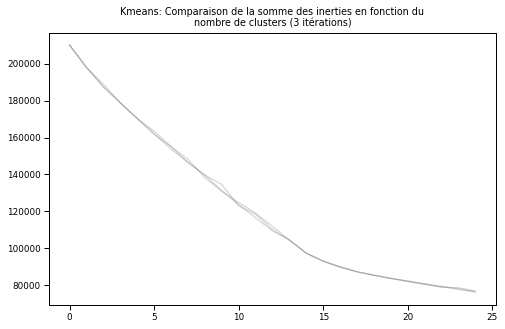

In [38]:
chaine = 'Kmeans: Comparaison de la somme des inerties en fonction du\nnombre de clusters (' + str(nb_boucles) + ' itérations)'
plt.figure(figsize=(8,5))
plt.title(chaine)
for i in range(0,nb_boucles):
    index_plot = [cluster+i*(max_clusters) for cluster in list(range(0,max_clusters))][0:max_clusters]
    sous_liste = [list(inertia.values())[index] for index in index_plot]
    sns.lineplot(list(range(0,max_clusters)),
                 sous_liste, alpha=1/nb_boucles, color='grey')

#### Coefficient de silhouette

In [39]:
silhouettes_kmeans = {}
for i in range(2,max_clusters):
    silhouettes_kmeans[i] = silhouette_score(X = X_pca,
                                             labels= list(dict_kmeans[(1,i)].labels_))

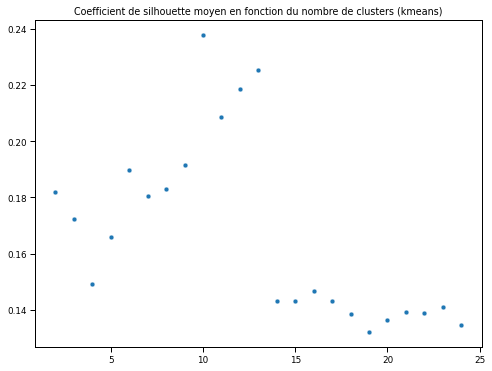

In [40]:
plt.figure(figsize=(8,6)),
plt.title('Coefficient de silhouette moyen en fonction du nombre de clusters (kmeans)')
sns.scatterplot(x = list(silhouettes_kmeans.keys()),
               y = list(silhouettes_kmeans.values()))
plt.show()

In [41]:
for key, value in silhouettes_kmeans.items():
    if value == max(silhouettes_kmeans.values()):
        print('le coefficient de silhouette est maximal pour {} clusters (score = {})'.format(key, value))
        nb_clusters = key

le coefficient de silhouette est maximal pour 10 clusters (score = 0.2377227931191786)


In [42]:
nb_clusters

10

#### Indice de Davies Bouldin

In [43]:

davies_bouldin_kmeans = {}
for i in range(2,max_clusters):
    davies_bouldin_kmeans[i] = davies_bouldin_score(X = X_pca,
                                             labels= list(dict_kmeans[(1,i)].labels_))

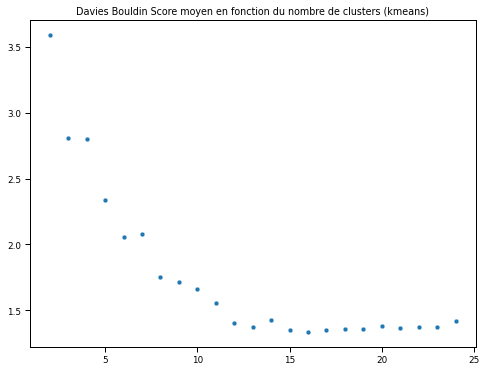

In [44]:
plt.figure(figsize=(8,6)),
plt.title('Davies Bouldin Score moyen en fonction du nombre de clusters (kmeans)')
sns.scatterplot(x = list(davies_bouldin_kmeans.keys()),
               y = list(davies_bouldin_kmeans.values()))
plt.show()

In [45]:
for key, value in davies_bouldin_kmeans.items():
    if value == min(davies_bouldin_kmeans.values()):
        print('lescore de Davies Bouldin est minimal pour {} clusters (score = {})'.format(key, value))

lescore de Davies Bouldin est minimal pour 16 clusters (score = 1.3381033496776975)


### Représentation

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The palette list has the wrong number of colors.

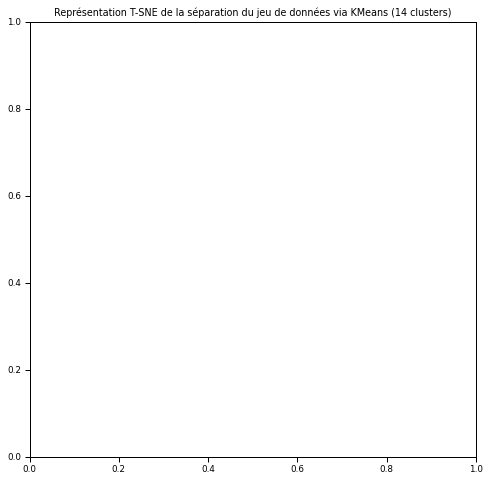

In [50]:
plt.figure(figsize=(8,8))
plt.title('Représentation T-SNE de la séparation du jeu de données via KMeans (14 clusters)')
sns.scatterplot(T[:,0], 
                T[:,1],
               hue=dict_kmeans[(1,14)].labels_,
                legend='full',
               palette=sns.color_palette("hls",nb_clusters_agg))
plt.savefig('5.png',dpi=500)

## DBScan 

### Application

In [51]:
dbs = DBSCAN(eps = 1, 
             min_samples=5,
               n_jobs=-1).fit(X_pca.copy())

### Représentation des variables

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


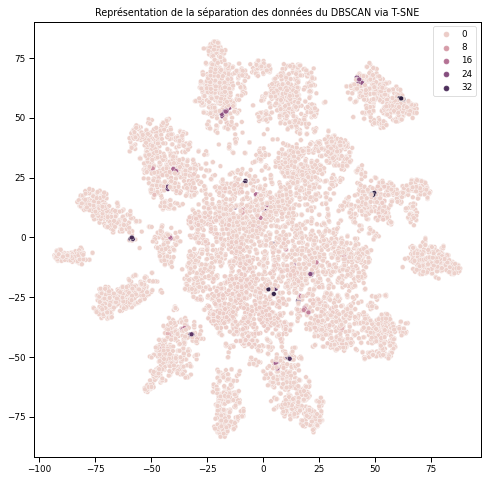

In [52]:
plt.figure(figsize=(8,8))
plt.title('Représentation de la séparation des données du DBSCAN via T-SNE')
sns.scatterplot(T[:,0], T[:,1], dbs.labels_)
plt.savefig('6.png',dpi=500)

## Clustering Hiérarchique

In [76]:
cah = AgglomerativeClustering(n_clusters = nb_clusters_agg
                             ).fit(X_pca.copy())

In [77]:
graph = pd.DataFrame(data = [T[:,0], T[:,1], dict_kmeans[(1,11)].labels_]).T
graph.columns = ['X', 'Y', 'label_kmeans']

In [78]:
graph['x_pca'] = x_show
graph['y_pca'] = y_show
graph['z_pca'] = z_show

In [79]:
graph

,X,Y,label_kmeans,x_pca,y_pca,z_pca
0,-8.260736,67.280510,4.0,0.241218,0.657789,-0.735308
1,-45.141438,1.448553,3.0,-1.816053,-0.003788,0.827790
2,54.101501,-32.521954,4.0,1.960054,0.151527,-2.236689
3,-46.041454,33.549889,1.0,-0.841717,1.767807,-1.891600
4,6.650735,-50.441341,3.0,-1.008793,0.010741,0.536420
...,...,...,...,...,...,...
9995,-23.498310,-12.505727,3.0,-2.057373,0.440746,0.602755
9996,-57.040756,41.790546,1.0,0.828735,2.548819,-0.472033
9997,-14.531631,-61.664169,3.0,-1.802412,0.494766,-0.089156
9998,45.748398,61.562462,3.0,-1.391884,-0.115428,0.013889


c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


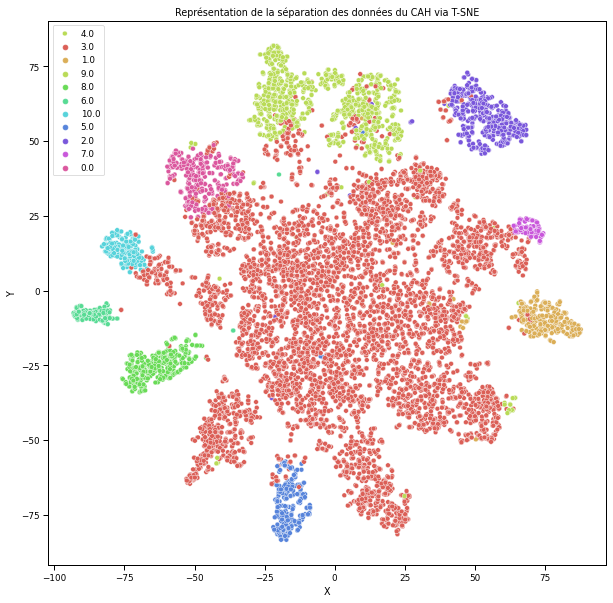

In [80]:
plt.figure(figsize=(10,10))
plt.title('Représentation de la séparation des données du CAH via T-SNE')
sns.scatterplot(graph['X'], 
                graph['Y'], 
                hue = cah.labels_, 
                legend='full',
               palette=sns.color_palette("hls",nb_clusters_agg))
plt.legend(loc='upper left', labels=graph['label_kmeans'].unique())
plt.savefig('7.png',dpi=500)
plt.show()


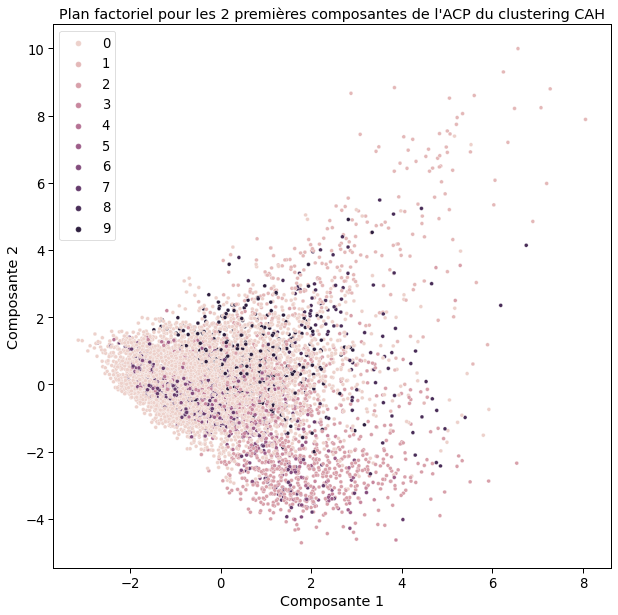

In [81]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP\
 du clustering CAH"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()
plt.savefig('8.png',dpi=500)
sns.scatterplot(x = graph['x_pca'], 
                y = graph['y_pca'], 
                hue = cah.labels_,
                alpha=1, s=15, legend='full')

sns.set_context("paper", font_scale=1) 


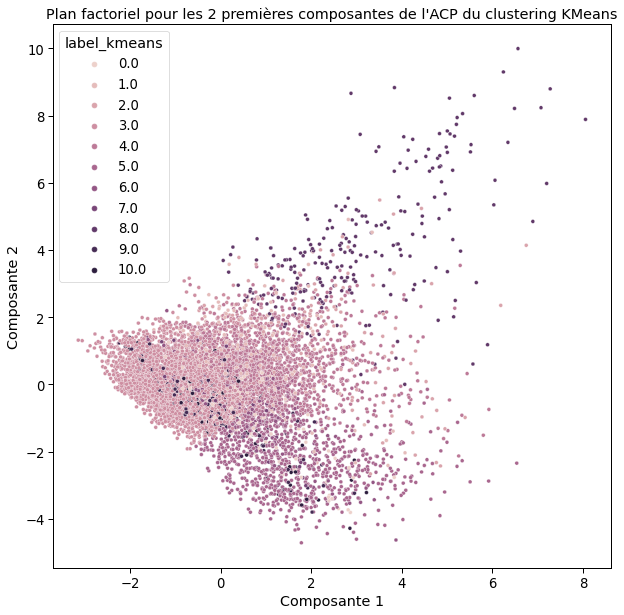

In [82]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP \
du clustering KMeans"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()

sns.scatterplot(x = graph['x_pca'], 
                y = graph['y_pca'], 
                hue = graph['label_kmeans'],
                alpha=1, s=15, legend='full')

sns.set_context("paper", font_scale=1) 
plt.savefig('9.png',dpi=500)

In [83]:
silhouette_score(X = X_pca, labels= cah.labels_)

0.20845655649785963

## Conclusion

Le Kmeans semble mieux fonctionner que les autres méthodes de clustering, essayons d'appliquer cet algorithme à l'ensemble du jeu de données.


# Ensemble du jeu de données

## Préparation jeu de donnée complet

In [84]:
X_tot=data.copy()

categorical_columns = X_tot.select_dtypes(['category','object']).columns
numerical_columns = X_tot.select_dtypes(['int32','float64']).columns

ohe = OneHotEncoder(sparse=False)
ss = StandardScaler()
X_tot[numerical_columns] = ss.fit_transform(X_tot[numerical_columns])
ohe.fit(X_tot[categorical_columns])

OneHotEncoder(sparse=False)

In [85]:
X_tot = pd.merge(X_tot[numerical_columns], 
          pd.DataFrame(columns = ohe.get_feature_names().tolist(),
              data = ohe.fit_transform(X_tot[categorical_columns])).set_index(X_tot.index),
        left_index = True, right_index = True)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## ACP

In [86]:
pca_tot = PCA(random_state=1)

In [87]:
pca_tot.fit(X_tot)

PCA(random_state=1)

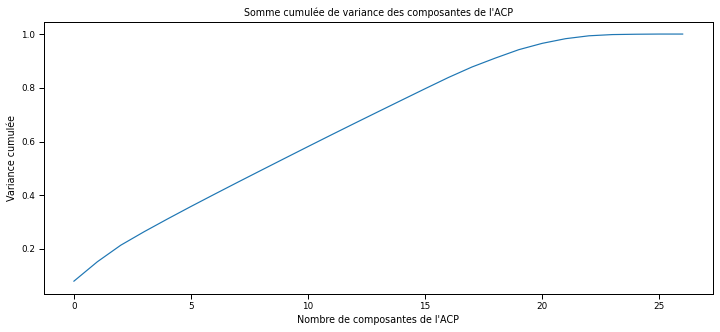

In [88]:
plt.figure(figsize=(12,5))
plt.title('Somme cumulée de variance des composantes de l\'ACP')
plt.xlabel('Nombre de composantes de l\'ACP')
plt.ylabel('Variance cumulée')
plt.plot(list(range(X_tot.shape[1])),
         np.cumsum(pca_tot.explained_variance_ratio_))


In [89]:
np.cumsum(pca_tot.explained_variance_ratio_)[18]

0.9106288894187622

On a  94 % de variance avec 19 features

In [90]:
X_pca_tot = pca_tot.transform(X_tot)[:,:18]

In [91]:
colonnes_pca = X_tot.columns

## Représentation des données

In [92]:
x_show = pca_tot.transform(X_tot.select_dtypes(['float64','int32']))[:,0]

y_show = pca_tot.transform(X_tot.select_dtypes(['float64','int32']))[:,1]

z_show = pca_tot.transform(X_tot.select_dtypes(['float64','int32']))[:,2]

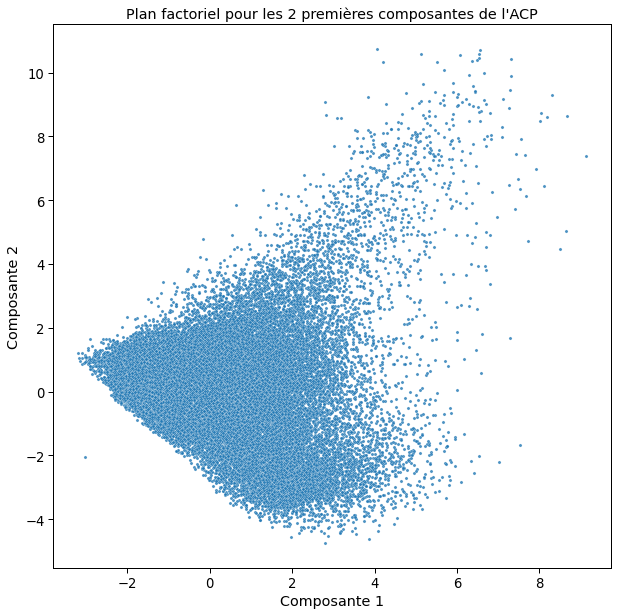

In [93]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()

sns.scatterplot(x = x_show,
                y = y_show,
                #hue = hue_show,
                alpha=0.8, s=10)


i = 0
'''for x,y,colonne in zip(x_pca,y_pca, colonnes_pca):

    plt.annotate(colonne, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5+np.random.randint(-10,10)), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',alpha=0.2)'''


sns.set_context("paper", font_scale=1) 
plt.savefig('10.png',dpi=500)

## KMeans

Modèle KMeans avec le nombre de clusters optimal identifié sur le jeu de données réduit

In [103]:
kmeans = KMeans(n_clusters=14, 
                verbose=1, 
                random_state=0).fit(X_pca_tot)

Initialization complete
Iteration 0, inertia 992467.333664209
Iteration 1, inertia 834758.5033486548
Iteration 2, inertia 800499.8830258609
Iteration 3, inertia 792421.8447566988
Iteration 4, inertia 789110.222423314
Iteration 5, inertia 787210.6142594598
Iteration 6, inertia 786136.4122222054
Iteration 7, inertia 785521.2028719303
Iteration 8, inertia 785042.6449863437
Iteration 9, inertia 784560.4324930917
Iteration 10, inertia 783977.020907627
Iteration 11, inertia 783199.6641123176
Iteration 12, inertia 782096.3555753094
Iteration 13, inertia 779143.2179586457
Iteration 14, inertia 776602.8355462488
Iteration 15, inertia 774721.0060072972
Iteration 16, inertia 772332.4602282377
Iteration 17, inertia 768853.9381483322
Iteration 18, inertia 767429.8988626512
Iteration 19, inertia 766715.7491640446
Iteration 20, inertia 766270.7974252119
Iteration 21, inertia 765999.1681464555
Iteration 22, inertia 765787.3161176629
Iteration 23, inertia 765626.0974831856
Iteration 24, inertia 765492.

Iteration 37, inertia 745261.2076350197
Iteration 38, inertia 745252.5906847003
Iteration 39, inertia 745246.6191339452
Iteration 40, inertia 745243.952858125
Iteration 41, inertia 745242.7429392067
Iteration 42, inertia 745242.0793546599
Converged at iteration 42: center shift 0.0001092627295488296 within tolerance 0.00011391405267429507.
Initialization complete
Iteration 0, inertia 1057632.4795180592
Iteration 1, inertia 868861.2815946906
Iteration 2, inertia 812301.9831621613
Iteration 3, inertia 782657.1518005892
Iteration 4, inertia 769485.0563016628
Iteration 5, inertia 762956.4452058165
Iteration 6, inertia 759892.3035091624
Iteration 7, inertia 758255.5048549888
Iteration 8, inertia 756828.396362728
Iteration 9, inertia 755014.4670562685
Iteration 10, inertia 751895.6632622884
Iteration 11, inertia 746681.7304988194
Iteration 12, inertia 740812.7970808896
Iteration 13, inertia 739365.6651041294
Iteration 14, inertia 739023.0072294732
Iteration 15, inertia 738860.0835176447
Iter

In [104]:
kmeans.labels_.shape

(74705,)

In [105]:
silhouette_score(X = X_pca_tot, labels= kmeans.labels_)

0.12320915956926673

In [106]:
inertia = {}
dict_kmeans = {}
dict_silhouette = {}
for k in range(13,16):
    kmeans = KMeans(n_clusters=k,
                   verbose=1,
                   random_state=0).fit(X_pca_tot)
    inertia[k] = kmeans.inertia_
    dict_kmeans[k] = kmeans
    dict_silhouette[k] = silhouette_score(X = X_pca_tot, labels= kmeans.labels_)
    print('Boucle {} - Silhouette score : {}'.format(k, dict_silhouette[k]))
    

Initialization complete
Iteration 0, inertia 1051290.821728178
Iteration 1, inertia 895283.741858758
Iteration 2, inertia 862107.8439264002
Iteration 3, inertia 854468.1976368756
Iteration 4, inertia 851599.0703027727
Iteration 5, inertia 849384.2925957865
Iteration 6, inertia 846359.7444637603
Iteration 7, inertia 844083.0141781771
Iteration 8, inertia 842769.1374154509
Iteration 9, inertia 841184.5148674493
Iteration 10, inertia 839134.4787954496
Iteration 11, inertia 835711.7358430042
Iteration 12, inertia 831913.3969712985
Iteration 13, inertia 830901.4410766852
Iteration 14, inertia 830511.8275756887
Iteration 15, inertia 830310.7702501984
Iteration 16, inertia 830178.2828414273
Iteration 17, inertia 830061.6329014886
Iteration 18, inertia 829954.7714857457
Iteration 19, inertia 829839.9323726485
Iteration 20, inertia 829697.2910629944
Iteration 21, inertia 829486.2235077028
Iteration 22, inertia 829211.1591965859
Iteration 23, inertia 828759.9043045728
Iteration 24, inertia 82787

Iteration 37, inertia 789258.6609733084
Iteration 38, inertia 789241.8410071803
Iteration 39, inertia 789221.6437043305
Iteration 40, inertia 789194.2982931586
Iteration 41, inertia 789165.3318780706
Iteration 42, inertia 789131.9223118727
Iteration 43, inertia 789095.220985211
Iteration 44, inertia 789063.3124714899
Iteration 45, inertia 789032.9737622408
Iteration 46, inertia 789004.2427142144
Iteration 47, inertia 788971.0918099601
Iteration 48, inertia 788933.8151991846
Iteration 49, inertia 788886.101268641
Iteration 50, inertia 788817.0768463708
Iteration 51, inertia 788713.7342476026
Iteration 52, inertia 788576.2220040049
Iteration 53, inertia 788390.7541005439
Iteration 54, inertia 788070.8889410421
Iteration 55, inertia 787376.9582853832
Iteration 56, inertia 785923.4317577314
Iteration 57, inertia 783099.4944969662
Iteration 58, inertia 779205.6413389513
Iteration 59, inertia 775484.3391371084
Iteration 60, inertia 773149.2121233038
Iteration 61, inertia 772049.0962105406
It

Iteration 24, inertia 797914.0503384504
Iteration 25, inertia 797905.7019988645
Iteration 26, inertia 797895.8213148833
Iteration 27, inertia 797880.7349770404
Iteration 28, inertia 797865.8554464472
Iteration 29, inertia 797852.5417930251
Iteration 30, inertia 797841.6790280034
Iteration 31, inertia 797832.9306956836
Iteration 32, inertia 797820.737294032
Iteration 33, inertia 797811.7961228411
Iteration 34, inertia 797807.4480644659
Iteration 35, inertia 797804.9728963595
Iteration 36, inertia 797803.9247538011
Iteration 37, inertia 797803.3860038837
Iteration 38, inertia 797803.0173875883
Converged at iteration 38: center shift 4.495045563350555e-05 within tolerance 0.00011391405267429507.
Boucle 13 - Silhouette score : 0.22658482045538092
Initialization complete
Iteration 0, inertia 992467.333664209
Iteration 1, inertia 834758.5033486548
Iteration 2, inertia 800499.8830258609
Iteration 3, inertia 792421.8447566988
Iteration 4, inertia 789110.222423314
Iteration 5, inertia 787210.61

Iteration 19, inertia 745346.4048364155
Iteration 20, inertia 745344.1667273326
Iteration 21, inertia 745341.8538332897
Iteration 22, inertia 745340.7367654698
Iteration 23, inertia 745339.8443116219
Iteration 24, inertia 745338.1931340295
Iteration 25, inertia 745334.8147537619
Iteration 26, inertia 745330.167258747
Iteration 27, inertia 745326.5843298389
Iteration 28, inertia 745323.7209010797
Iteration 29, inertia 745320.4866704268
Iteration 30, inertia 745318.2562210452
Iteration 31, inertia 745316.8629334717
Iteration 32, inertia 745312.7929222274
Iteration 33, inertia 745305.6568892676
Iteration 34, inertia 745296.5833123999
Iteration 35, inertia 745287.4534527669
Iteration 36, inertia 745275.7873206346
Iteration 37, inertia 745261.2076350197
Iteration 38, inertia 745252.5906847003
Iteration 39, inertia 745246.6191339452
Iteration 40, inertia 745243.952858125
Iteration 41, inertia 745242.7429392067
Iteration 42, inertia 745242.0793546599
Converged at iteration 42: center shift 0.

Boucle 14 - Silhouette score : 0.12320915956926673
Initialization complete
Iteration 0, inertia 940273.6381479912
Iteration 1, inertia 777423.2379299337
Iteration 2, inertia 742452.6670450752
Iteration 3, inertia 732963.6468528917
Iteration 4, inertia 728311.3673441703
Iteration 5, inertia 725748.184653598
Iteration 6, inertia 724646.6391738968
Iteration 7, inertia 723984.1707675434
Iteration 8, inertia 723475.4540287153
Iteration 9, inertia 722996.8944513209
Iteration 10, inertia 722470.7781454566
Iteration 11, inertia 721830.3674982353
Iteration 12, inertia 721034.3312647339
Iteration 13, inertia 719863.5213554949
Iteration 14, inertia 717637.5138919561
Iteration 15, inertia 713508.808345772
Iteration 16, inertia 712059.4388792692
Iteration 17, inertia 711092.0656759441
Iteration 18, inertia 709551.744232035
Iteration 19, inertia 705128.6640338611
Iteration 20, inertia 703381.5643374098
Iteration 21, inertia 702490.0807475066
Iteration 22, inertia 701944.7001682438
Iteration 23, iner

Iteration 36, inertia 765287.4470256672
Converged at iteration 36: center shift 0.00011211424910256573 within tolerance 0.00011391405267429507.
Initialization complete
Iteration 0, inertia 1071106.6188425447
Iteration 1, inertia 871139.5309656025
Iteration 2, inertia 832067.9180031029
Iteration 3, inertia 817291.6581186105
Iteration 4, inertia 812383.1108838357
Iteration 5, inertia 810070.3518572027
Iteration 6, inertia 805744.128592449
Iteration 7, inertia 795551.0009944566
Iteration 8, inertia 793705.6588184237
Iteration 9, inertia 793432.1380675685
Iteration 10, inertia 793357.1667198555
Iteration 11, inertia 793328.7708994586
Iteration 12, inertia 793318.234564567
Iteration 13, inertia 793313.9920888986
Iteration 14, inertia 793311.576064528
Iteration 15, inertia 793309.098690422
Iteration 16, inertia 793306.5419183869
Iteration 17, inertia 793303.7602135547
Iteration 18, inertia 793301.1926496602
Iteration 19, inertia 793298.7496835924
Iteration 20, inertia 793297.3177438108
Itera

In [107]:
if False:
    inertia = {}
    dict_kmeans = {}
    dict_silhouette = {}
    for k in range(3,15):
        kmeans = KMeans(n_clusters=k,
                       verbose=1,
                       random_state=0).fit(X_pca_tot)
        inertia[k] = kmeans.inertia_
        dict_kmeans[k] = kmeans
        dict_silhouette[k] = silhouette_score(X = X_pca_tot, labels= kmeans.labels_)
        print('Boucle {} - Silhouette score : {}'.format(k, dict_silhouette[k]))
    

* Boucle 13 - Silhouette score : 0.22938337882766385
* Boucle 14 - Silhouette score : 0.2380033975405801
* Boucle 15 - Silhouette score : 0.14908158723434908


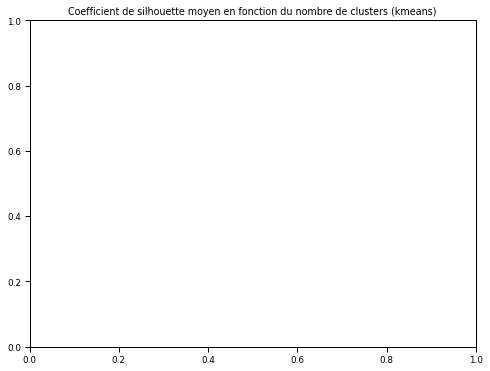

In [98]:
plt.figure(figsize=(8,6)),
plt.title('Coefficient de silhouette moyen en fonction du nombre de clusters (kmeans)')
sns.scatterplot(x = list(dict_silhouette.keys()),
               y = list(dict_silhouette.values()))
plt.show()

Le coefficient de silhouette est maximal pour 14 clusters

## Clustering hiérarchique

In [99]:
from joblib import Memory
if False:
    cah_total = AgglomerativeClustering(n_clusters = 14, memory=Memory('/cache')
                             ).fit(X_pca_tot)

Non applicable (problème mémoire)

## Exports

Exportons notre modèle et notre jeu de données

In [100]:
#export kmeans
filename = 'models/kmeans_14_full_dataset.obj' 
with  open(filename, 'wb') as filehandler :
    pickle.dump(dict_kmeans[14], filehandler)

FileNotFoundError: [Errno 2] No such file or directory: 'models/kmeans_14_full_dataset.obj'

In [101]:
#export OHE
filename = 'models/ohe.obj' 
with  open(filename, 'wb') as filehandler :
    pickle.dump(ohe, filehandler)
    
#export SS
filename = 'models/ss.obj' 
with  open(filename, 'wb') as filehandler :
    pickle.dump(ss, filehandler)
    
#export modèle PCA
filename = 'models/pca_tot.obj' 
with  open(filename, 'wb') as filehandler :
    pickle.dump(pca_tot, filehandler)

FileNotFoundError: [Errno 2] No such file or directory: 'models/ohe.obj'

### Import

In [102]:
file = open('models/kmeans_14_full_dataset.obj', 'rb')
model = pickle.load(file)

FileNotFoundError: [Errno 2] No such file or directory: 'models/kmeans_14_full_dataset.obj'

## Représentation des variables 

In [ ]:
nb_clusters = 14
if False:
    tsne = TSNE(n_components=2)
    T = tsne.fit_transform(X_pca_tot.copy())
    graph = pd.DataFrame(data = [T[:,0], T[:,1], model.labels_]).T
    graph.columns = ['X', 'Y', 'label']
    plt.figure(figsize=(10,10))
    plt.title('Représentation de la séparation des données du KMEANS via T-SNE')
    sns.scatterplot(graph['X'], graph['Y'], hue = graph['label'], legend='full',
                   palette=sns.color_palette("hls",14),
                    alpha=1, s=15,)
    plt.legend(loc='upper left', labels=graph['label'].unique())
    plt.show()
    
else:
        graph = pd.DataFrame(data = [model.labels_]).T
        graph.columns = ['label']


In [ ]:
graph['x_pca'] = x_show
graph['y_pca'] = y_show
graph['z_pca'] = z_show

In [ ]:
from matplotlib.patches import Circle
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()

sns.scatterplot(x = graph['x_pca'], 
                y = graph['y_pca'], 
                hue = graph['label'],
                alpha=1, s=15, legend='full')

sns.set_context("paper", font_scale=1) 
plt.savefig('11.png',dpi=500)

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Distribution du nombre d\'individus par cluster, en pourcentage')
sns.barplot(x = graph['label'].value_counts().index, 
           y=graph['label'].value_counts().values/len(graph)*100)
plt.savefig('12.png',dpi=500)

## Caractérisation des clusters 

### Représentation

In [ ]:
graph.sample(10)

In [ ]:
X2=X_tot.copy()

In [ ]:
X2.shape

In [ ]:
X2['label'] = graph['label']
group_columns = X2.groupby('label').mean()

### Répartition par feature 

In [ ]:
X_tot_2 = data.copy()
X_tot_2['label'] = model.labels_

In [ ]:
X_tot_2.head(2)

In [ ]:
for column in group_columns.columns:
    try:
        plt.figure(figsize=(7,5))
        titre = 'Moyenne de ' + str(column) + ' pour chaque cluster' 
        plt.title(titre)
        sns.barplot(x = 'label',
                    y = column,
                    data = X_tot_2, 
                    ci="sd")
        plt.show()
    except:
        print('Erreur colonne : ', column)

Observation du mode des différents clusters pour chaque feature

In [ ]:
X_tot_2.groupby('label').agg(lambda x:x.value_counts().index[0])

In [ ]:
X_tot_2.groupby('label').agg('mean')

In [ ]:
X_tot_2.groupby('label').agg('mean')['delai_dernier_achat'].tolist()

Observations : 

* Le cluster 9 correspond aux clients qui ont acheté le plus de produits et aux acheteurs majoritaires de la catégorie 'home'
* le cluster 3 correspond au client qui ont un long délai de traitement de leur commande et également à ceux qui mettent les plus mauvaises notes en moyenne. Ils ne sont pas attachés à une catégorie de produit en particulier
* le cluster 6 correspond au client qui ont fait leur commande le plus récemment et aux acheteurs majoritaires de la catégorie 'construction'
* Le cluster 11 correspond aux acheteurs majoritaires de la catégorie 'appliances' 
* Le cluster 4 correspond aux acheteurs majoritaires de la catégorie  'office'
* Le cluster 13 correspond aux acheteurs majoritaires de la catégorie 'electronics'
* Le cluster 2 correspond aux acheteurs majoritaires de la catégorie 'arts
* Le cluster 0 correspond aux acheteurs majoritaires de la catégorie 'fashion' 
* Le cluster 8 correspond aux acheteurs majoritaires de la catégorie 'health/beauty' 
* Le cluster 1 correspond aux acheteurs majoritaires de la catégorie 'sports_leisure'
* Le cluster 12 correspond aux acheteurs majoritaires de la catégorie 'garden_pets'
* Le cluster 10 correspond aux acheteurs majoritaires de la catégorie 'auto'
* Le cluster 7 correspond aux acheteurs majoritaires de la catégorie 'other'
* pas de catégorie spécifique d'achat identifiée pour le cluster 5 (cluster qui comprend la moitié de notre échantillon)


Premier bilan:
* des clusters d'acheteurs potentiels pour certaines catégories de produits ont été identifiés
* les clients avec un long délai de traitement de commande, qui menttent de moins bonnes notes en moyenne, ont été identifiés
* le cluster des clients qui achète le plus de produits en quantité a également été identifié

Peut-on aller plus loin?

### latitude et longitude

In [ ]:
graph.columns

In [ ]:
graph['label'].nunique()

In [ ]:
graph['colors']=pd.cut(graph['label'], bins=nb_clusters, 
                       labels=['red', 'blue', 'green', 'purple', 
                               'orange', 'darkred', 'lightred', 'beige', 
                               'darkblue', 'darkgreen', 'cadetblue', 'darkpurple',
                               'pink','black'])

In [ ]:
len(graph)

In [ ]:

if False:
    n = folium.Map()
    n = folium.Map(location=[data['geolocation_lat'].mean().mean(), data['geolocation_lng'].mean().mean()],
                   zoom_start=11)
    for i in range(0,20000):    
        folium.Circle([data.iloc[i]['geolocation_lat'],data.iloc[i]['geolocation_lng']],
                      popup=graph.iloc[i]['label'], 
                      color = graph.iloc[i]['colors']
                      ,radius =500).add_to(n)

Bilan : on n'observe pas de tendance nette sur la localisation des points : regroupement des groupes par quartier ou autre.

# Essai de Kmeans en supprimant des features

Peut-on obtenir un autre clustering (éventuellement avec une répartition plus homogène des tailles de clusters) en supprimant des features

In [ ]:
X_tot.head()

In [ ]:
features_to_drop = ['Delai_Moy_Commande',
                    'heure_achat',
                    'Facilités',
                    'jour_achat', 
                    'Note_Moy_Com']
X_reduce = X_tot.drop(features_to_drop, axis=1)

In [ ]:
X_reduce.head()

In [ ]:
pca_reduce = PCA(random_state=1)
pca_reduce.fit(X_reduce)

In [ ]:
np.cumsum(pca_reduce.explained_variance_ratio_)[14]

In [ ]:
X_pca_reduce = pca_reduce.transform(X_reduce)[:,:14]

In [ ]:
kmeans_reduce = KMeans(n_clusters=14, 
                verbose=1, 
                random_state=0,
               n_jobs=-1).fit(X_reduce)

In [ ]:
silhouette_score(X = X_pca_reduce, labels= kmeans_reduce.labels_)

In [ ]:
sns.barplot(y = pd.Series(kmeans_reduce.labels_).value_counts().values,
           x = pd.Series(kmeans_reduce.labels_).value_counts().index)

taille des clusters

In [ ]:
pd.DataFrame(kmeans_reduce.labels_, columns=['cluster'])['cluster'].value_counts().sort_values()

In [ ]:
X_tot_2['label_reduce'] = kmeans_reduce.labels_

In [ ]:
for column in group_columns.columns:
    try:
        plt.figure(figsize=(7,5))
        titre = 'Moyenne de ' + str(column) + ' pour chaque cluster' 
        plt.title(titre)
        sns.barplot(x = 'label_reduce',
                    y = column,
                    data = X_tot_2, 
                    ci="sd")
        plt.savefig('13.png',dpi=500)
        plt.show()
    except:
        print('Erreur colonne : ', column)

Le Kmeans réduit semble réaliser un clustering comparable : on observe les mêmes features qui se détachent en fonction des catégories (catégories de dépenses, nombre d'achats, etc.)

# Résultats et problématique

Les résultats ne sont pas parfaitement satisfaisants vis à vis de la problématique:  
* on obtient un trop grand nombre de clusters, non adapté à la problématique business
* un cluster principal qui contient trop de données
* coefficient de silhouette relativement faible indiquant un chevauchement partiel des clusters,
* le clustering suit principalement les catégories de produits prédéfinies. On aurait pu faire ce tri sans faire appel à des algorithmes 

La base de données permet de faire difficilement mieux par des algorithmes traditionnels car peu de clients ont fait plusieurs achats, ce qui limite le nombre de possibilités qu'on peut envisager (fréquence des achats, complémentarité des catégories d'achats, date du dernier achat, etc.)

Revenons à une analyse manuelle des données pour identifier des segments exploitables pour les équipes marketing

## Clusters actionnables

**Identification des clusters**

In [ ]:
cluster = []
for i in range(14):
    cluster.append(data.loc[X_tot_2['label'] == i])

Nombre de clients par cluster

In [ ]:
a = 0
for i in range(14):
    b = cluster[i].shape[0]
    a += b
    print('cluster {} : {} clients'.format(i,b))

la catégorie 5 contient trop de clients et est difficilement exploitable directement. Peut-on la redécouper?

### Clustering de la catégorie 5

In [ ]:
dict_silhouette_cat5 = {}
dict_kmeans_cat5 = {}
for i in range(2,15,1):
    dict_kmeans_cat5[i] = KMeans(n_clusters=i, 
                    verbose=1, 
                    random_state=0,
                   n_jobs=-1).fit(X3.loc[X_tot_2[X_tot_2['label'] == 5].index])
    dict_silhouette_cat5[i] = (silhouette_score(X = X3.loc[X_tot_2[X_tot_2['label'] == 5].index],
                         labels= list(dict_kmeans_cat5[i].labels_)))

In [ ]:
dict_silhouette_cat5

Ce sous clustering n'est pas concluant

### Les clients les plus dépensiers

In [ ]:
recap = X_tot_2.drop(['Nb_pdts', 'Tot_moy_achats', 'Delai_Moy_Commande',
       'order_purchase_timestamp', 'heure_achat', 'jour_achat',
       'delai_dernier_achat', 'Note_Moy_Com', 'Moy_Paiment', 'Facilités',
       'geolocation_lat', 'geolocation_lng','label_reduce'], axis=1).groupby('label').sum(axis=1).sum(axis=1)

In [ ]:
recap.columns = ['sum']

In [ ]:
recap = pd.DataFrame(recap)

In [ ]:
recap.columns = ['sum']

In [ ]:
recap['count'] = X_tot_2.groupby('label').count().mean(axis=1)

In [ ]:
recap['mean'] = recap['sum'].divide(recap['count'])

In [ ]:
recap

In [ ]:
recap['mean'].sort_index().values.tolist()

In [ ]:
recap.sort_values(by='mean', inplace=True)

In [ ]:
sns.barplot(x = recap.index,
            y = recap['mean'])

Clusters les plus dépensiers : Clusters 9 et 13
il s'agit des catégories qui dépensent le plus dans les catégories "home" et "electronics"

In [ ]:
cluster[9].describe().loc[['mean', 'std', 'min','50%','max']]

In [ ]:
cluster[13].describe().loc[['mean', 'std', 'min','50%','max']]

In [ ]:
for i in [9,13]:
    print('Nombre clients cluster ',i,': ', cluster[i].shape[0])

### Les clients les moins dépensiers

Cluster 5 : les moins dépensiers et qui ont le moins recours aux facilités de paiement => opportunité de leur faire des offres sur les facilités de paiement

In [ ]:
cluster[5].describe().loc[['mean', 'std', 'min','50%','max']]

In [ ]:
print('Nombre clients cluster ',5,': ', cluster[5].shape[0])

### Les clients qui ont acheté le plus grand nombre de produits

Cluster 12 : ils mettent en moyenne une moins bonne note

In [ ]:
cluster[9].describe().loc[['mean', 'std', 'min','50%','max']]

In [ ]:
print('Nombre clients cluster ',9,': ', cluster[9].shape[0])

### Les longs délais de livraison

Cluster 3 : ceux qui ont eu un long délai de commande et mettent des mauvaises notes => leur proposer une livraison rapide pour améliorer leur expérience

In [ ]:
cluster[3].describe().loc[['mean', 'std', 'min','50%','max']]

In [ ]:
print('Nombre clients cluster ',3,': ', cluster[3].shape[0])

### Les très longs délais de livraison (> 1 mois)

In [ ]:
cluster[3][cluster[3]['Delai_Moy_Commande']>30].describe()

In [ ]:
cluster[3][cluster[3]['Delai_Moy_Commande']>30].shape

### Les catégories les plus achetées

**les catégories les plus achetées:**

In [ ]:
liste_col = [('price', 'home'), ('price', 'appliances'),
       ('price', 'construction'), ('price', 'office'),
       ('price', 'electronics'), ('price', 'arts'), ('price', 'fashion'),
       ('price', 'health_beauty'), ('price', 'sports_leisure'),
       ('price', 'garden_pets'), ('price', 'auto'),
       ('price', 'food_drinks'), ('price', 'other')]
dict_val = {}
for column in liste_col:
    dict_val[str(column).split("'")[3]] = data[str(column)].sum()/data.shape[0]

plt.figure(figsize=(8,5))
plt.title('Montant moyen de dépense par catégorie de produit')
sns.barplot(y = 'index',
            x='price',
            data = pd.DataFrame(dict_val, index=['price']).T.reset_index().sort_values(by='price', ascending=False))
plt.savefig('14.png',dpi=500)

In [ ]:
cluster[11].describe().loc[['mean', 'std', 'min','50%','max']]

In [ ]:
cluster[7][cluster[7]['Nb_pdts']>2].describe().loc[['mean', 'std', 'min','50%','max']]

In [ ]:
cluster[7][cluster[7]['Nb_pdts']>2].describe().loc[['mean', 'std', 'min','50%','max']]

In [ ]:
for i in range(13):
    print('Nombre clients cluster ',i,': ', cluster[i].shape[0])

### Les clients ayant acheté le plus de produits

In [ ]:
data[data['Nb_pdts'] >=4].shape

In [ ]:
data.loc[data[data['Nb_pdts'] >=2].index].shape

### Les clients les plus satisfaits de leurs produits

In [ ]:
data['Note_Moy_Com'].describe()

In [ ]:
data[data['Note_Moy_Com']==5].shape

In [ ]:
data.head()

In [ ]:
data.loc[data[data['Nb_pdts'] >=2].index].shape

### clients les moins satisfaits de leurs produits

In [ ]:
data[data['Note_Moy_Com']==1].shape

### clustering des clients qui consomment le plus

In [ ]:
X3 = pd.DataFrame(X_pca_tot, index = data.index)

Sélection des clients qui ont acheté plus de 4 produits

In [ ]:
dict_silhouette = {}
dict_kmeans_consumers = {}
for i in range(3,15,1):
    dict_kmeans_consumers[i] = KMeans(n_clusters=i, 
                    verbose=1, 
                    random_state=0,
                   n_jobs=-1).fit(X3.loc[data[data['Nb_pdts'] >=4].index])
    dict_silhouette[i] = (silhouette_score(X = X3.loc[data[data['Nb_pdts'] >=4].index],
                         labels= list(dict_kmeans_consumers[i].labels_)))

In [ ]:
dict_silhouette

In [ ]:
print(max(dict_silhouette.values()))

In [ ]:
list(dict_silhouette.keys())[list(dict_silhouette.values()).index(max(dict_silhouette.values()))]

In [ ]:
X_most_imp_cat = data.copy()[data['Nb_pdts'] >=4]
X_most_imp_cat['label'] = dict_kmeans_consumers[8].labels_

In [ ]:
X_most_imp_cat.shape

cela représente 4600 clients potentiels

In [ ]:
for column in X_most_imp_cat.drop(['order_purchase_timestamp', 'heure_achat', 'jour_achat', 'label'], axis=1).columns:
    plt.figure(figsize=(7,5))
    titre = 'Moyenne de ' + str(column) + ' pour chaque cluster' 
    plt.title(titre)
    sns.barplot(x = 'label',
                y = column,
                data = X_most_imp_cat, 
                ci="sd")
    plt.savefig('15.png',dpi=500)
    plt.show()

In [ ]:
X_most_imp_cat.shape

La différence entre les clusters se fait principalement par les catégories de dépense:
* les individus du cluster 1 a dépensé en moyenne 1200 en produit 'home'
* les individus du  du cluster 3 ont dépensé en moyenne plus de 370 dans la catégorie 'appliances'
* les individus du cluster 5 ont dépensé en moyenne 600 dans la catégorie electronics
* les individus du cluster 0 ont dépensé en moyenne 600 dans la catégorie health/beauty
* les individus du cluster 6 ont dépensé en moyenne 350 dans la catégorie fashion
* les individus du cluster 7 ont dépensé en moyenne 400 dans la catégorie sport/leisure
* les individus du cluster 2 ont dépensé en moyenne plus de 400 dans la catégorie "garden" / pets
* les individus du cluster 4 ont dépensé en moyenne 300 dans la catégorie 'home' 

on peut par exemple cibler prioritairement ces clients pour des publicités de produits des catégories indiquées ci-dessus

Certaines catégories de produits séduisent davantage de catégories de clients que d'autres, c'est notamment le cas des catégories home, electronics et health beauty qui ont des acheteurs dans tous les clusters. Il y a un levier potentiellement exploitable pour rediriger les clients des autres catégories vers ces catégories

# Caractérisation évolution dans le temps  

* Idée : on pourrait réduire les données en retirant les derniers mois de données et voir si les clusters évoluent ou non : si oui cela veut dire qu’il faut actualiser sur une période de temps plus faible
* Essayer en isolant une région ou autre variable pour voir si le cluster est robuste ou non


In [ ]:
data['order_purchase_timestamp'] = data['order_purchase_timestamp'].astype('datetime64')

In [ ]:
data['order_purchase_timestamp'].describe()

Pour voir si le clustering est stable:
* on va retirer du jeu de données tous les clients dont le dernier achat date d'il y a moins de n mois avec différents pas

In [ ]:
X_tot

## Préparation jeu de données

Faisons un test de clustering en retirant les 3 derniers mois du jeu de données (test de faisabilité en retirant tous les clients qui ont fait un achat dans les 3 derniers mois)

In [ ]:
data['order_purchase_timestamp'].max()

In [ ]:
data[data['order_purchase_timestamp'] < '2018-05-21 09:04:45'].shape

In [ ]:
X_old = data[data['order_purchase_timestamp'] < '2018-05-21 09:04:45'].copy()

In [ ]:
categorical_columns = X_old.select_dtypes(['category','object']).columns
numerical_columns = X_old.select_dtypes(['int32','float64']).columns


X_old[numerical_columns] = ss.transform(X_old[numerical_columns])
ohe.fit(X_old[categorical_columns])

In [ ]:
X_old = pd.merge(X_old[numerical_columns], 
          pd.DataFrame(columns = ohe.get_feature_names().tolist(),
              data = ohe.fit_transform(X_old[categorical_columns])).set_index(X_old.index),
        left_index = True, right_index = True)

## ACP

In [ ]:
X_pca_old = pca_tot.transform(X_old)[:,:18]

## Kmeans

In [ ]:
inertia = {}
dict_kmeans = {}
dict_silhouette = {}
for k in range(5,20):
    kmeans_old = KMeans(n_clusters=k,
                   verbose=1,
                   random_state=0,
                   n_jobs=-1).fit(X_pca_old)
    inertia[k] = kmeans.inertia_
    dict_kmeans[k] = kmeans
    dict_silhouette[k] = silhouette_score(X = X_pca_old, labels= kmeans_old.labels_)
    print('Boucle {} - Silhouette score : {}'.format(k, dict_silhouette[k]))
    

Le nombre de clusters qui maximise le coefficient de silhouette est toujours 14. Sa valeur est comparable à celle obtenue pour le jeu complet

## Représentation

In [ ]:
X_old.shape

In [ ]:
kmeans_old.labels_.shape

In [ ]:
X_tot_old = data[data['order_purchase_timestamp'] < '2018-05-21 09:04:45'].copy().copy()
X_tot_old['label'] = kmeans_old.labels_

In [ ]:
for column in group_columns.columns:
    try:
        plt.figure(figsize=(7,5))
        titre = 'Moyenne de ' + str(column) + ' pour chaque cluster' 
        plt.title(titre)
        sns.barplot(x = 'label',
                    y = column,
                    data = X_tot_old, 
                    ci="sd")
        plt.savefig('16.png',dpi=500)
        plt.show()
    except:
        print('Erreur colonne : ', column)

OIl est clair que les nombreuses observations faites dans le regroupement précédent sont conservées, notamment :

Cat 8 : ceux qui ont dépensé le plus d'argent à la maison et acheté le plus de choses
Catégorie 3 : les deuxièmes plus gros dépensiers et les plus gros dépensiers de la catégorie électronique 2 : le délai de commande moyen est plus long que les autres, et la note de remarque moyenne est inférieure aux autres. Les autres catégories semblent être représentées de la même manière.

On constate par contre que différentes valeurs évoluent sensiblement comme les notes moyennes de commentaires (de 3,1 à 3,4 par exemple pour la catégorie la moins satisfaite).
On peut 